# IMDB Machine Learning

__Calascibetta Chiara, Paialunga Piero__

# 1. Dataset
## 1.1 Feature engineering

In [761]:
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import log_loss,confusion_matrix, precision_score, recall_score, accuracy_score, roc_curve,f1_score, precision_recall_fscore_support, roc_auc_score, make_scorer, auc,precision_recall_curve, average_precision_score,r2_score, mean_absolute_error, mean_squared_error,normalized_mutual_info_score
%matplotlib inline
import numpy as np
from sklearn import tree
import pandas as pd
import scipy.stats as st
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LassoCV, LassoLarsCV, LassoLarsIC, RidgeCV,LogisticRegressionCV, LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, Binarizer, FunctionTransformer, KBinsDiscretizer, KernelCenterer, Normalizer, RobustScaler, maxabs_scale,MinMaxScaler,normalize,PowerTransformer, RobustScaler,LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import export_graphviz,DecisionTreeClassifier
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import collections


from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV, KFold, LeaveOneOut
from sklearn.feature_selection import mutual_info_regression,mutual_info_classif, f_classif, SelectKBest
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.dummy import DummyClassifier
import seaborn.apionly as sns
from sklearn.naive_bayes import GaussianNB
import copy
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import cm
import math
plt.style.use('fivethirtyeight')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8

colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd:goldenrod', 'xkcd:cadet blue', 
          'xkcd:scarlet']
cmap_big = cm.get_cmap('Spectral', 512)
cmap = mcolors.ListedColormap(cmap_big(np.linspace(0.7, 0.95, 256)))
bbox_props = dict(boxstyle="round,pad=0.3", fc=colors[0], alpha=.5)
from currency_converter import CurrencyConverter

Il progetto condotto riguarda l'utilizzo di varie tecniche di Machine Learning nell'ambito della classificazione. 
In particolare, __il compito degli algoritmi utilizzati è quello di predirre il buono o cattivo esito di un film in termini di giudizio da parte della critica degli spettatori__. Il dataset utilizzato (https://www.kaggle.com/stefanoleone992/imdb-extensive-dataset) è fornito da Internet Movie Database, comunemente indicato con l'acronimo IMDb, un sito web di che gestisce informazioni su film, attori, registi, personale di produzione, programmi televisivi, e anche videogiochi.
Di seguito ne mostriamo le prime 5 righe:

In [183]:
movies=pd.read_csv('IMDB movies.csv').drop(columns=['Unnamed: 0','date_published'])
movies.tail(5)

year             genre  duration country   language           director  \
81268  2019  Horror, Thriller       106   India     Telugu    Aswani Kumar V.   
81269  2019             Drama       120   India  Malayalam                Zam   
81270  2019             Drama       111   India  Malayalam      T.V. Chandran   
81271  2019             Drama       130   India  Malayalam    Vineesh Aaradya   
81272  2019     Drama, Family        98  Turkey    Turkish  Ahmet Faik Akinci   

                                 writer       production_company  \
81268                   Aswani Kumar V.      Ekaa Art Production   
81269                  Rajesh k Narayan  Thomas Thiruvalla Films   
81270                     T.V. Chandran        Benzy Productions   
81271  Vineesh Aaradya, Vineesh Aaradya         RMCC Productions   
81272    Ahmet Faik Akinci, Kasim Uçkan              Gizem Ajans   

                                                  actors  avg_vote  \
81268  Sritha Chandana, Pavani Gangireddy, Abhinav Go...       7.2   
81269  Nandu Anand, Roshan Ullas, Manikandan R. Achar...       7.8   
81270  Lal, Akshara Kishor, Iniya, Narain, Renji Pani...       8.4   
81271  Anoop Chandran, Indrans, Sona Nair, Simon Brit...       8.4   
81272  Ahmet Faik Akinci, Belma Mamati, Metin Keçeci,...       7.2   

             budget usa_gross_income worlwide_gross_income  metascore  
81268           NaN              NaN                   NaN        NaN  
81269   INR 4000000              NaN                $ 4791        NaN  
81270  INR 10000000              NaN                   NaN        NaN  
81271           NaN              NaN                   NaN        NaN  
81272           NaN              NaN                $ 2833        NaN

In [184]:
print('Il numero di righe del dataset è %.i'%len(movies))

Il numero di righe del dataset è 81273


In [185]:
print('Il numero di colonne del dataset è %.i'%len(movies.columns.tolist()))

Il numero di colonne del dataset è 14


Dunque il dataset consiste in 81273 righe e 14 colonne, in particolare:

* year: Rappresenta l'anno di uscita del film 
* genre: Rappresenta il/i genere/i del film 
* duration: Rappresenta la durata, in minuti, del film
* country: Rappresenta il/i paese/i di produzione del film
* language: Rappresenta il/i linguaggio/i in cui il film è doppiato
* director: Rappresenta il/i registi del film
* writer: Rappresenta il/gli scrittore/scrittori del film 
* actors: Raprresenta gli attori del film 
* production_company: Rappresenta la/le case di produzione deil film
* __avg_vote__: Rappresenta il voto medio degli spettatori (varia da 0.0 a 10.0 estremi inclusi con step 0.1)
* budget: Rappresenta il budget utilizzato per il film 
* usa_gross_income: Rappresenta l'incasso (in USA) del film
* worlwide_gross_income: Rappresenta l'incasso mondiale del film
* metascore: Rappresenta la critica di un'esperta giuria (varia da 0 a 100 estremi inclusi) 


Lo scopo dell'algoritmo di classificazione è quello di predirre se un film sarà apprezzato dalla critica in base alle informazioni sopra elencate. La colonna dal quale è stato ricavato il target è quella della __avg vote__, che è stata trasformata in 1 se il voto medio non superava una certa soglia, e 0 in caso contrario. La classificazione è dunque una classificazione binaria.


## 1.1.1 Feature non numeriche

Nel dataset osservato notiamo la presenza di __sette feature non numeriche__:
* genre
* country
* director
* writer
* actors
* prod_company
* language


Notiamo che per quasi tutte le feature il dataset contiene più nomi per ogni riga:

In [186]:
movies.director.tolist()[3]


'Francesco Bertolini, Adolfo Padovan'

In [187]:
movies.actors.tolist()[8]

'Robert Gemp, Frederick Warde, Albert Gardner, James Keane, George Moss, Howard Stuart, Virginia Rankin, Violet Stuart, Carey Lee, Carlotta De Felice'

In [188]:
movies.writer.tolist()[10]

'Marcel Allain, Louis Feuillade'

Dunque è stato necessario separare i valori di ogni feature e costruire una lista per ogni elemento non numerico del dataset, utilizzando il seguente codice

In [189]:
cat=[movies.director,movies.country,movies.production_company,movies.genre,movies.language]
cat_names=['director','country','production_company','genre','language']
q=0
for c in cat:
    
    new_cat=c.tolist()
    new_cat_tot=[]
    for i in range(len(new_cat)):
        new_cat_i=[]
        l=new_cat[i]
        if type(l)!=str:
            if math.isnan(l)==True:
                new_cat_i.append(l)
                new_cat_tot.append(new_cat_i)

        else:
            l=l.split(',')
            for j in l:
                j=j.replace(' ','')
                new_cat_i.append(j)
            new_cat_tot.append(new_cat_i)
    movies[cat_names[q]]=new_cat_tot
    q=q+1

Il dataset rimaneggiato contiene dunque delle liste per ogni riga:

In [190]:
type(movies.director.tolist()[3])

list

Inoltre si noti che un nome potrebbe comparire come writer e come attore all'interno del dataset, anche nella stessa riga. Ad esempio:

In [191]:
movies[movies['writer']=='Woody Allen'].loc[16493].writer

'Woody Allen'

In [192]:
movies[movies['writer']=='Woody Allen'].loc[16493].actors

'Woody Allen, Diane Keaton, Georges Adet, Robinson Frank Adu, Edmond Ardisson, Féodor Atkine, Albert Augier, Yves Barsacq, Lloyd Battista, Jack Berard, Eva Betrand, George Birt, Yves Brainville, Gérard Buhr, Brian Coburn'

Il film numero 16493 presenta Woody Allen sia come regista che come scrittore. Poichè la presenza di Woody Allen come regista, o come scrittore (o come entrambi) potrebbe avere impatti diversi sul target, è stato necessario separare i casi in cui Woody Allen compare come regista o come scrittore. 
Per fare ciò è stato aggiunta una stessa lettera alla fine di ogni scrittore (W di writer) e  alla fine di ogni attore (A di attore), in modo tale da distinguere i loro ruoli, tramite il seguente codice:

In [193]:
c=movies.writer
new_cat=c.tolist()
new_cat_tot=[]
for i in range(len(new_cat)):
    new_cat_i=[]
    l=new_cat[i]
    if type(l)!=str:
        if math.isnan(l)==True:
            new_cat_i.append(l)
            new_cat_tot.append(new_cat_i)

    else:
        l=l.split(',')
        for j in l:
            j=j.replace(' ','')
            j=j+'W'
            new_cat_i.append(j)
        new_cat_tot.append(new_cat_i)
movies['writer']=new_cat_tot

In [194]:
c=movies.actors
new_cat=c.tolist()
new_cat_tot=[]
for i in range(len(new_cat)):
    new_cat_i=[]
    l=new_cat[i]
    if type(l)!=str:
        if math.isnan(l)==True:
            new_cat_i.append(l)
            new_cat_tot.append(new_cat_i)

    else:
        l=l.split(',')
        for j in l:
            j=j.replace(' ','')
            j=j+'A'
            new_cat_i.append(j)
        new_cat_tot.append(new_cat_i)
movies['actors']=new_cat_tot

Osservando ora la stessa riga del dataset precedente si ha:

In [195]:
movies.loc[16493].writer[0]

'WoodyAllenW'

In [196]:
movies.loc[16493].director[0]

'WoodyAllen'

In [197]:
movies.loc[16493].actors[0]

'WoodyAllenA'

Il dataset rimaneggiato risulterà essere dunque il seguente

In [198]:
movies.tail(5)

year               genre  duration   country     language  \
81268  2019  [Horror, Thriller]       106   [India]     [Telugu]   
81269  2019             [Drama]       120   [India]  [Malayalam]   
81270  2019             [Drama]       111   [India]  [Malayalam]   
81271  2019             [Drama]       130   [India]  [Malayalam]   
81272  2019     [Drama, Family]        98  [Turkey]    [Turkish]   

                director                              writer  \
81268    [AswaniKumarV.]                    [AswaniKumarV.W]   
81269              [Zam]                   [RajeshkNarayanW]   
81270     [T.V.Chandran]                     [T.V.ChandranW]   
81271   [VineeshAaradya]  [VineeshAaradyaW, VineeshAaradyaW]   
81272  [AhmetFaikAkinci]     [AhmetFaikAkinciW, KasimUçkanW]   

            production_company  \
81268      [EkaaArtProduction]   
81269  [ThomasThiruvallaFilms]   
81270       [BenzyProductions]   
81271        [RMCCProductions]   
81272             [GizemAjans]   

                                                  actors  avg_vote  \
81268  [SrithaChandanaA, PavaniGangireddyA, AbhinavGo...       7.2   
81269  [NanduAnandA, RoshanUllasA, ManikandanR.Achari...       7.8   
81270  [LalA, AksharaKishorA, IniyaA, NarainA, RenjiP...       8.4   
81271  [AnoopChandranA, IndransA, SonaNairA, SimonBri...       8.4   
81272  [AhmetFaikAkinciA, BelmaMamatiA, MetinKeçeciA,...       7.2   

             budget usa_gross_income worlwide_gross_income  metascore  
81268           NaN              NaN                   NaN        NaN  
81269   INR 4000000              NaN                $ 4791        NaN  
81270  INR 10000000              NaN                   NaN        NaN  
81271           NaN              NaN                   NaN        NaN  
81272           NaN              NaN                $ 2833        NaN

Una volta che le feature non numeriche sono state rese uniche e trasformate in liste in modo opportuno, è necessario trasformare le informazioni che contengono in informazioni numeriche. 
La strategia più immediata sarebbe quella di ricorrere alla __codifica one hot__. Questa codifica consiste nel costruire una grande lista ($L$) dei nomi che compaiono almeno una volta nelle feature non numeriche, ad esempio:
```python
L = [USA,English,...,WoodyAllenW,GeorgeLucasW,...,MartinScorseseD,WoodyAllenD,...,]
```
e andare a riempire ciascuna colonna di 1 o di 0 a seconda della presenza o meno di una certa feature. 
Ad esempio ipotizziamo che L sia:
```python
L = [USA,English,WoodyAllenW,GeorgeLucasW,MartinScorseseD,WoodyAllenD,JimCarreyA,...]
```
E ipotizziamo che il film sia __prodotto negli USA__, __scritto da Woody Allen__, __diretto da Martin Scorsese__, ma __non prodotto in inglese__ e __non interpretato da Jim Carrey__.
La porzione di riga non numerica per quel film sarà composta dal seguente vettore:
```python
v = [1,0,1,0,1,0,0,...]
```
L'approccio spiegato deve essere svolto considerando il numero di registi, di writer, di attori, di case di produzione, di paesi, di lingue e di generi. E' immediato notare che questo approccio risulta essere adeguato solo se il numero di feature (e quindi il numero di colonne che si vanno ad ottenere) non è particolarmente elevato. 

In [260]:
genre_list=movies.genre.tolist()
director_list=movies.director.tolist()
writer_list=movies.writer.tolist()
actors_list=movies.actors.tolist()
country_list=movies.country.tolist()
language_list=movies.language.tolist()
prod_list=movies.production_company.tolist()

In [261]:
L=[genre_list,director_list,writer_list,actors_list,country_list,language_list,prod_list]

In [262]:
L_=[]
for l in L:
    l=[val for sublist in l for val in sublist]
    L_.append(list(set(l)))
L=L_

In [263]:
K=[]
for k in range(len(L)):
    K.append(len(L[k]))
f_n=sum(K)

In [264]:
titoli=['generi','registi','scrittori','attori','paesi','linguaggi','case di produzione']
k=0
for l in L:
    print('Il numero di %s presenti nel dataset è %i'%(titoli[k],len(set(l))))
    k=k+1
print('Il numero totale di feature nella one-hot encoding risulta %i'%(sum(K)))

Il numero di generi presenti nel dataset è 26
Il numero di registi presenti nel dataset è 32537
Il numero di scrittori presenti nel dataset è 58387
Il numero di attori presenti nel dataset è 396143
Il numero di paesi presenti nel dataset è 191
Il numero di linguaggi presenti nel dataset è 265
Il numero di case di produzione presenti nel dataset è 30164
Il numero totale di feature nella one-hot encoding risulta 517713


In [265]:
num=pd.DataFrame()
K=K+[len(movies),f_n]
titoli=titoli+['grandezza del dataset']+['numero di feature']
num['Single values']=K
num['Feature']=titoli

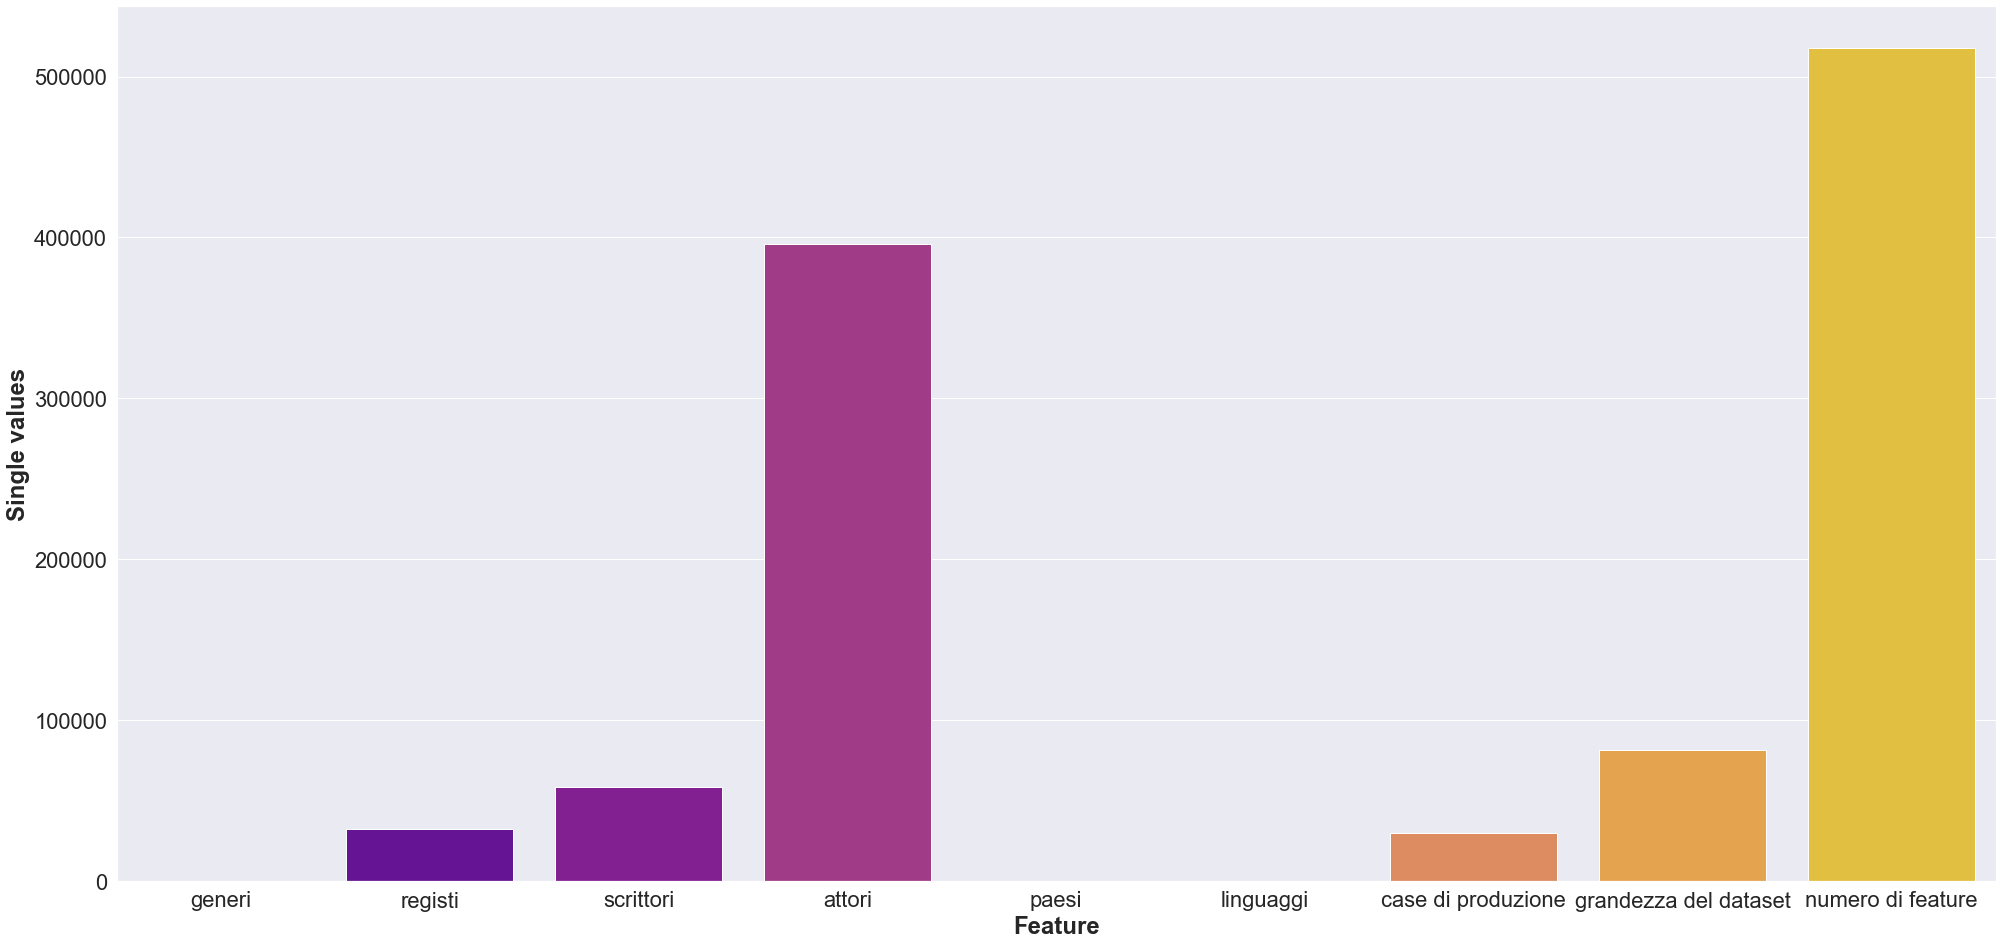

In [267]:
a4_dims = (30, 15)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set(font_scale=2.0)  # crazy big

ax = sns.barplot(x="Feature", y="Single values", data=num,palette='plasma')

La strategia __one hot encoding__ non risulta quindi essere applicabile per via dell'eccessiva sparsità della matrice {0,1} e per l'eccessivo numero di feature che andrebbe ad essere considerato.
L'assunzione che si è seguita per utilizzare le informazioni delle feature non categoriche è legata al numero di presenze di una occorrenza della feature nel dataset. Se ad esempio, come feature __'director'__ si ha originalmente,nella riga n.1, l'entrata __'WoodyAllen'__, quest'ultima verrà sostituita dal numero di volte che WoodyAllen è presente nel dataset. L'assunzione è dunque che se un regista ha prodotto pochi film, probabilmente questi non avranno ricevuto dalla critica un valore molto alto, in quanto, se così fosse stato, il regista avrebbe prodotto molti più film. 

## 1.1.2 Missing Values

Osserviamo il numero di missing values del dataset completo

In [153]:
features=movies.columns.tolist()
F=[]
for f in features:
    F.append(pd.isna(movies[f]).tolist())
C_NA=[]
for i in range(len(F)):
    c_na=0
    for j in range(len(F[i])):
        if F[i][j]==True:
            c_na=c_na+1
    C_NA.append(c_na)
for i in range(len(C_NA)):
    print ('Per la feature %s mancano %i valori' %(features[i],C_NA[i]))

Per la feature year mancano 0 valori
Per la feature genre mancano 0 valori
Per la feature duration mancano 0 valori
Per la feature country mancano 0 valori
Per la feature language mancano 0 valori
Per la feature director mancano 0 valori
Per la feature writer mancano 0 valori
Per la feature production_company mancano 0 valori
Per la feature actors mancano 0 valori
Per la feature avg_vote mancano 0 valori
Per la feature budget mancano 58469 valori
Per la feature usa_gross_income mancano 66179 valori
Per la feature worlwide_gross_income mancano 51381 valori
Per la feature metascore mancano 68551 valori


In [272]:
movies=movies.rename(columns={'usa_gross_income':'us_inc','worlwide_gross_income':'w_inc','production_company':'prod'})

features=movies.columns.tolist()

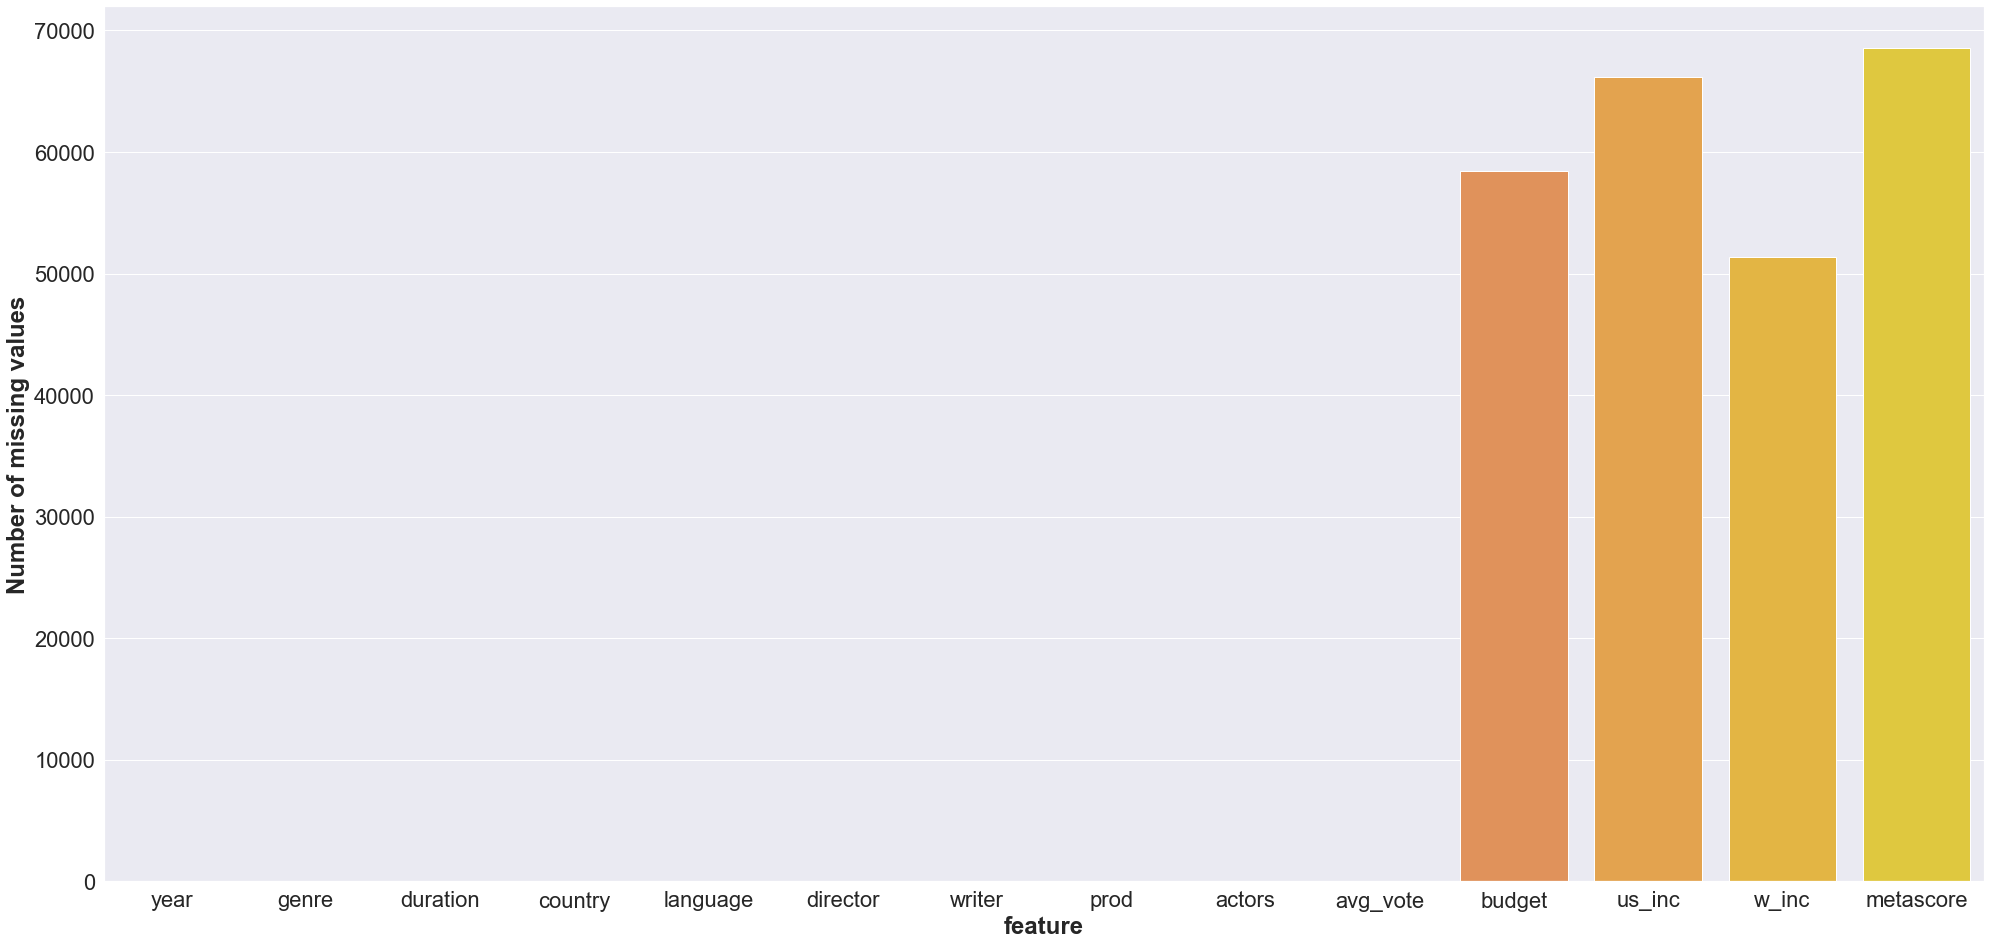

In [273]:
dist_dataset=pd.DataFrame()

dist_dataset['feature']=features
dist_dataset['Number of missing values']=C_NA
a4_dims = (30, 15)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set(font_scale=2.0)  # crazy big

ax = sns.barplot(x="feature", y="Number of missing values", data=dist_dataset,palette='plasma')


Si può notare come i missing values (m.v.) si concentrino soprattutto sulle seguenti feature:
* budget: 58469 m.v.
* us_gross_income: 66179 m.v.
* worlwide_gross_income: 51381 m.v.
* metascore: 68551 m.v.

Il numero di missing values è troppo significativo rispetto al numero di istanze del dataset, dunque risulta essere proibitivo inserire sinteticamente i valori mancanti. A questo punto si presentano due strategie: 

* __STRATEGIA 1: Eliminare totalmente le colonna sopracitate dal dataset__, utilizzando dunque tutte le istanze del dataset ma con meno feature 
* __STRATEGIA 2: Conservare tutte le colonne del dataset eliminando le righe contenenti missing values__, e dunque utilizzando meno istanze nel dataset ma con più feature disponibili 

Per essere guidati nella scelta della strategia migliore, la __mutua informazione__ è stata calcolata.
La mutua informazione rappresenta una metrica della dipendenza tra le distribuzioni di due variabili $X$ e $Y$.
Se due variabili sono indipendenti la mutua informazione risulta essere 0. Quanto più le due variabili risultano invece essere dipendenti, tanto più la mutua informazione tenderà ad essere 1. Matematicamente il concetto si esprime tramite la seguente espressione:
\begin{equation}
I(X,Y)= - \sum_{x \in X}\sum_{y \in Y} p(x,y) \ln{\frac{p(x)p(y)}{p(x,y)}}
\end{equation}
L'idea è quella di valutare la mutua informazione tra le variabili X (che saranno volta per volta le feature del dataset) e la variabile Y che sarà individuata dal target (avg_vote). 
Ad esempio, consideriamo che $B$ sia l'insieme di tutti i valori della colonna budget: $X=B=(b_1,b_2,...,b_n)$ con $n$ a rappresentare il numero di istanze. Allo stesso modo $Y$ sarà l'insieme di tutti i valori della colonna target avg_vote:$Y=(y_1,y_2,...,y_n)$. Applicando la formula di $I(X,Y)$ si otterrà un valore che rappresenterà la dipendenza tra la variabile budget e il target, e sarà dunque un indicatore della informazione che la feature fornisce nell'algoritmo di classificazione. Tanto più il valore della $I(X,Y)$ sarà alto, tanto più la feature sarà "informative" nel nostro processo di classificazione, e sarà dunque proibitivo cancellarla dal dataset.

Si noti subito che feature come budget, usa_gross_income e worlwide_gross_income presentano diverse valute, è stato necessario ricorrere a una libreria Python: (_CurrencyConverter 0.14.2_ https://pypi.org/project/CurrencyConverter/) e convertire tutte le valute in dollaro.

In [274]:
movies=movies.dropna()

world=movies[['w_inc','avg_vote']]
world['w_inc']=world['w_inc'].str.replace('$','USD')
SIGLE=[]
c=CurrencyConverter()

for i in range(len(world.w_inc.tolist())):
    try:
        SIGLE.append(world.w_inc.tolist()[i][0]+world.w_inc.tolist()[i][1]+world.w_inc.tolist()[i][2])
        
    except:
        continue

world['valuta']=SIGLE
missing=list(set(SIGLE)-set(c.currencies))
for m in missing:
    world=world.drop(world[world.valuta==m].index)

SIGLE=list(set(SIGLE))
for i in range(len(SIGLE)):
    world['w_inc']=world['w_inc'].str.replace(SIGLE[i],'')
new_values=[]
valute=world.valuta.tolist()
budgets=world.w_inc.tolist()

for v in range(len(valute)):
    new_values.append(float(c.convert(budgets[v],valute[v],'USD')))
world['w_inc']=new_values
movies['w_inc']=world['w_inc']
movies['us_inc']=movies['us_inc'].str.replace('$','')

Budget=movies[['budget','avg_vote']]
Budget['budget']=Budget['budget'].str.replace('$','USD')
SIGLE=[]

for i in range(len(Budget.budget.tolist())):
    try:
        SIGLE.append(Budget.budget.tolist()[i][0]+Budget.budget.tolist()[i][1]+Budget.budget.tolist()[i][2])
        
    except:
        continue

Budget['valuta']=SIGLE
missing=list(set(SIGLE)-set(c.currencies))
for m in missing:
    Budget=Budget.drop(Budget[Budget.valuta==m].index)
SIGLE=list(set(SIGLE))
for i in range(len(SIGLE)):
    Budget['budget']=Budget['budget'].str.replace(SIGLE[i],'')
    new_values=[]
valute=Budget.valuta.tolist()
budgets=Budget.budget.tolist()

for v in range(len(valute)):
    new_values.append(float(c.convert(budgets[v],valute[v],'USD')))
Budget['$']=new_values
Budget=Budget[['$','avg_vote']]
movies['budget']=Budget['$']
movies=movies.dropna(subset=['budget'])
movies=movies.rename(columns={'avg_vote':'target'})
movies=movies.dropna()

In queste righe di codice è stata applicata l'idea descritta sopra: tutte le colonne non numeriche sono state sostituite con il numero di istanze presenti dal dataset per quella feature

In [277]:
cat_movies=movies.copy()
cat_movies['target']=cat_movies['target'].round()

In [281]:
cat_list=[cat_movies.columns.tolist()[i] for i in range(1,8)]
del(cat_list[cat_list.index('duration')])
cat_list=cat_list+['actors']
big_count=[]
big_unique=[]
for j in range(len(cat_list)):
    cat=movies[cat_list[j]].tolist()

    elements=[val for sublist in cat for val in sublist]
    elements_data=pd.DataFrame()
    elements_data[cat_list[j]]=elements
    unique=elements_data[cat_list[j]].drop_duplicates().tolist()
    elements_data['Target']=np.arange(0,len(elements_data))
    elements_data=elements_data.groupby(cat_list[j]).count().reset_index()
    big_count.append(elements_data)
    unique=elements_data[cat_list[j]].drop_duplicates().tolist()
    big_unique.append(unique)


In [282]:
new_feat=['numerofilmgenere','numerofilmpaese','numerofilmlinguaggio','writer']
k=0
NUMB_TOT=[]
E_TOT=[]
for c in cat_list:
    NUMB=[]
    E_MAX=[]
    for i in range(len(movies)):
        list_=movies[c].tolist()[i]
        numeri=[]
        for l in list_:
            try:
                numeri.append(big_count[k][big_count[k][c]==l]['Target'].tolist()[0])
            except:
                numeri.append(1)
        
        numb=max(numeri)
        e_max=list_[numeri.index(numb)]
        E_MAX.append(e_max)
        NUMB.append(numb)
    E_TOT.append(E_MAX)
    NUMB_TOT.append(NUMB)
    k=k+1
    print(k)

1
2
3
4
5
6
7


In [285]:
genre_data=movies['genre']
country_data=movies['country']
director_data=movies['director']
prod_data=movies['prod']
act_data=movies['actors']
writer_data=movies['writer']
lan_data=movies['language']

In [286]:
new_cat=['genre_data','country_data','language_data','writer_data','director_data','production_data','actor_data']
data=[genre_data,country_data,lan_data,writer_data,director_data,prod_data,act_data]

In [293]:
new_movies=movies.copy()
for k in range(len(cat_list)):
    new_movies[cat_list[k]]=NUMB_TOT[k]
    new_movies[new_cat[k]]=E_TOT[k]
new_movies.to_csv('smalldataset.csv')

In [294]:
new_movies=new_movies.drop(columns=new_cat)


In [324]:
new_movies.head(5)

year  genre  duration  country  language  director  writer  prod  \
1005  1931   3593        87     5400      6083         2       3     2   
2336  1936   3593        87     5400      6083         2       3     2   
2687  1937    511        83     5400      6083         1       2    19   
3100  1939   3593       238     5400      6083         4       1     1   
3180  1939   3593       129     5400      6083         1       1   284   

      actors  target     budget      us_inc        w_inc  metascore  
1005       2     8.5  1500000.0       19181      32609.0       99.0  
2336       2     8.5  1500000.0      163577     445226.0       96.0  
2687       9     7.6  1499000.0   184925486  184925486.0       95.0  
3100       2     8.1  3977000.0   200852579  402352579.0       97.0  
3180       5     8.1  1900000.0      144738     144738.0       73.0

In questa porzione di codice è stata calcolata la __mutua informazione__ per valutare la strategia migliore da applicare

In [311]:
movies_mi=new_movies.copy()
movies_mi=movies_mi.dropna()
target=movies_mi['target'].round().tolist()
feat_data=movies_mi.drop(columns=['target'])


In [312]:
mi =mutual_info_classif(feat_data, target)

In [485]:
MI=pd.DataFrame()
MI['Feature']=feat_data.columns.tolist()
MI['Mutual Information']=mi
MI['Type']=['STRATEGIA 1']*10+['STRATEGIA 2']*(len(mi)-10)

In [486]:
MI

Feature  Mutual Information         Type
0        year            0.043798  STRATEGIA 1
1       genre            0.053056  STRATEGIA 1
2    duration            0.096101  STRATEGIA 1
3     country            0.028520  STRATEGIA 1
4    language            0.006977  STRATEGIA 1
5    director            0.031324  STRATEGIA 1
6      writer            0.015307  STRATEGIA 1
7        prod            0.002205  STRATEGIA 1
8      actors            0.020384  STRATEGIA 1
9      budget            0.030445  STRATEGIA 1
10     us_inc            0.054416  STRATEGIA 2
11      w_inc            0.042888  STRATEGIA 2
12  metascore            0.358530  STRATEGIA 2

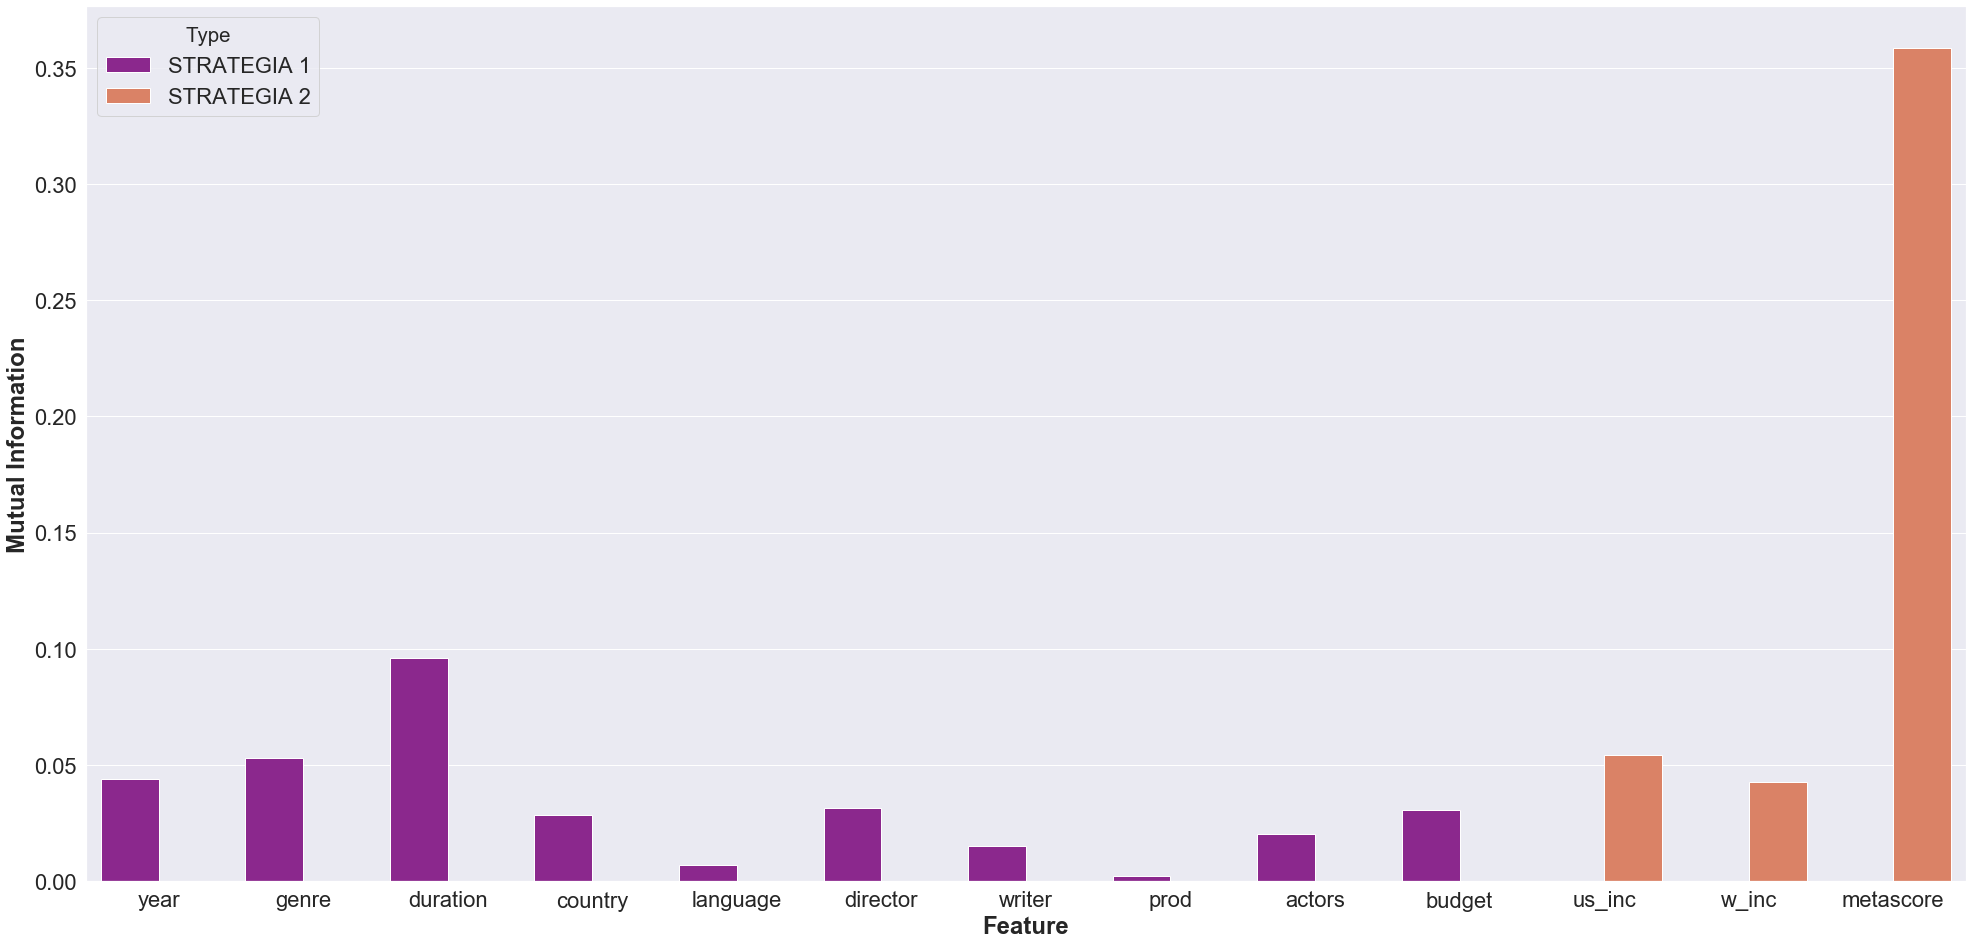

In [488]:
a4_dims = (30, 15)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set(font_scale=2.0)  # crazy big

ax = sns.barplot(x="Feature", y="Mutual Information",hue='Type', palette='plasma',data=MI)

Poichè le mutue informazioni delle feature di tipo __'NEW'__ (e cioè quelle che eliminerei dal dataset secondo la Strategia n.1) risultano essere comparabili (se non maggiori, nel caso della feature metascore) di quelle di tipo __'OLD'__ (e cioè quelle che manterrei secondo la Strategia n.1), la strategia più adeguata sembra essere la __Strategia n.2__ , e dunque si è utilizzato un dataset più piccolo ma più informativo.

In [605]:

dataset=new_movies.drop(columns=['target'])
dataset['target']=new_movies['target']
dataset=dataset.rename(columns={'prod':'production_company','us_inc':'usa_gross_income','w_inc':'worlwide_gross_income'})
dataset=dataset.sample(frac=1)
dataset.head()

year  genre  duration  country  language  director  writer  \
28305  1995   3593       143     5400      6083        10       2   
65918  2015   1443        96     5400      6083         1       6   
34299  2000   3593       106     5400      6083         2       5   
37476  2000   3593        90       46        67         3       3   
28568  1995   2463       100     5400      6083        14       4   

       production_company  actors      budget usa_gross_income  \
28305                  22      29  23000000.0         82569971   
65918                 207       7  35000000.0         22467450   
34299                  61      32  35000000.0         36805288   
37476                   1       1   1000000.0            20666   
28568                   2      36  20000000.0         19751736   

       worlwide_gross_income  metascore  target  
28305            106269971.0       59.0     7.3  
65918             82347656.0       28.0     5.7  
34299             53425292.0       52.0     5.7  
37476                24963.0       61.0     7.0  
28568             19751736.0       27.0     4.6

## 1.2 Data Analysis
### 1.2.1 Bilanciamento del dataset

Il task più generale dell'algoritmo è quello di riconoscere i film 'di successo' (classificazione binaria).
Dunque la colonna target (con dominio da 0.0 a 10.0) dovrà essere trasformata in 0 o 1. Per fare questo, e faciliare l'algoritmo nell'apprendimento, si è scelta la soglia in modo tale da rendere il target bilanciato.
Sono state dunque provate varie soglie, e si è valutato l'equilibrio di queste. La soglia ottimale risulta essere 6.5:

In [606]:
def valutazione(t,th):
    T=[]
    for v in t:
        if v>=th:
            T.append(1)  
        else:
            T.append(0)
    return(T)

In [607]:
S=np.arange(0.0,10.5,0.5)
B=[]
T0=[]
T1=[]
for s in S:
    data=dataset.copy()
    data['target'] =valutazione(data['target'].tolist(),s)
    t0=len(data[data['target']==0])
    t1=len(data[data['target']==1])
    T0.append(t0)
    T1.append(t1)
    B.append(abs(t0-t1))
    print('Imponendo la soglia a %.1f, il numero di 1 nel target è %i'%(s,t1))
    print('Imponendo la soglia a %.1f, il numero di 0 nel target è %i'%(s,t0))
print('La soglia ottimale risulta essere %.1f con %i valori di target 0 e %i valori di target 1'%(S[B.index(min(B))],T0[B.index(min(B))],T1[B.index(min(B))]))

Imponendo la soglia a 0.0, il numero di 1 nel target è 6440
Imponendo la soglia a 0.0, il numero di 0 nel target è 0
Imponendo la soglia a 0.5, il numero di 1 nel target è 6440
Imponendo la soglia a 0.5, il numero di 0 nel target è 0
Imponendo la soglia a 1.0, il numero di 1 nel target è 6440
Imponendo la soglia a 1.0, il numero di 0 nel target è 0
Imponendo la soglia a 1.5, il numero di 1 nel target è 6439
Imponendo la soglia a 1.5, il numero di 0 nel target è 1
Imponendo la soglia a 2.0, il numero di 1 nel target è 6437
Imponendo la soglia a 2.0, il numero di 0 nel target è 3
Imponendo la soglia a 2.5, il numero di 1 nel target è 6426
Imponendo la soglia a 2.5, il numero di 0 nel target è 14
Imponendo la soglia a 3.0, il numero di 1 nel target è 6408
Imponendo la soglia a 3.0, il numero di 0 nel target è 32
Imponendo la soglia a 3.5, il numero di 1 nel target è 6379
Imponendo la soglia a 3.5, il numero di 0 nel target è 61
Imponendo la soglia a 4.0, il numero di 1 nel target è 6317
I

In [608]:
threshold=S[B.index(min(B))]

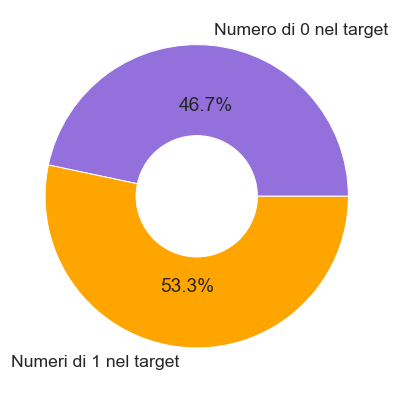

In [609]:
PIE=[T0[B.index(min(B))],T1[B.index(min(B))]]
my_circle=plt.Circle( (0,0), 0.4, color='white')

plt.pie(PIE,autopct='%1.1f%%',labels=['Numero di 0 nel target','Numeri di 1 nel target'],colors=['mediumpurple','orange'])
p=plt.gcf()
p.gca().add_artist(my_circle)
p.set_size_inches(6.5, 6.5)
plt.show()


Il dataset, opportunamente rimaneggiato e pronto per il task di classificazione, è mostrato, nelle sue prime 5 righe:

In [610]:
dataset['target'] =(valutazione(dataset['target'],threshold))

In [611]:
dataset.head()

year  genre  duration  country  language  director  writer  \
28305  1995   3593       143     5400      6083        10       2   
65918  2015   1443        96     5400      6083         1       6   
34299  2000   3593       106     5400      6083         2       5   
37476  2000   3593        90       46        67         3       3   
28568  1995   2463       100     5400      6083        14       4   

       production_company  actors      budget usa_gross_income  \
28305                  22      29  23000000.0         82569971   
65918                 207       7  35000000.0         22467450   
34299                  61      32  35000000.0         36805288   
37476                   1       1   1000000.0            20666   
28568                   2      36  20000000.0         19751736   

       worlwide_gross_income  metascore  target  
28305            106269971.0       59.0       1  
65918             82347656.0       28.0       0  
34299             53425292.0       52.0       0  
37476                24963.0       61.0       1  
28568             19751736.0       27.0       0

In [602]:
print('La lunghezza del nuovo dataset è %i' %(len(dataset)))

La lunghezza del nuovo dataset è 6440


Osserviamo che ora non ci sono missing values: 

In [601]:
features=dataset.columns.tolist()
F=[]
for f in features:
    F.append(pd.isna(dataset[f]).tolist())
C_NA=[]
for i in range(len(F)):
    c_na=0
    for j in range(len(F[i])):
        if F[i][j]==True:
            c_na=c_na+1
    C_NA.append(c_na)
for i in range(len(C_NA)):
    print ('Per la feature %s mancano %i valori' %(features[i],C_NA[i]))

Per la feature year mancano 0 valori
Per la feature genre mancano 0 valori
Per la feature duration mancano 0 valori
Per la feature country mancano 0 valori
Per la feature language mancano 0 valori
Per la feature director mancano 0 valori
Per la feature writer mancano 0 valori
Per la feature production_company mancano 0 valori
Per la feature actors mancano 0 valori
Per la feature budget mancano 0 valori
Per la feature usa_gross_income mancano 0 valori
Per la feature worlwide_gross_income mancano 0 valori
Per la feature metascore mancano 0 valori
Per la feature target mancano 0 valori


### 1.2.2 Matrice di correlazione

Una prima rappresentazione informativa del dataset è fornita dalla __matrice di correlazione__. Questa matrice rappresenta il coefficiente di Pearson tra le variabili presenti nel dataset. 

Data una variabile $X$ è possibile definire la __varianza di $X$__ ($Var(X)$) nel seguente modo:

\begin{equation}
Var(X)=E[(X-E[X])^2]=E[X^2]-E[X]^2
\end{equation}

__$Var(X)$ rappresenta dunque il valore atteso della differenza (quadratica) di una variabile dal suo valore atteso__. In altre parole rappresenta quanto la variabile X si disperde intorno al suo valor medio. 
Considerata un'altra variabile $Y$ è possibile definire la __covarianza tra $X$ e $Y$__:

\begin{equation}
Cov(X,Y)= E[(X-E[X])(Y-E[Y])]=E[XY]-E[X]E[Y]
\end{equation}

Si può subito osservare che se $X$ e $Y$ sono indipendenti,$E[XY]=E[X]E[Y]$ e dunque $Cov(X,Y)=0$. Infatti __questa quantità, come il nome suggerisce, dà un'indicazione di quanto (e come) $X$ vari (linearmente) al variare di $Y$ e viceversa__. 
E' infine possibile definire il __coefficiente di correlazione di Pearson__:

\begin{equation}
\rho_{XY}= \frac{Cov(X,Y)}{\sqrt{Var(X)Var(Y)}}
\end{equation}

__Questa quantità, compresa tra -1 e 1, è un indicatore di quanto $X$ e $Y$ siano linearmente dipendenti__. 
Si possono osservare,infatti, i seguenti casi limite:
* $X=Y$. Per definizione $Cov(X,X)=E[X^2]-E[X]^2$, e al contempo $Var(X)=Var(Y)=E[X^2]-E[X]^2$ dunque $\rho_{XY}=1$
* $X$ linearmente indipendente da $Y$. Per definizione $Cov(X,Y)=0$ e dunque $\rho_{XY}=0$
* $X=-Y$. Per definizione $Cov(X,-X)=E[-X^2]+E[X]^2=-E[X^2]+E[X]^2$, $Var(X)=E[X^2]-E[X]^2$ e $Var(-X)=E[X^2]+E[X]^2$ dunque $\rho_{XY}=\frac{-Var(X)}{Var(X)}=-1$

Rappresentando la matrice di correlazione tra tutte le variabili (feature) si ha la seguente matrice:

\begin{equation*}
\rho= 
\begin{pmatrix}
\rho_{X_1,X_1} & \rho_{X_1,X_2} & \cdots & \rho_{X_1,X_n} \\
\rho_{X_2,X_1} & \rho_{X_2,X_2} & \cdots & \rho_{X_2,X_n} \\
\vdots  & \vdots  & \ddots & \vdots  \\
\rho_{X_n,X_1} & \rho_{X_n,X_2} & \cdots & \rho_{X_n,X_n} 
\end{pmatrix}
\end{equation*}

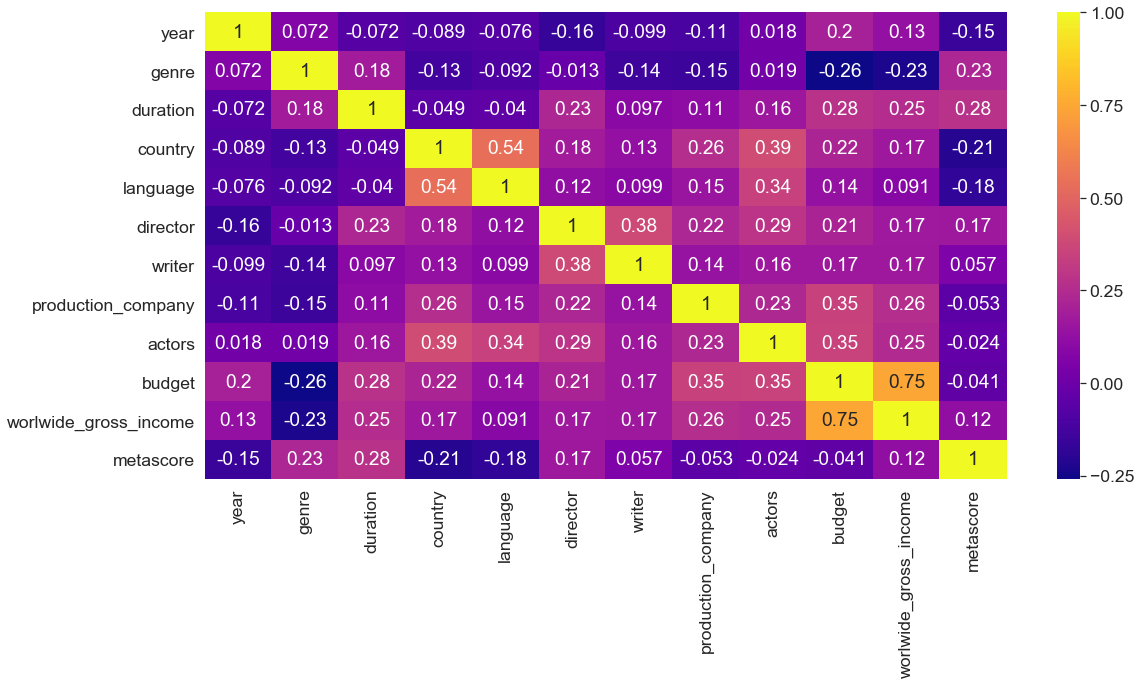

In [587]:
n= len(dataset)
nfeatures= len(dataset.columns)-1
sns.set(font_scale=1.6)

corr = dataset[dataset.columns.tolist()[:-1]].corr()
res=sns.heatmap(corr,annot=True, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, cmap='plasma')


Si può notare banalmente correlazione alta (massima) tra due feature uguali, per i motivi esplicitati in precedenza.
Più interessante è notare la correlazione tra le feature economiche ($\rho_{budget,incasso mondiale}=0.75$), tra le feature linguistiche ($\rho_{country,language}=0.54$) e tra le feature di dominio ($\rho_{director,writer}=0.38$).

## 2. Machine Learning Algorithms:


Il dataset è stato sottoposto ad algoritmi di Machine Learning per la __classificazione binaria__. In particolare i seguenti algoritmi sono stati utilizzati:
* Logistic Regression 
* Gaussian Naive Bayes
* Gaussian Discriminant Analysis (lineare e quadratica)  
* SVM
* Decision Tree
* Random Forest 

Questi algoritmi sono stati utilizzati in 3 modi: 
* su due feature ('budget' e 'worlwide_gross_income') a __split fisso__ (80%,20%), per scopi rappresentativi 
* su tutte le feature a split fisso (80%,20%) , per poter apprezzare le performance del modello
* su tutte le feature con __cross validation__, per analizzare il modello a performance migliore in modo robusto dato il numero esiguo di istanze a disposizione 

Prima dell'utilizzo degli algoritmi sopra elencati è avvenuta una trasformazione delle feature in input tramite degli __scaler__ per ottenere una separazione più efficace. Gli scaler utilizzati sono stati i seguenti:

* StandardScaler(), applica una trasformazione del tipo $x_i\rightarrow \phi(x_i)=\frac{x_i-\mu(x_i)}{s(x_i)}$, che permette di scalare le feature in modo da renderle con media 0 e varianza 1. 
* PowerTransformer() che è un tipo di trasformazione che cerca di rendere i dati più "gaussiani". 

Queste due forme di scaling sono state utilizzate in quanto hanno permesso agli algoritmi di raggiungere performance migliori.

### 2.1 Split

#### 2.1.1 Split Fisso

Lo split fisso consiste nel dividere il dataset in due porzioni:
* training set, sul quale permettere all'algoritmo di Machine Learning di apprendere i suoi parametri ed effettuare al meglio il suo task, fornendo all'algoritmo stesso i valori del target
* test set, sul quale l'algoritmo, ignaro dei valori del target, effettuerà le sue previsioni.

Sul __training set__ verrà dunque compiuto l'apprendimento dei vari parametri del modello, che verrà testato sul __test set__ e ne verrà valuta le relativa performance. 
<img src="images.png" style="height:230px">

Nel nostro caso il dataset è stato prima mischiato, e successivamente separato: 

In [612]:
dataset=dataset.sample(frac=1)
dataset.head()

year  genre  duration  country  language  director  writer  \
23368  1988   3593       155      668       323         4       7   
37474  2002   2463       108      155       323         3       4   
20655  1984   3593       127     5400      6083        17      12   
56159  2010   3593       110     5400      6083         1       1   
30988  1998   3593        87     5400      6083         6       7   

       production_company  actors      budget usa_gross_income  \
23368                   1       4   5000000.0         12397210   
37474                   3       6  45176000.0          3684305   
20655                   5      50  58000000.0         25928721   
56159                   1       4   3000000.0          2848578   
30988                   1      21   6000000.0          2281761   

       worlwide_gross_income  metascore  target  
23368             12645096.0       80.0       1  
37474             44310395.0       11.0       0  
20655             25928721.0       68.0       1  
56159              3269546.0       31.0       0  
30988              2281761.0       66.0       0

__Due Feature__:

In [848]:
X_small=np.array(dataset[['budget','worlwide_gross_income']])
t_small=np.array(dataset['target'])
X_train_small, X_test_small, t_train_small,t_test_small =train_test_split(X_small,t_small,test_size=0.2)

__Tutte le feature__:

In [849]:
n= len(dataset)
nfeatures= len(dataset.columns)-1

X=np.array(dataset[dataset.columns.tolist()[:-1]])
t=np.array(dataset['target'])
t=np.array(t)
X_train, X_test, t_train, t_test =train_test_split(X,t,test_size=0.2)

#### 2.1.2 K-fold Cross Validation

Lo splitting eseguito nella Cross Validation risulta essere più robusto soprattutto quando, come nel nostro caso, la quantità di dati a disposizione non è elevata. Il dataset viene partizionato in K set di uguale dimensione. Iterativamente, per K volte, __un set è identificato come il test set e l'unione degli altri K-1 come training set (K-fold cross validation__). La misura della bontà dell'algoritmo verrà dunque data dalla media delle K misure. 
<img src="kfold.png" style="height:280px">

In una lista metteremo, algoritmo per algoritmo, le varie performance, andando alla fine a decretare l'algoritmo più efficiente per il task.

In [908]:
ALG=['LogisticRegression','QDA','LDA','NaiveBayes','SVM','DecisionTree','RandomForest']
TOT_PERFORMANCE=[]

## 2.2 Logistic Regression

La Logistic Regression è un algoritmo di classificazione probabilistica appartenente alla classe dei __modelli lineari generalizzati (discriminativi)__. 

In questo tipo di modelli viene effettuata un'ipotesi sulla distribuzione di probabilità a posteriori $p(C_k|x)$ e verranno determinati i migliori parametri della distribuzione. 
Nel caso della regressione logistica a due classi, si dimostra, tramite la regola di Bayes, che:
\begin{equation}
\begin{split}
&
p(C_1|x)=\frac{p(x|C_1)p(C_1)}{p(x|C_1)p(C_1)+p(x|C_0)p(C_0)}
\\
\\
&
a=\ln{\frac{p(x|C_1)p(C_1)}{p(x|C_0)p(C_0)}}
\\
\\
&
p(C_1|x)=\sigma(a)
\end{split}
\end{equation}

Ipotizzando $a=w^{T}\phi(X)$, si ottiene il modello di Logistic Regression.
La funzione di verosimiglianza per il problema in questione può essere scritta come:
\begin{equation}
p(t|X,w)=L(w|X,t)=\prod_{n=1}^N y_n^{t_n}(1-y_n)^{(1-t_n)}
\end{equation}
Con $t_n=\{0,1\}$ e $y_n=p(C_1|\phi(x_n))=\sigma(w^T\phi(x_n))$. Si può infatti notare che, per ogni $t_n=1$ si ottiene il fattore $y_n=p(C_1|\phi(x_n))$, e per ogni $t_n=0$ si ottiene il fattore $1-y_n=p(C_0|\phi(x_n))$. Si può inoltre osservare che l'approccio corretto richiederebbe il calcolo di $p(X,t|w)=p(t|X,w)p(X|w)$. Tuttavia, poichè il secondo termine non dipende da w, $p(X|w)=p(X)$ e dunque si ottiene lo stesso risultato. 

Effettuando il logaritmo sulla quantità $L(w|X,t)$ si ha:
\begin{equation}
l(w|X,t)=-log(L(w|X,t)) = -\sum_{n=1}^{N} (t_n log(y_n) + (1-t_n)log(1-y_n))
\end{equation}
Per osservare la massima aderenza tra la distribuzione di probabilità e il dataset cerchiamo il massimo valore di $l(w|X,t)$ (__maximum likelihood__):



\begin{equation}
\\
\frac{\partial{l(w|X,t)}}{\partial{w}}=-\sum_{n=1}^{N} (t_n-y_n)\phi(x_n)=0
\\
\end{equation}

Ottimizzando in modo numerico l'espressione sopra mostrata, è possibile trovare i migliori valori del vettore $w$. Utilizzando il vettore ottimo di $w$ è possibile effettuare la predizione inserendo il vettore all'interno della espressione per $p(C_1|x)$ e $p(C_2|x)$ per trovare il valore massimo e assegnare il punto alla classe opportuna. 

### 2.2.1 Due feature

In [615]:
scaler = StandardScaler()
#scaler=PowerTransformer()
logreg = LogisticRegression()

model = Pipeline([('scale', scaler), ('clf', logreg)])

model.set_params(clf__C=1e5)
model = model.fit(X_train_small, t_train_small)

In [616]:
delta1=max(X_small[:,0])-min(X_small[:,0])
delta2=max(X_small[:,1])-min(X_small[:,1])
min1=min(X_small[:,0])-delta1/10
max1=max(X_small[:,0])+delta1/10
min2=min(X_small[:,1])-delta2/10
max2=max(X_small[:,1])+delta2/10
u = np.linspace(min1, max1, 1000)
v = np.linspace(min2, max2, 1000)
u, v = np.meshgrid(u, v)
z = model.predict(np.c_[u.ravel(), v.ravel()])
p = model.predict_proba(np.c_[u.ravel(), v.ravel()])
z = z.reshape(u.shape)
p0 = p[:,0].reshape(u.shape)
p1 = p[:,1].reshape(u.shape)


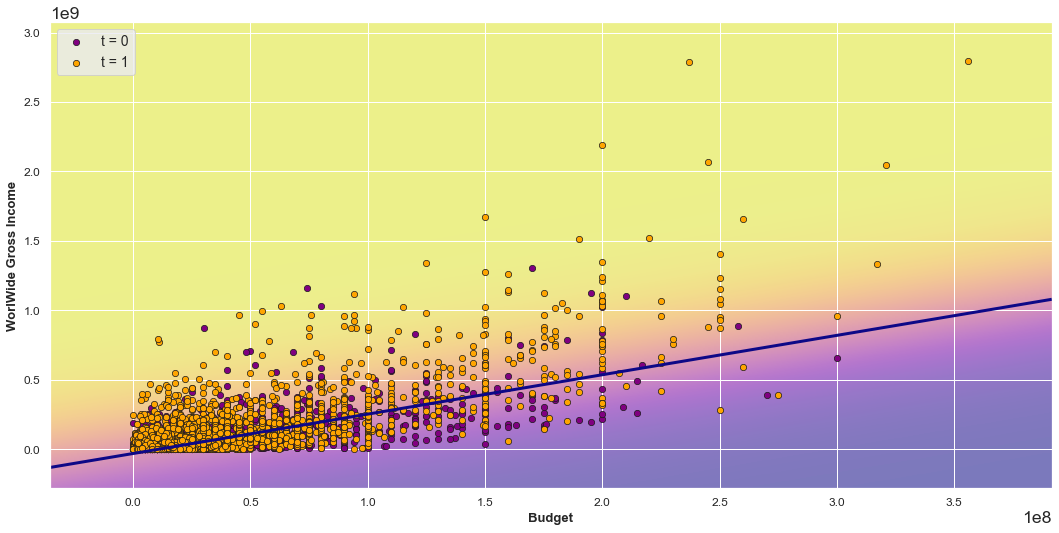

In [617]:
X_s, t_s=X_small, t_small
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
ax.imshow(p1, origin='lower', extent=(min1, max1, min2, max2),cmap=plt.get_cmap('plasma'), alpha=0.50, aspect='auto')
plt.contour(u, v, p1, [0.5], linewidths=3, cmap='plasma')
X0 = np.compress(t_s==0, X_s, axis=0)
X1 = np.compress(t_s==1, X_s, axis=0)
ax.scatter(X0[:, 0], X0[:, 1], s=40, c='purple', edgecolor='k', marker= 'o', lw=.7, label='t = 0')
ax.scatter(X1[:, 0], X1[:, 1], s=40, c='orange', edgecolor='k', marker= 'o', lw=.7,  label='t = 1')
ax.legend(loc='upper left', fontsize=14)
plt.xlabel('Budget', fontsize=13)
plt.ylabel('WorlWide Gross Income', fontsize=13)
plt.xlim(min1, max1)
plt.ylim(min2, max2)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.title('Classe 1')
plt.show()

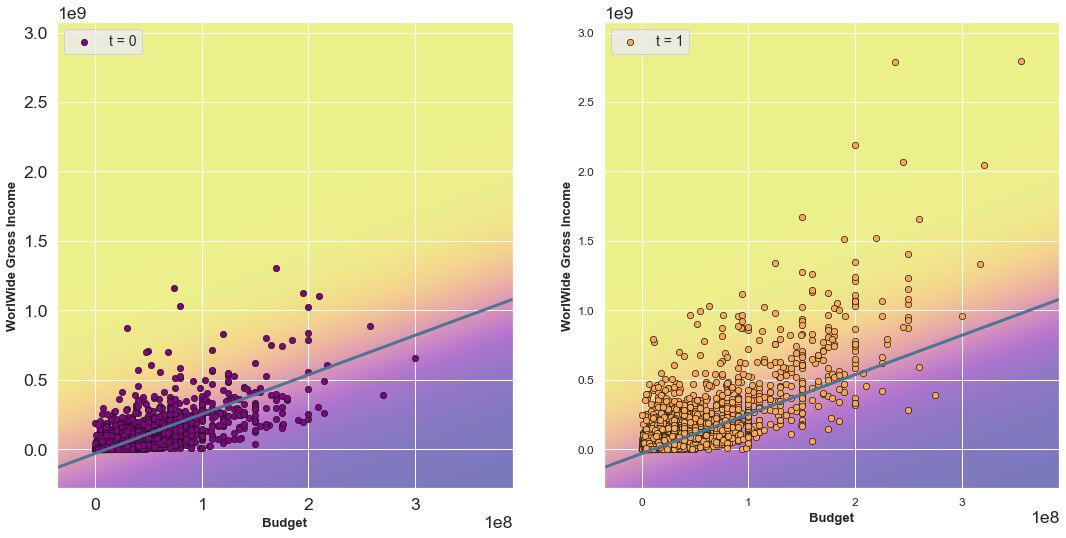

In [618]:
X_s, t_s=X_small, t_small
fig = plt.figure(figsize=(16,8))
fig.add_subplot(1,2,1)
ax1 = fig.gca()
ax1.imshow(p1, origin='lower', extent=(min1, max1, min2, max2),cmap=plt.get_cmap('plasma'), alpha=0.50, aspect='auto')
plt.contour(u, v, p1, [0.5], linewidths=3, colors=colors[8])
X0 = np.compress(t_s==0, X_s, axis=0)
X1 = np.compress(t_s==1, X_s, axis=0)
ax1.scatter(X0[:, 0], X0[:, 1], s=40, c='purple', edgecolor='k', marker= 'o', lw=.7, cmap=plt.get_cmap('plasma'), label='t = 0')
ax1.legend(loc='upper left', fontsize=14)
plt.xlabel('Budget', fontsize=13)
plt.ylabel('WorlWide Gross Income', fontsize=13)
fig.add_subplot(1,2,2)
ax2 = fig.gca()
ax2.imshow(p1, origin='lower', extent=(min1, max1, min2, max2),cmap=plt.get_cmap('plasma'), alpha=0.50, aspect='auto')
plt.contour(u, v, p1, [0.5], linewidths=3, colors=colors[8])
ax2.scatter(X1[:, 0], X1[:, 1], s=40, c=colors[0], edgecolor='k', marker= 'o', lw=.7, cmap=plt.get_cmap('plasma'), label='t = 1')
ax2.legend(loc='upper left', fontsize=14)
plt.xlabel('Budget', fontsize=13)
plt.ylabel('WorlWide Gross Income', fontsize=13)
plt.xlim(min1, max1)
plt.ylim(min2, max2)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.title('Classe 1')
plt.show()

### 2.2.2 Tutte le feature

In [741]:
scaler=PowerTransformer()
#scaler=StandardScaler()

logreg = LogisticRegression()

model = Pipeline([('scale', scaler),('clf', logreg)])
model = model.fit(X_train,t_train)

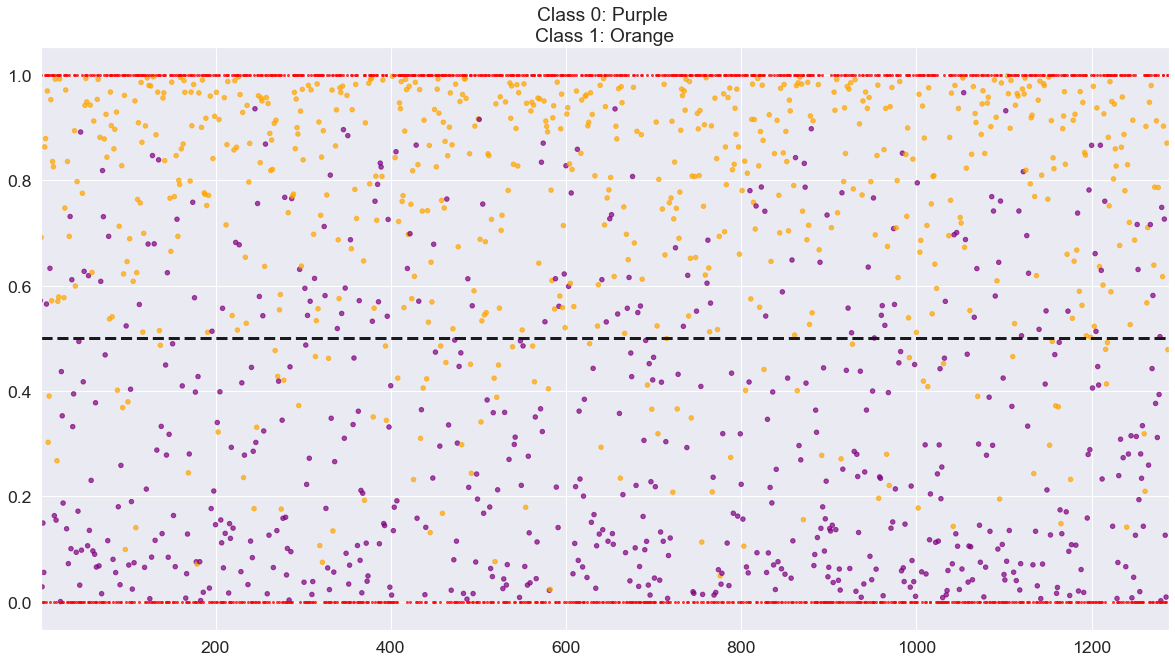

In [742]:
y_prob = model.predict_proba(X_test)
c = list(pd.DataFrame(t_test)[0].apply(lambda x: 'Orange' if x==1 else 'Purple'))
plt.figure(figsize=(18,10))
plt.plot(range(y_prob.shape[0]),pd.DataFrame(t_test), color='Red', ms = 4, marker='.', linestyle=' ', alpha=.7)

plt.scatter(range(y_prob.shape[0]), y_prob[:,1], color=c, s = 20, marker='o', alpha=.7)
plt.axhline(y=.5, xmin=0, xmax=1, linewidth=3, linestyle='dashed', color='k')
plt.xlim(1,y_prob.shape[0])
plt.title('Class 0: Purple \nClass 1: Orange');
plt.show()

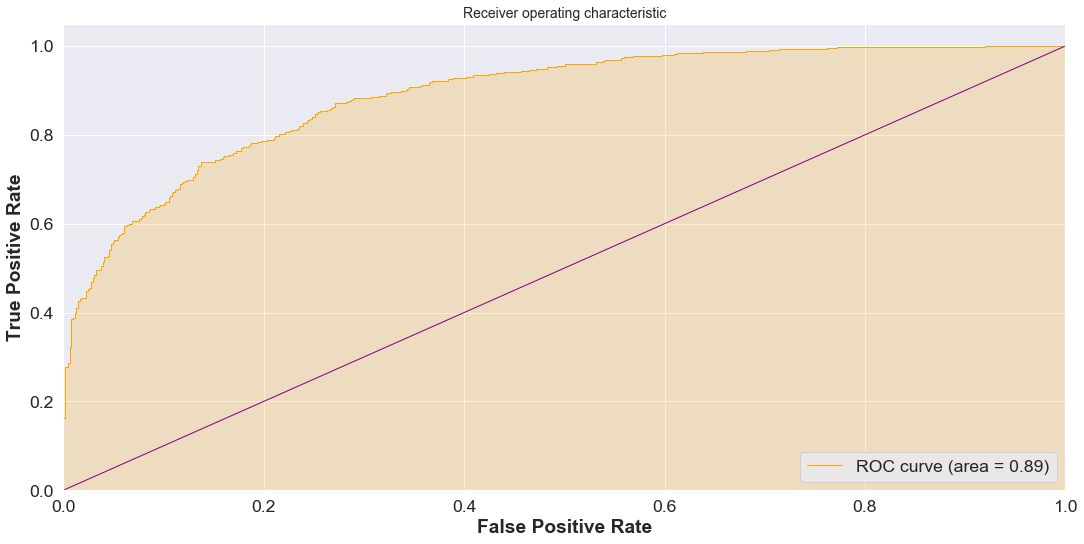

In [743]:
fpr, tpr, thresholds = roc_curve(pd.DataFrame(t_test)[0], model.predict_proba(X_test)[:,1], pos_label=1)

plt.figure(figsize=(16,8))
plt.plot(fpr, tpr, color='Orange', linewidth=1,label='ROC curve (area = %0.2f)' %  auc(fpr, tpr))
plt.fill_between(fpr, 0, tpr, alpha=0.2, color='Orange')
plt.plot([0, 1], [0, 1], color='Purple', linewidth=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel(r'True Positive Rate')
plt.xlabel(r'False Positive Rate')
plt.title('Receiver operating characteristic', fontsize=14)
plt.legend(loc="lower right")
plt.show()

In [744]:
print('AUC = {0:0.4f}'.format(auc(fpr, tpr)))


AUC = 0.8886


In [745]:
optimal_idx = np.argmax(tpr-fpr)
optimal_threshold = thresholds[optimal_idx]
print('Optimal threshold: {0:3.3f}'.format(optimal_threshold))


Optimal threshold: 0.477


In [746]:
p_train = model.predict(X_train)
p_test = model.predict(X_test)
cm_train = confusion_matrix(t_train,p_train)
cm_test = confusion_matrix(t_test,p_test)

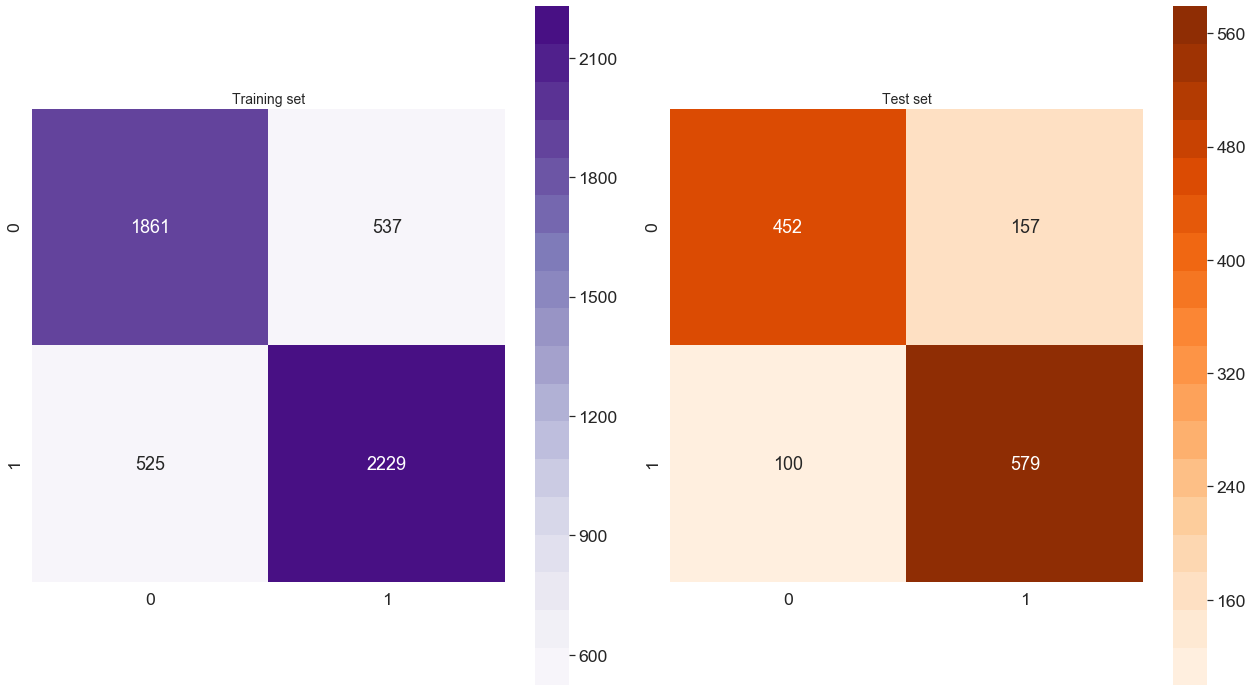

In [747]:
plt.figure(figsize=(18,10))
plt.subplot(1,2,1)
hm = sns.heatmap(cm_train,cbar=True,annot=True,square=True,fmt='d',annot_kws={'size': 18},cmap = sns.color_palette("Purples", 18))
plt.title('Training set', fontsize=14)
plt.subplot(1,2,2)
hm = sns.heatmap(cm_test,cbar=True,annot=True,square=True,fmt='d',annot_kws={'size': 18},cmap = sns.color_palette("Oranges", 18))
plt.title('Test set', fontsize=14)
plt.tight_layout()
plt.show()

In [748]:
print('TRAINING SET')
m = precision_recall_fscore_support(p_train,t_train)
print('Precision class 0 = {0:5.4f}'.format(m[0][0]))
print('Precision class 1 = {0:5.4f}'.format(m[0][1]))
print('Recall class 0 = {0:5.4f}'.format(m[1][0]))
print('Recall class 1 = {0:5.4f}'.format(m[1][1]))
print('F-score class 0 = {0:5.4f}'.format(m[2][0]))
print('F-score class 1 = {0:5.4f}'.format(m[2][1]))
print('Accuracy = {0:5.4f}'.format(accuracy_score(p_train,t_train)))

TRAINING SET
Precision class 0 = 0.7761
Precision class 1 = 0.8094
Recall class 0 = 0.7800
Recall class 1 = 0.8059
F-score class 0 = 0.7780
F-score class 1 = 0.8076
Accuracy = 0.7939


In [749]:
print('TEST SET')

m = precision_recall_fscore_support(p_test,t_test)
print('Precision class 0 = {0:5.4f}'.format(m[0][0]))
print('Precision class 1 = {0:5.4f}'.format(m[0][1]))
print('Recall class 0 = {0:5.4f}'.format(m[1][0]))
print('Recall class 1 = {0:5.4f}'.format(m[1][1]))
print('F-score class 0 = {0:5.4f}'.format(m[2][0]))
print('F-score class 1 = {0:5.4f}'.format(m[2][1]))
print('Accuracy = {0:5.4f}'.format(accuracy_score(p_test,t_test)))

TEST SET
Precision class 0 = 0.7422
Precision class 1 = 0.8527
Recall class 0 = 0.8188
Recall class 1 = 0.7867
F-score class 0 = 0.7786
F-score class 1 = 0.8184
Accuracy = 0.8005


In [750]:
pred_proba = pd.DataFrame(model.predict_proba(X_test)[:,1])
p = pred_proba.applymap(lambda x: 1 if x>optimal_threshold else 0)
cm = confusion_matrix(t_test,p)


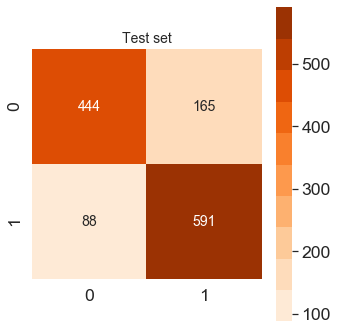

In [751]:
plt.figure(figsize=(5,5))
hm = sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='d',annot_kws={'size': 14},
                 cmap = sns.color_palette("Oranges", 10))
plt.title('Test set', fontsize=14)
plt.tight_layout()
plt.show()

In [752]:
m = precision_recall_fscore_support(p,t_test)
print('Precision class 0 = {0:5.4f}'.format(m[0][0]))
print('Precision class 1 = {0:5.4f}'.format(m[0][1]))
print('Recall class 0 = {0:5.4f}'.format(m[1][0]))
print('Recall class 1 = {0:5.4f}'.format(m[1][1]))
print('F-score class 0 = {0:5.4f}'.format(m[2][0]))
print('F-score class 1 = {0:5.4f}'.format(m[2][1]))
print('Accuracy = {0:5.4f}'.format(accuracy_score(p,t_test)))

Precision class 0 = 0.7291
Precision class 1 = 0.8704
Recall class 0 = 0.8346
Recall class 1 = 0.7817
F-score class 0 = 0.7783
F-score class 1 = 0.8237
Accuracy = 0.8036


### 2.2.3 Cross Validation

In [909]:
X_k_fold=dataset.drop(columns=['target'])
Y_k_fold=dataset['target']
X_k_fold,Y_k_fold=X_k_fold.values,Y_k_fold.values
kf= KFold(n_splits=5)
SCORES=[]
ACCURACY=[]
for train_index, test_index in kf.split(X_k_fold):
    X_k_train, X_k_test = X_k_fold[train_index], X_k_fold[test_index]
    t_k_train, t_k_test = Y_k_fold[train_index], Y_k_fold[test_index]
    scaler=PowerTransformer()

    logreg = LogisticRegression()

    model = Pipeline([('scale', scaler),('clf', logreg)])
    model = model.fit(X_k_train,t_k_train)
    m = precision_recall_fscore_support(model.predict(X_k_test),t_k_test)
    ACCURACY.append(accuracy_score(model.predict(X_k_test),t_k_test))
    SCORES.append(m)
P_0=[]
P_1=[]
F_S_0=[]
F_S_1=[]
R_0=[]
R_1=[]


for i in range(len(SCORES)):
    P_0.append(SCORES[i][0][0])
    P_1.append(SCORES[i][0][1])
    R_0.append(SCORES[i][1][0])
    R_1.append(SCORES[i][1][1])
    F_S_0.append(SCORES[i][2][0])
    F_S_1.append(SCORES[i][2][1])
p_0=np.array(P_0).mean()
p_1=np.array(P_1).mean()
f_s_0=np.array(F_S_0).mean()
f_s_1=np.array(F_S_1).mean()
r_0=np.array(R_0).mean()
r_1=np.array(R_1).mean()
accuracy=np.array(ACCURACY).mean()
PERFORMANCES=[p_0,p_1,f_s_0,f_s_1,r_0,r_1,accuracy]
perf_title=['precisione classe 0','precisione classe 1','f_measure classe 0',
           'f_measure classe 1','recall classe 0','recall classe 1','accuracy']
for i in range(len(PERFORMANCES)):
    print("La %s del modello %s è %f" %(perf_title[i],ALG[0],PERFORMANCES[i]))
TOT_PERFORMANCE.append(PERFORMANCES)

La precisione classe 0 del modello LogisticRegression è 0.772968
La precisione classe 1 del modello LogisticRegression è 0.811859
La f_measure classe 0 del modello LogisticRegression è 0.777607
La f_measure classe 1 del modello LogisticRegression è 0.807641
La recall classe 0 del modello LogisticRegression è 0.782370
La recall classe 1 del modello LogisticRegression è 0.803517
La accuracy del modello LogisticRegression è 0.793789


## 2.3 Naive Bayes

Un classificatore Naive Bayes è basato su una distribuzione di probabilità categorica per ogni feature. Ogni istanza $x$ del dataset sarà cioè associata a $k$ (nel nostro caso 0 o 1) con $k=$argmax $p(C_k|x)$. Per calcolare questa quantità si utilizza la regola di Bayes:

\begin{equation}
p(C_k|x) = \frac{p(x|C_k)p(C_k)}{p(x)} \propto p(x|C_k)p(C_k)
\end{equation}

Poichè per effettuare la predizione sarà necessario comparare $p(C_{k=1}|x)$ e $p(C_{k=0}|x)$, e poichè queste quantità condividono lo stesso denominatore, è possibile considerare la quantità $p(x|C_k)p(C_k)$ in luogo di $p(C_k|x)$.

Denominiamo $\phi_0(x)=p(x|C_0)$ e $\phi_1(x)=p(x|C_1)$. Inoltre denotiamo le due probabilità a priori $\pi=p(C_0)$ e $1-\pi=p(C_1)$. Per definizione:


\begin{equation}
p(x,C_1)=\phi_1(x)\pi
\end{equation}


\begin{equation}
p(x,C_0)=\phi_0(x)(1-\pi)
\end{equation}

Dunque, si ha che, in modo generale:

\begin{equation}
p(x,t_x|C_k)=(\pi\phi_1(x))^{t_x}((1-\pi)\phi_0(x))^{1-t_x}
\end{equation}

Dove $t_x\in\{0,1\}$ rappresenta la classe di appartenenza di $x$. Questa espressione sta a rappresentare la __verosimiglianza__ che un punto $x$ di classe $t_x$ sia stato estratto da una certa distribuzione $\phi_0(x)$ se quel punto è appartenente alla classe $0$ e $\phi_1(x)$ se appartiene alla classe $1$.
Andando a svolgere questa operazione per tutti gli $N$ punti, applicando il logaritmo all'espressione di sopra e attuando la derivata rispetto a $\pi$, si ottiene il seguente stimatore per $\pi$:
\begin{equation}
\pi=\frac{1}{N} \sum_{n=1}^{N} t_{x_n}
\end{equation}
Dunque, __il miglior stimatore della probabilità a priori per generare un determinato insieme di punti $X=(x_{1},x_{2},...x_{N})$ è $\pi=\frac{N_1}{N}$__.
Si noti come il valore di $\pi$ sia di fatto indipendente dalle singole distribuzioni $\phi_0(x)$ e $\phi_1(x)$. 
Consideriamo ora più in dettaglio il punto $x$. Questo punto sarà realtà descritto da d feature:

\begin{equation}
x=(x^{(0)},x^{(1)},x^{(2)},...,x^{(d)})
\end{equation}. 

Secondo l'assunzione Naive Bayes, la distribuzione di probabilità, per ogni feature del punto $x$ sarà esprimibile nel seguente modo:
\begin{equation}
p(x|C_k)=\prod_{i=1}^d p(x^{(i)}|C_k)
\end{equation}
In particolare l'ipotesi per un classificatore di tipo Gaussian Naive Bayes è che:
\begin{equation}
P(x^{(i)} \mid C_k) = \frac{1}{\sqrt{2\pi\sigma^2_k}} \exp\left(-\frac{(x^{(i)} - \mu_k)^2}{2\sigma^2_k}\right)
\end{equation}
Andando a sostituire questa espressione, ricordando che $P(x \mid C_{k=1})=\phi_1(x)$ e che $P(x \mid C_{k=0})=\phi_0(x)$, si otterrà un'espressione dipendente dai parametri $\mu_k$ e $\sigma_k$. Andando a stimare i migliori valori di questi parametri allo stesso modo di quanto fatto per $\pi$, si otterrà l'espressione completa (e ottimale) per $p(C_k|x)$. A partire da quei valori si otterrà, prendendo il massimo tra $p(C_1|x)$ e $p(C_0|x)$, la predizione per l'istanza $x$.

### 2.3.1 Due feature

In [679]:

scaler=StandardScaler()
Gau = GaussianNB()
model = Pipeline([('scale', scaler),('clf', Gau)])
model = model.fit(X_train_small,t_train_small)

In [680]:
delta1=max(X_small[:,0])-min(X_small[:,0])
delta2=max(X_small[:,1])-min(X_small[:,1])
min1=min(X_small[:,0])-delta1/10
max1=max(X_small[:,0])+delta1/10
min2=min(X_small[:,1])-delta2/10
max2=max(X_small[:,1])+delta2/10
u = np.linspace(min1, max1, 1000)
v = np.linspace(min2, max2, 1000)
u, v = np.meshgrid(u, v)
z = model.predict(np.c_[u.ravel(), v.ravel()])
p = model.predict_proba(np.c_[u.ravel(), v.ravel()])
z = z.reshape(u.shape)
p0 = p[:,0].reshape(u.shape)
p1 = p[:,1].reshape(u.shape)


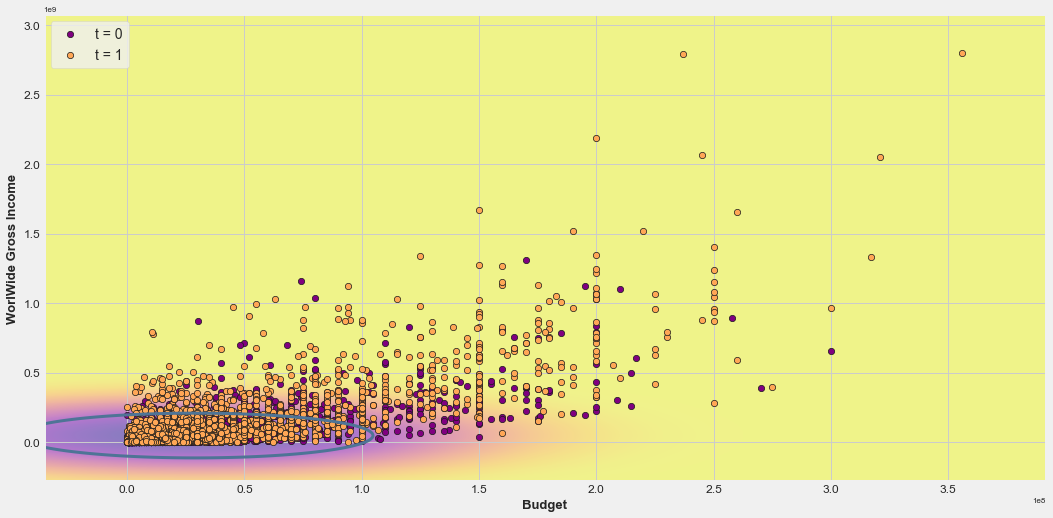

In [681]:
X_s, t_s=X_small, t_small
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
ax.imshow(p1, origin='lower', extent=(min1, max1, min2, max2),cmap=plt.get_cmap('plasma'), alpha=0.50, aspect='auto')
plt.contour(u, v, p1, [0.5], linewidths=3, colors=colors[8])
X0 = np.compress(t_s==0, X_s, axis=0)
X1 = np.compress(t_s==1, X_s, axis=0)
ax.scatter(X0[:, 0], X0[:, 1], s=40, c='purple', edgecolor='k', marker= 'o', lw=.7, cmap=plt.get_cmap('plasma'), label='t = 0')
ax.scatter(X1[:, 0], X1[:, 1], s=40, c=colors[0], edgecolor='k', marker= 'o', lw=.7, cmap=plt.get_cmap('plasma'), label='t = 1')
ax.legend(loc='upper left', fontsize=14)
plt.xlabel('Budget', fontsize=13)
plt.ylabel('WorlWide Gross Income', fontsize=13)
plt.xlim(min1, max1)
plt.ylim(min2, max2)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.title('Classe 1')
plt.show()

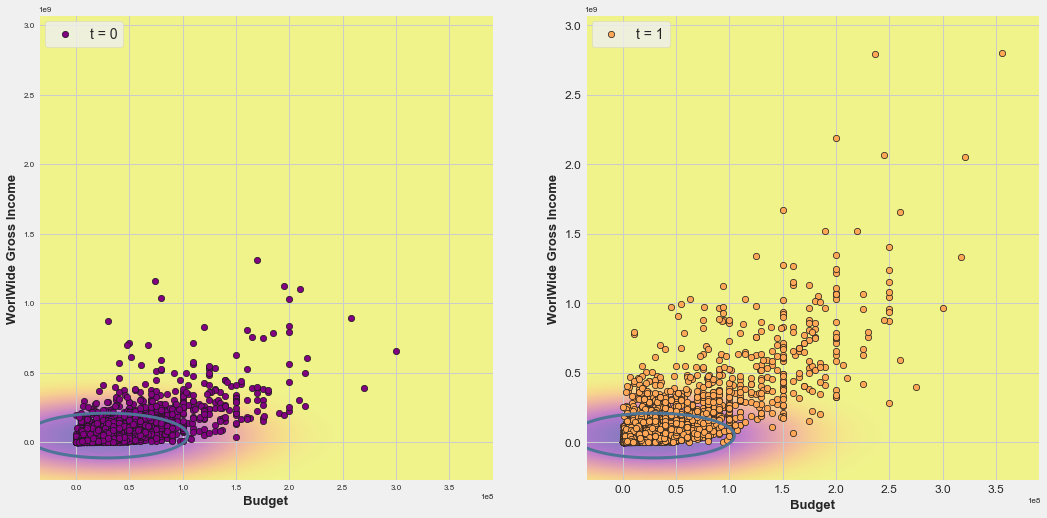

In [682]:
X_s, t_s=X_small, t_small
fig = plt.figure(figsize=(16,8))
fig.add_subplot(1,2,1)
ax1 = fig.gca()
ax1.imshow(p1, origin='lower', extent=(min1, max1, min2, max2),cmap=plt.get_cmap('plasma'), alpha=0.50, aspect='auto')
plt.contour(u, v, p1, [0.5], linewidths=3, colors=colors[8])
X0 = np.compress(t_s==0, X_s, axis=0)
X1 = np.compress(t_s==1, X_s, axis=0)
ax1.scatter(X0[:, 0], X0[:, 1], s=40, c='purple', edgecolor='k', marker= 'o', lw=.7, cmap=plt.get_cmap('plasma'), label='t = 0')
ax1.legend(loc='upper left', fontsize=14)
plt.xlabel('Budget', fontsize=13)
plt.ylabel('WorlWide Gross Income', fontsize=13)
fig.add_subplot(1,2,2)
ax2 = fig.gca()
ax2.imshow(p1, origin='lower', extent=(min1, max1, min2, max2),cmap=plt.get_cmap('plasma'), alpha=0.50, aspect='auto')
plt.contour(u, v, p1, [0.5], linewidths=3, colors=colors[8])
ax2.scatter(X1[:, 0], X1[:, 1], s=40, c=colors[0], edgecolor='k', marker= 'o', lw=.7, cmap=plt.get_cmap('plasma'), label='t = 1')
ax2.legend(loc='upper left', fontsize=14)
plt.xlabel('Budget', fontsize=13)
plt.ylabel('WorlWide Gross Income', fontsize=13)
plt.xlim(min1, max1)
plt.ylim(min2, max2)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.title('Classe 1')
plt.show()

### 2.3.2 Tutte le feature

In [683]:
#scaler=StandardScaler()
scaler=PowerTransformer()
Gau = GaussianNB()
model = Pipeline([('scale', scaler),('clf', Gau)])
model = model.fit(X_train,t_train)

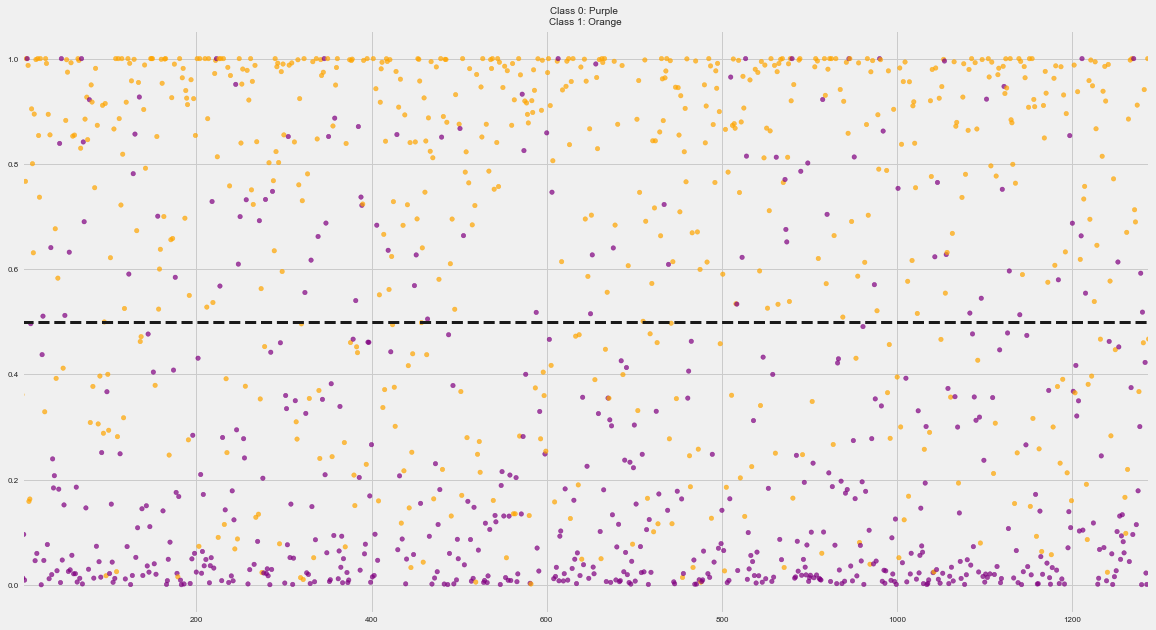

In [684]:
y_prob = model.predict_proba(X_test)
c = list(pd.DataFrame(t_test)[0].apply(lambda x: 'Orange' if x==1 else 'Purple'))
plt.figure(figsize=(18,10))
#plt.plot(range(y_prob.shape[0]),pd.DataFrame(t_test), color='Red', ms = 4, marker='.', linestyle=' ', alpha=.7)

plt.scatter(range(y_prob.shape[0]), y_prob[:,1], color=c, s = 20, marker='o', alpha=.7)
plt.axhline(y=.5, xmin=0, xmax=1, linewidth=3, linestyle='dashed', color='k')
plt.xlim(1,y_prob.shape[0])
plt.title('Class 0: Purple \nClass 1: Orange');
plt.show()

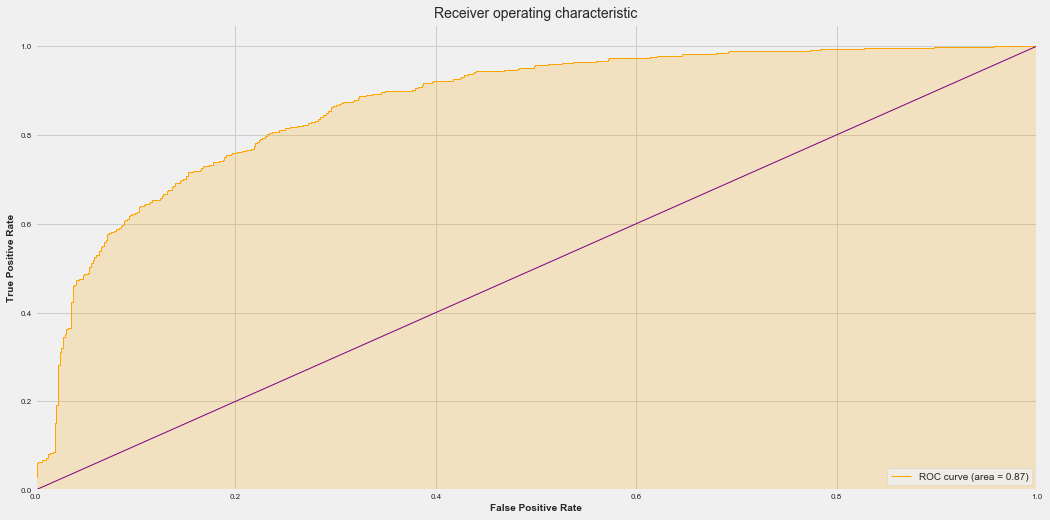

In [685]:
fpr, tpr, thresholds = roc_curve(pd.DataFrame(t_test)[0], model.predict_proba(X_test)[:,1], pos_label=1)

plt.figure(figsize=(16,8))
plt.plot(fpr, tpr, color='Orange', linewidth=1,label='ROC curve (area = %0.2f)' %  auc(fpr, tpr))
plt.fill_between(fpr, 0, tpr, alpha=0.2, color='Orange')
plt.plot([0, 1], [0, 1], color='Purple', linewidth=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel(r'True Positive Rate')
plt.xlabel(r'False Positive Rate')
plt.title('Receiver operating characteristic', fontsize=14)
plt.legend(loc="lower right")
plt.show()

In [686]:
print('AUC = {0:0.4f}'.format(auc(fpr, tpr)))


AUC = 0.8680


In [687]:
optimal_idx = np.argmax(tpr-fpr)
optimal_threshold = thresholds[optimal_idx]
print('Optimal threshold: {0:3.3f}'.format(optimal_threshold))


Optimal threshold: 0.360


In [688]:
p_train = model.predict(X_train)
p_test = model.predict(X_test)
cm_train = confusion_matrix(t_train,p_train)
cm_test = confusion_matrix(t_test,p_test)

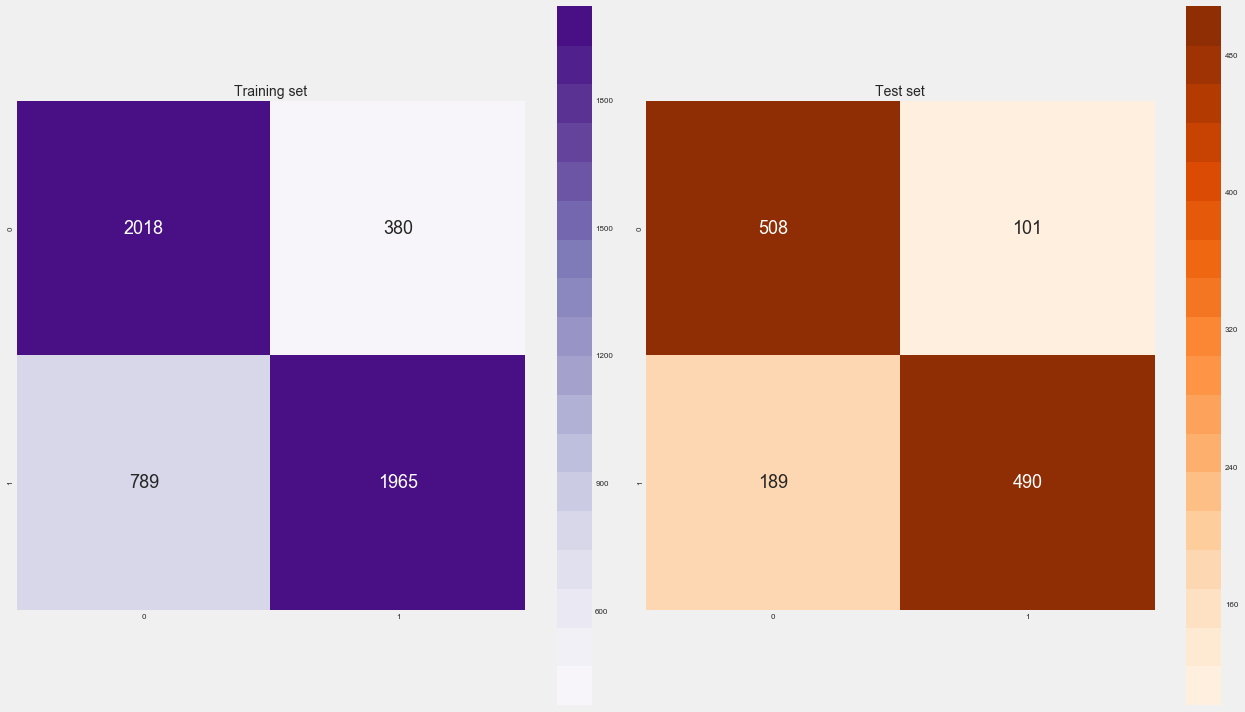

In [689]:
plt.figure(figsize=(18,10))
plt.subplot(1,2,1)
hm = sns.heatmap(cm_train,cbar=True,annot=True,square=True,fmt='d',annot_kws={'size': 18},cmap = sns.color_palette("Purples", 18))
plt.title('Training set', fontsize=14)
plt.subplot(1,2,2)
hm = sns.heatmap(cm_test,cbar=True,annot=True,square=True,fmt='d',annot_kws={'size': 18},cmap = sns.color_palette("Oranges", 18))
plt.title('Test set', fontsize=14)
plt.tight_layout()
plt.show()

In [690]:
print('TRAINING SET')
m = precision_recall_fscore_support(p_train,t_train)
print('Precision class 0 = {0:5.4f}'.format(m[0][0]))
print('Precision class 1 = {0:5.4f}'.format(m[0][1]))
print('Recall class 0 = {0:5.4f}'.format(m[1][0]))
print('Recall class 1 = {0:5.4f}'.format(m[1][1]))
print('F-score class 0 = {0:5.4f}'.format(m[2][0]))
print('F-score class 1 = {0:5.4f}'.format(m[2][1]))
print('Accuracy = {0:5.4f}'.format(accuracy_score(p_train,t_train)))

TRAINING SET
Precision class 0 = 0.8415
Precision class 1 = 0.7135
Recall class 0 = 0.7189
Recall class 1 = 0.8380
F-score class 0 = 0.7754
F-score class 1 = 0.7707
Accuracy = 0.7731


In [691]:
print('TEST SET')

m = precision_recall_fscore_support(p_test,t_test)
print('Precision class 0 = {0:5.4f}'.format(m[0][0]))
print('Precision class 1 = {0:5.4f}'.format(m[0][1]))
print('Recall class 0 = {0:5.4f}'.format(m[1][0]))
print('Recall class 1 = {0:5.4f}'.format(m[1][1]))
print('F-score class 0 = {0:5.4f}'.format(m[2][0]))
print('F-score class 1 = {0:5.4f}'.format(m[2][1]))
print('Accuracy = {0:5.4f}'.format(accuracy_score(p_test,t_test)))

TEST SET
Precision class 0 = 0.8342
Precision class 1 = 0.7216
Recall class 0 = 0.7288
Recall class 1 = 0.8291
F-score class 0 = 0.7779
F-score class 1 = 0.7717
Accuracy = 0.7748


In [692]:
pred_proba = pd.DataFrame(model.predict_proba(X_test)[:,1])
p = pred_proba.applymap(lambda x: 1 if x>optimal_threshold else 0)
cm = confusion_matrix(t_test,p)


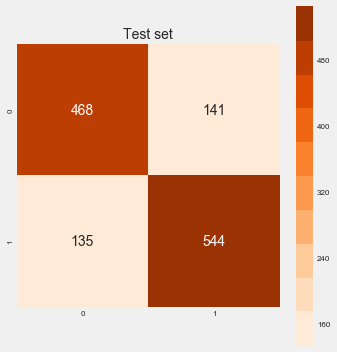

In [693]:
plt.figure(figsize=(5,5))
hm = sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='d',annot_kws={'size': 14},
                 cmap = sns.color_palette("Oranges", 10))
plt.title('Test set', fontsize=14)
plt.tight_layout()
plt.show()

In [694]:
m = precision_recall_fscore_support(p,t_test)
print('Precision class 0 = {0:5.4f}'.format(m[0][0]))
print('Precision class 1 = {0:5.4f}'.format(m[0][1]))
print('Recall class 0 = {0:5.4f}'.format(m[1][0]))
print('Recall class 1 = {0:5.4f}'.format(m[1][1]))
print('F-score class 0 = {0:5.4f}'.format(m[2][0]))
print('F-score class 1 = {0:5.4f}'.format(m[2][1]))
print('Accuracy = {0:5.4f}'.format(accuracy_score(p,t_test)))

Precision class 0 = 0.7685
Precision class 1 = 0.8012
Recall class 0 = 0.7761
Recall class 1 = 0.7942
F-score class 0 = 0.7723
F-score class 1 = 0.7977
Accuracy = 0.7857


### 2.3.3 Cross Validation

In [912]:
X_k_fold=dataset.drop(columns=['target'])
Y_k_fold=dataset['target']
X_k_fold,Y_k_fold=X_k_fold.values,Y_k_fold.values
kf= KFold(n_splits=5)
SCORES=[]
ACCURACY=[]
for train_index, test_index in kf.split(X_k_fold):
    X_k_train, X_k_test = X_k_fold[train_index], X_k_fold[test_index]
    t_k_train, t_k_test = Y_k_fold[train_index], Y_k_fold[test_index]

    scaler=StandardScaler()
    Gau = GaussianNB()
    model = Pipeline([('scale', scaler),('clf', Gau)])
    model = model.fit(X_k_train,t_k_train)
    m = precision_recall_fscore_support(model.predict(X_k_test),t_k_test)
    ACCURACY.append(accuracy_score(model.predict(X_k_test),t_k_test))
    SCORES.append(m)
P_0=[]
P_1=[]
F_S_0=[]
F_S_1=[]
R_0=[]
R_1=[]


for i in range(len(SCORES)):
    P_0.append(SCORES[i][0][0])
    P_1.append(SCORES[i][0][1])
    R_0.append(SCORES[i][1][0])
    R_1.append(SCORES[i][1][1])
    F_S_0.append(SCORES[i][2][0])
    F_S_1.append(SCORES[i][2][1])
p_0=np.array(P_0).mean()
p_1=np.array(P_1).mean()
f_s_0=np.array(F_S_0).mean()
f_s_1=np.array(F_S_1).mean()
r_0=np.array(R_0).mean()
r_1=np.array(R_1).mean()
accuracy=np.array(ACCURACY).mean()
PERFORMANCES=[p_0,p_1,f_s_0,f_s_1,r_0,r_1,accuracy]
perf_title=['precisione classe 0','precisione classe 1','f_measure classe 0',
           'f_measure classe 1','recall classe 0','recall classe 1','accuracy']
for i in range(len(PERFORMANCES)):
    print("La %s del modello %s è %f" %(perf_title[i],ALG[3],PERFORMANCES[i]))
TOT_PERFORMANCE.append(PERFORMANCES)

La precisione classe 0 del modello NaiveBayes è 0.866695
La precisione classe 1 del modello NaiveBayes è 0.577874
La f_measure classe 0 del modello NaiveBayes è 0.738044
La f_measure classe 1 del modello NaiveBayes è 0.681851
La recall classe 0 del modello NaiveBayes è 0.642727
La recall classe 1 del modello NaiveBayes è 0.831663
La accuracy del modello NaiveBayes è 0.712733


## 2.4 GDA classifier 

Se invece di porre l'ipotesi sulla distribuzione $p(C_k|x)$, si ipotizza la distribuzione della verosimiglianza $p(x|C_k)$ si ottengono i __modelli generativi__. 


Porre l'ipotesi su $p(x|C_k)$ può essere particolarmente rischioso laddove i dati non si prestano ad essere descritti utilizzando la distribuzione scelta. Tuttavia la praticità dell'implementazione numerica dell'algoritmo permette di utilizzare le sue performance come baseline per metodi più potenti.  A partire da un nuovo punto $x_{new}$, note le distribuzioni (ottimizzate)  $p(X|C_1)$ e  $p(X|C_0)$ e ipotizzando (per esempio per massima verosimiglianza) di conoscere $p(C_1)$ e $p(C_0)$, tramite la formula di Bayes, è immediato associare $x_{new}$ ad una categoria. 


Nel nostro caso il modello generativo utilizzato è la __Gaussian Discriminant Analysis (GDA)__ che si basa sull'ipotesi che $p(X|C_1)$ e $p(X|C_0)$ siano entrambe gaussiane:
\begin{equation}
p(x|C_k)=\frac{1}{(2\pi)^{\frac{d}{2}}|{\Sigma_k}|}\exp({-\frac{1}{2}(x-\mu_k)^T\Sigma_k^{-1}(x-\mu_k)})
\end{equation}
Nel caso di classificazione binaria si ha:

\begin{equation}
\begin{split}
&
p(C_1|x)=\frac{p(x|C_1)p(C_1)}{p(x|C_1)p(C_1)+p(x|C_0)p(C_0)}
\\
\\
&
a=\ln{\frac{p(x|C_1)p(C_1)}{p(x|C_0)p(C_0)}}
\\
\\
&
p(C_1|x)=\sigma(a)
\end{split}
\end{equation}

Dunque si ha, nella nostra ipotesi:
\begin{equation}
a(x)=((x-\mu_2)^T \Sigma_2^{-1}(x-\mu_2)-(x-\mu_1)^T\Sigma_1^{-1}(x-\mu_1))+\log{\frac{|\Sigma_2|}{|\Sigma_1|}}+
log{\frac{p(C_1)}{p(C_2)}}
\end{equation}


Per determinare l'iperpiano di separazione, è necessario imporre $p(C_1|x)=p(C_2|x)$ e cioè $\sigma(a(x))=\sigma(-a(x))$, dunque $a(x)=0$. 

Nel caso in cui le matrici di covarianza $\Sigma_k$ siano diverse si ottiene un __modello generativo quadratico__ (QDA). Nel caso in cui siano uguali, invece, si ha un __modello generativo lineare__ (LDA).

Come nel caso dei GLM, i parametri della distribuzione $p(t|x,\mu_1,\mu_2,\Sigma_1,\Sigma_2,p(C_1))$ vengono stimati utilizzando il criterio di log massima verosimiglianza con la distribuzione di Bernoulli:
\begin{equation}
l(\mu_1,\mu_2,\Sigma_1,\Sigma_2,p(C_1)|X,T)=\sum_{i=1}^{N}(t_i log(p(C_1))+ t_i log(N(x_i|\mu_1,\Sigma_1)))+ \sum_{i=1}^{N}((1-t_i)log(1-p(C_1))+(1-t_i)log(N(x_i|\mu_2,\Sigma_2)))
\end{equation}

Effettuando le derivate rispetto ai parametri della distribuzione si ottengono i seguenti stimatori:
\begin{equation}
\mu_1=\frac{1}{N_1}\sum_{x_i\in C_1}x_i
\end{equation}
\begin{equation}
\mu_2=\frac{1}{N_2}\sum_{x_i\in C_2}x_i
\end{equation}
\begin{equation}
\Sigma_1=\frac{1}{N_1}\sum_{x_i\in C_1}(x_i-\mu_1)(x_i-\mu_1)^T
\end{equation}
\begin{equation}
\Sigma_2=\frac{1}{N_2}\sum_{x_i\in C_2}(x_i-\mu_2)(x_i-\mu_2)^T
\end{equation}
\begin{equation}
p(C_1)=1-p(C_2)=\frac{N_1}{N}
\end{equation}

Si considerino le equazioni di sopra valide nel caso __QDA__. 

Nel caso __LDA__ la stima per la matrice di covarianza risulta:
\begin{equation}
\Sigma=\frac{N_1}{N} \Sigma_1+\frac{N_2}{N} \Sigma_2
\end{equation}

Come si nota, in entrambi i casi i migliori stimatori si ottengono mediante formule chiuse. Il metodo sarà dunque rapido in quanto non necessita di una fase di training nè di algoritmi di ottimizzazione.

### 2.4.1 Quadratic Discriminant Analysis (QDA)

#### 2.4.1.1 Due feature

In [631]:

scaler=StandardScaler()
QDA = QuadraticDiscriminantAnalysis(store_covariance=True)

model = Pipeline([('scale', scaler),('clf', QDA)])
model = model.fit(X_train_small,t_train_small)

In [632]:
delta1=max(X_small[:,0])-min(X_small[:,0])
delta2=max(X_small[:,1])-min(X_small[:,1])
min1=min(X_small[:,0])-delta1/10
max1=max(X_small[:,0])+delta1/10
min2=min(X_small[:,1])-delta2/10
max2=max(X_small[:,1])+delta2/10
u = np.linspace(min1, max1, 1000)
v = np.linspace(min2, max2, 1000)
u, v = np.meshgrid(u, v)
z = model.predict(np.c_[u.ravel(), v.ravel()])
p = model.predict_proba(np.c_[u.ravel(), v.ravel()])
z = z.reshape(u.shape)
p0 = p[:,0].reshape(u.shape)
p1 = p[:,1].reshape(u.shape)

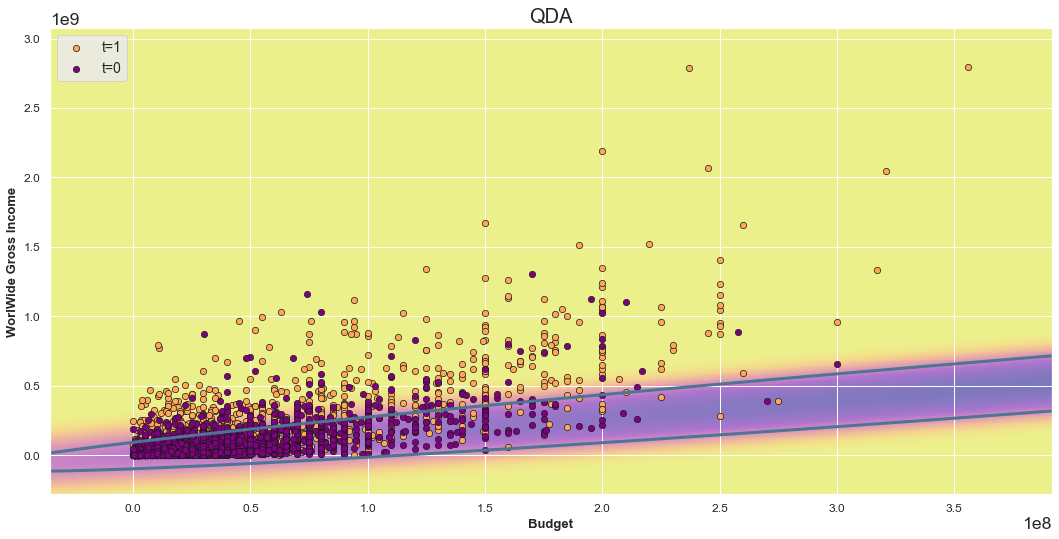

In [633]:
X_s, t_s=X_small, t_small
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
ax.imshow(p1, origin='lower', extent=(min1, max1, min2, max2),cmap=plt.get_cmap('plasma'), alpha=0.50, aspect='auto')
plt.contour(u, v, p1, [0.5], linewidths=3, colors=colors[8])
X0 = np.compress(t_s==0, X_s, axis=0)
X1 = np.compress(t_s==1, X_s, axis=0)
ax.scatter(X1[:, 0], X1[:, 1], s=40, c=colors[0], edgecolor='k', marker= 'o', lw=.7, cmap=plt.get_cmap('plasma'), label='t=1')

ax.scatter(X0[:, 0], X0[:, 1], s=40, c='purple', edgecolor='k', marker= 'o', lw=.7, cmap=plt.get_cmap('plasma'), label='t=0')
ax.legend(loc='upper left', fontsize=14)
plt.xlabel('Budget', fontsize=13)
plt.ylabel('WorlWide Gross Income', fontsize=13)
plt.xlim(min1, max1)
plt.ylim(min2, max2)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('QDA',fontsize=20)
plt.show()

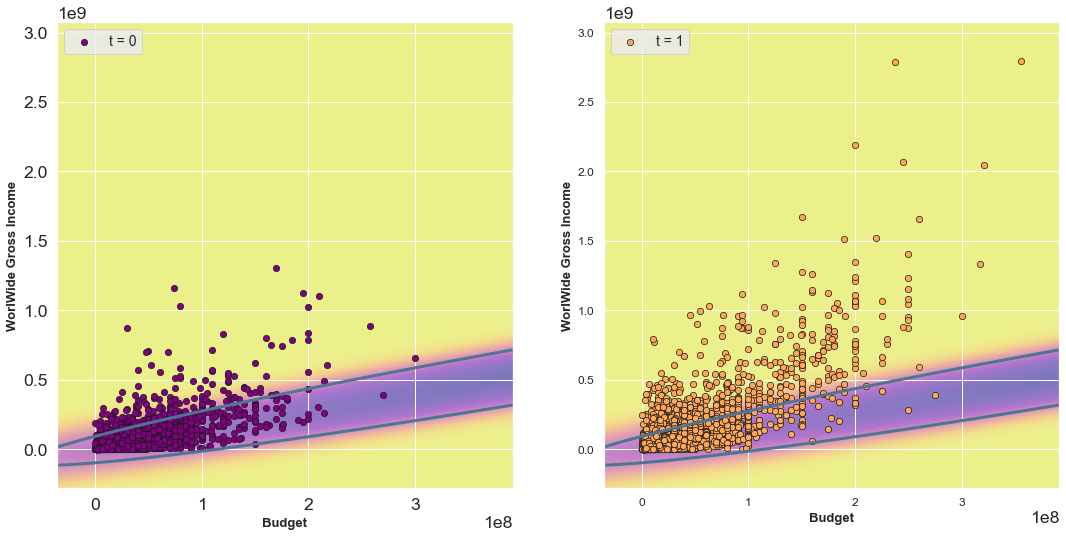

In [634]:
X_s, t_s=X_small, t_small
fig = plt.figure(figsize=(16,8))
fig.add_subplot(1,2,1)
ax1 = fig.gca()
ax1.imshow(p1, origin='lower', extent=(min1, max1, min2, max2),cmap=plt.get_cmap('plasma'), alpha=0.50, aspect='auto')
plt.contour(u, v, p1, [0.5], linewidths=3, colors=colors[8])
X0 = np.compress(t_s==0, X_s, axis=0)
X1 = np.compress(t_s==1, X_s, axis=0)
ax1.scatter(X0[:, 0], X0[:, 1], s=40, c='purple', edgecolor='k', marker= 'o', lw=.7, cmap=plt.get_cmap('plasma'), label='t = 0')
ax1.legend(loc='upper left', fontsize=14)
plt.xlabel('Budget', fontsize=13)
plt.ylabel('WorlWide Gross Income', fontsize=13)
fig.add_subplot(1,2,2)
ax2 = fig.gca()
ax2.imshow(p1, origin='lower', extent=(min1, max1, min2, max2),cmap=plt.get_cmap('plasma'), alpha=0.50, aspect='auto')
plt.contour(u, v, p1, [0.5], linewidths=3, colors=colors[8])
ax2.scatter(X1[:, 0], X1[:, 1], s=40, c=colors[0], edgecolor='k', marker= 'o', lw=.7, cmap=plt.get_cmap('plasma'), label='t = 1')
ax2.legend(loc='upper left', fontsize=14)
plt.xlabel('Budget', fontsize=13)
plt.ylabel('WorlWide Gross Income', fontsize=13)
plt.xlim(min1, max1)
plt.ylim(min2, max2)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.title('Classe 1')
plt.show()

In [636]:
n0 = len(dataset[dataset.target==0])
#n numero totale di elementi del dataset
nfeatures = len(X[0])

Calcola le medie delle due distribuzioni.

In [637]:
mu0=np.array(np.mean(dataset[dataset.target==0][['budget','worlwide_gross_income']]))
mu1=np.array(np.mean(dataset[dataset.target==1][['budget','worlwide_gross_income']]))

Consideriamo matrici di covarianza diverse per le distribuzioni delle due classi. Le stimiamo a partire dagli elementi delle due classi.

In [638]:
# considera gli elementi delle due classi centrati intorno alle rispettive medie
X0=np.array(dataset[dataset.target==0][['budget','worlwide_gross_income']])-mu0
X1=np.array(dataset[dataset.target==1][['budget','worlwide_gross_income']])-mu1

# calcola le matrici di covarianza per le distribuzioni di C0 e C1
sigma0=np.cov(X0.T)
sigma1=np.cov(X1.T)

Stimiamo la probabilità a priori della classe C0 come rapporto tra il numero di elementi del dataset appartenenti alla classe e la dimensione totale del dataset.

In [639]:
prior=float(n0)/n

Definiamo la griglia 100x100 da utilizzare per la visualizzazione delle varie distribuzioni.

In [640]:
# insieme delle ascisse dei punti
u = np.linspace(min(X_small[:,0]), max(X_small[:,0]), 100)
# insieme delle ordinate dei punti
v = np.linspace(min(X_small[:,1]), max(X_small[:,1]), 100)
# deriva i punti della griglia: il punto in posizione i,j nella griglia ha ascissa U(i,j) e ordinata V(i,j)
U, V = np.meshgrid(u, v)

Calcola sui punti della griglia le probabilità delle classi $p(x|C_0), p(x|C_1)$ e le probabilità a posteriori delle classi $p(C_0|x), p(C_1|x)$

In [641]:
# funzioni che calcolano le probabilità secondo le distribuzioni delle due classi
vf0=np.vectorize(lambda x,y:st.multivariate_normal.pdf([x,y],mu0,sigma0))
vf1=np.vectorize(lambda x,y:st.multivariate_normal.pdf([x,y],mu1,sigma1))

# calcola le probabilità delle due distribuzioni sulla griglia
p0=vf0(U,V)
p1=vf1(U,V)


Visualizzazione della distribuzione di $p(x|C_0)$.

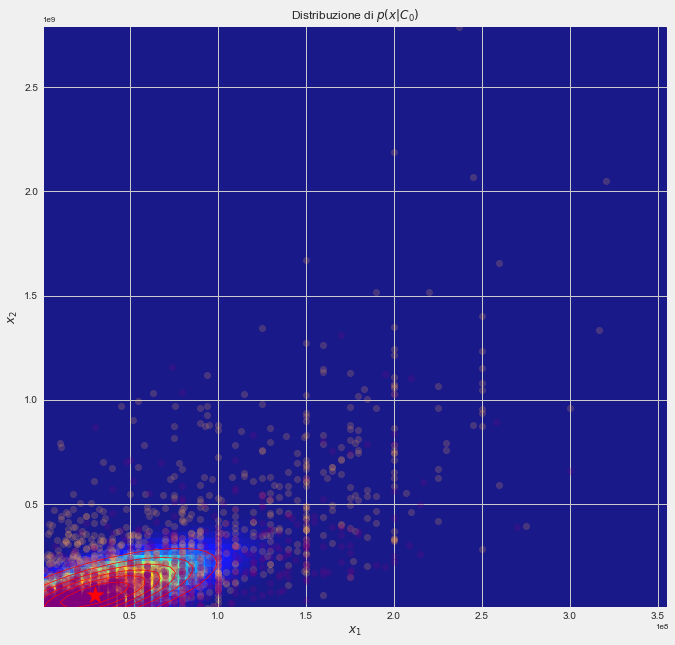

In [646]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
# inserisce una rappresentazione della probabilità della classe C0 sotto forma di heatmap

# rappresenta i punti del dataset

imshow_handle = plt.imshow(p0, origin='lower', extent=(min(X_small[:,0])-2, max(X_small[:,0])-2, min(X_small[:,1])-2, max(X_small[:,1])-2), aspect='auto',alpha=.9)
plt.contour(U, V, p0, linewidths=[.7], colors='red')
ax.scatter(dataset[dataset.target==1].budget, dataset[dataset.target==1].worlwide_gross_income, s=40,c=colors[0], alpha=.2)

ax.scatter(dataset[dataset.target==0].budget, dataset[dataset.target==0].worlwide_gross_income, s=40, c='purple', alpha=.2)
# rappresenta la media della distribuzione
ax.scatter(mu0[0], mu0[1], s=300,c='red', marker='*', alpha=1.)
# inserisce titoli, etc.
plt.xlabel('$x_1$', fontsize=12)
plt.ylabel('$x_2$', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(min(X_small[:,0]), max(X_small[:,0]))
plt.ylim(min(X_small[:,1]), max(X_small[:,1])-2)
plt.title('Distribuzione di $p(x|C_0)$', fontsize=12)
plt.show()

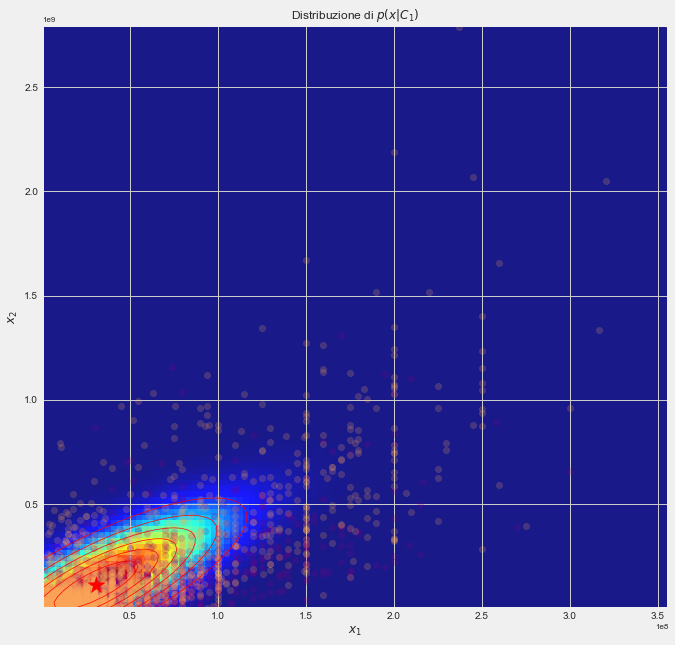

In [647]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
# inserisce una rappresentazione della probabilità della classe C0 sotto forma di heatmap

# rappresenta i punti del dataset

imshow_handle = plt.imshow(p1, origin='lower', extent=(min(X_small[:,0])-2, max(X_small[:,0])-2, min(X_small[:,1])-2, max(X_small[:,1])-2), aspect='auto',alpha=.9)
plt.contour(U, V, p1, linewidths=[.7], colors='red')
ax.scatter(dataset[dataset.target==0].budget, dataset[dataset.target==0].worlwide_gross_income, s=40, c='purple', alpha=.2)
ax.scatter(dataset[dataset.target==1].budget, dataset[dataset.target==1].worlwide_gross_income, s=40,c=colors[0], alpha=.2)
# rappresenta la media della distribuzione
ax.scatter(mu1[0], mu1[1], s=300,c='red', marker='*', alpha=1.)
# inserisce titoli, etc.
plt.xlabel('$x_1$', fontsize=12)
plt.ylabel('$x_2$', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(min(X_small[:,0]), max(X_small[:,0]))
plt.ylim(min(X_small[:,1]), max(X_small[:,1])-2)
plt.title('Distribuzione di $p(x|C_1)$', fontsize=12)
plt.show()

In [648]:
# calcola il rapporto tra le likelihood delle classi per tutti i punti della griglia
z=p0/p1   

# calcola il rapporto tra le probabilità a posteriori delle classi per tutti i punti della griglia
zbayes=p0*prior/(p1*(1-prior))  

# calcola evidenza del dataset
ev = p0*prior+p1*(1-prior)

# calcola le probabilità a posteriori di C0 e di C1
pp0 = p0*prior/ev
pp1 = p1*(1-prior)/ev

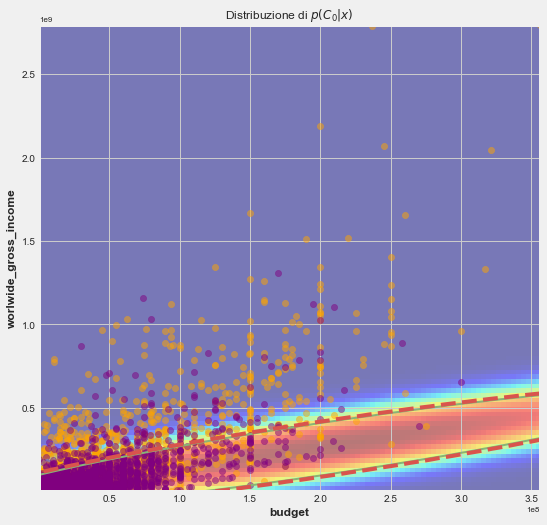

In [649]:
x1='budget'
x2='worlwide_gross_income'
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
imshow_handle = plt.imshow(pp0, origin='lower', extent=(min(X_small[:,0]), max(X_small[:,0]), min(X_small[:,1]), max(X_small[:,1])), aspect='auto',alpha=.5)
ax.scatter(dataset[dataset.target==1][x1], dataset[dataset.target==1][x2], s=40, c='orange', alpha=.5)

ax.scatter(dataset[dataset.target==0][x1], dataset[dataset.target==0][x2], s=40, c='purple', alpha=.5)
plt.contour(U, V, zbayes, [1.0], colors=[colors[3]],linewidths=[2])
plt.contour(U, V, z, [1.0], colors=[colors[2]],linewidths=[4], linestyles='dashed')
plt.xlabel('budget', fontsize=12)
plt.ylabel('worlwide_gross_income', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(u.min(), u.max())
plt.ylim(v.min(), v.max())
plt.title("Distribuzione di $p(C_0|x)$", fontsize=12)
plt.show()

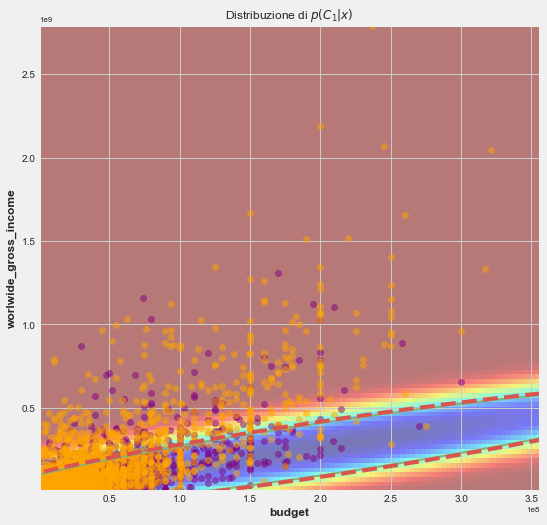

In [650]:
x1='budget'
x2='worlwide_gross_income'
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
imshow_handle = plt.imshow(pp1, origin='lower', extent=(min(X_small[:,0]), max(X_small[:,0]), min(X_small[:,1]), max(X_small[:,1])), aspect='auto',alpha=.5)
ax.scatter(dataset[dataset.target==0][x1], dataset[dataset.target==0][x2], s=40, c='purple', alpha=.5)
ax.scatter(dataset[dataset.target==1][x1], dataset[dataset.target==1][x2], s=40, c='orange', alpha=.5)
plt.contour(U, V, zbayes, [1.0], colors=[colors[3]],linewidths=[2])
plt.contour(U, V, z, [1.0], colors=[colors[2]],linewidths=[4], linestyles='dashed')
plt.xlabel('budget', fontsize=12)
plt.ylabel('worlwide_gross_income', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(u.min(), u.max())
plt.ylim(v.min(), v.max())
plt.title("Distribuzione di $p(C_1|x)$", fontsize=12)
plt.show()

#### 2.4.1.2 Tutte le feature

In [651]:
scaler=PowerTransformer()
#scaler=StandardScaler()
#scaler=PolynomialFeatures()
QDA = QuadraticDiscriminantAnalysis(store_covariance=True)

model = Pipeline([('scale', scaler),('clf', QDA)])
model = model.fit(X_train,t_train)

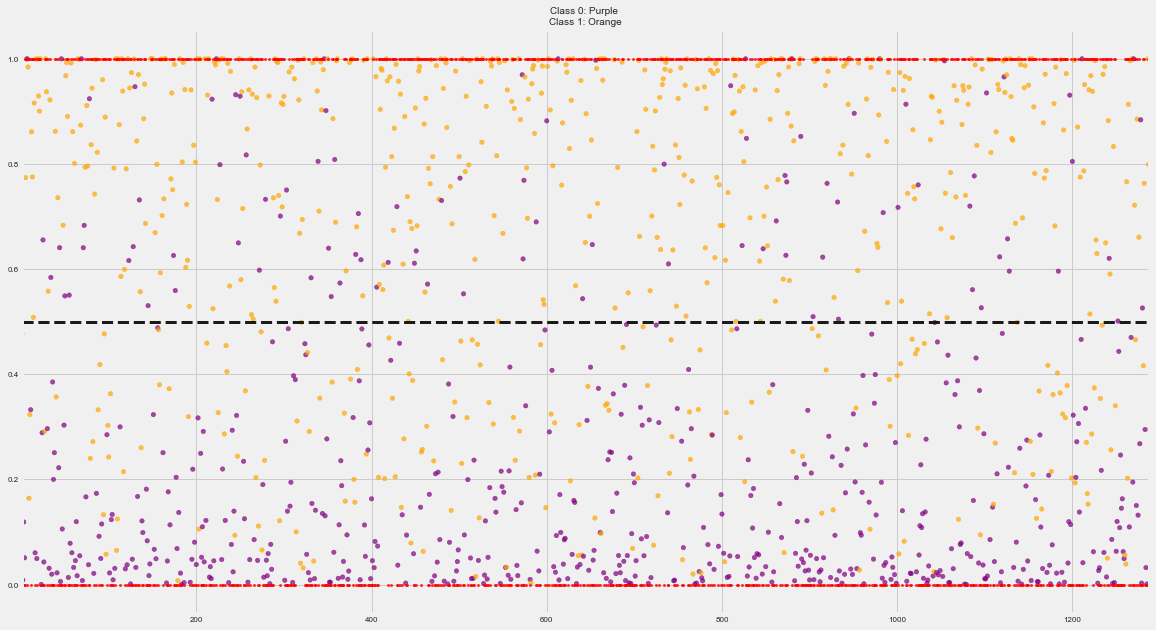

In [652]:
y_prob = model.predict_proba(X_test)
c = list(pd.DataFrame(t_test)[0].apply(lambda x: 'Orange' if x==1 else 'Purple'))
plt.figure(figsize=(18,10))
plt.plot(range(y_prob.shape[0]),pd.DataFrame(t_test), color='Red', ms = 4, marker='.', linestyle=' ', alpha=.7)

plt.scatter(range(y_prob.shape[0]), y_prob[:,1], color=c, s = 20, marker='o', alpha=.7)
plt.axhline(y=.5, xmin=0, xmax=1, linewidth=3, linestyle='dashed', color='k')
plt.xlim(1,y_prob.shape[0])
plt.title('Class 0: Purple \nClass 1: Orange');
plt.show()

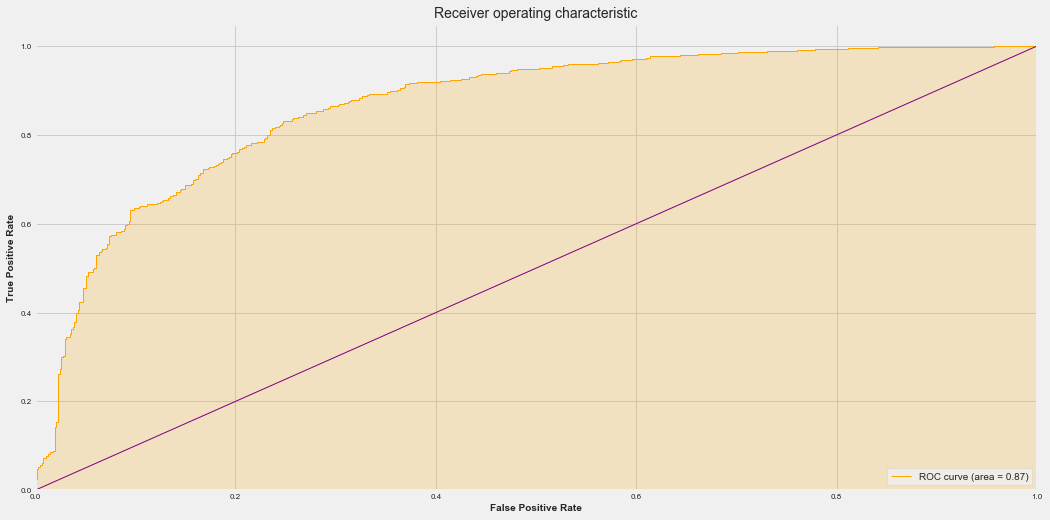

In [653]:
fpr, tpr, thresholds = roc_curve(pd.DataFrame(t_test)[0], model.predict_proba(X_test)[:,1], pos_label=1)

plt.figure(figsize=(16,8))
plt.plot(fpr, tpr, color='Orange', linewidth=1,label='ROC curve (area = %0.2f)' %  auc(fpr, tpr))
plt.fill_between(fpr, 0, tpr, alpha=0.2, color='Orange')
plt.plot([0, 1], [0, 1], color='Purple', linewidth=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel(r'True Positive Rate')
plt.xlabel(r'False Positive Rate')
plt.title('Receiver operating characteristic', fontsize=14)
plt.legend(loc="lower right")
plt.show()

In [654]:
print('AUC = {0:0.4f}'.format(auc(fpr, tpr)))


AUC = 0.8657


In [655]:
optimal_idx = np.argmax(tpr-fpr)
optimal_threshold = thresholds[optimal_idx]
print('Optimal threshold: {0:3.3f}'.format(optimal_threshold))


Optimal threshold: 0.324


In [656]:
p_train = model.predict(X_train)
p_test = model.predict(X_test)
cm_train = confusion_matrix(t_train,p_train)
cm_test = confusion_matrix(t_test,p_test)

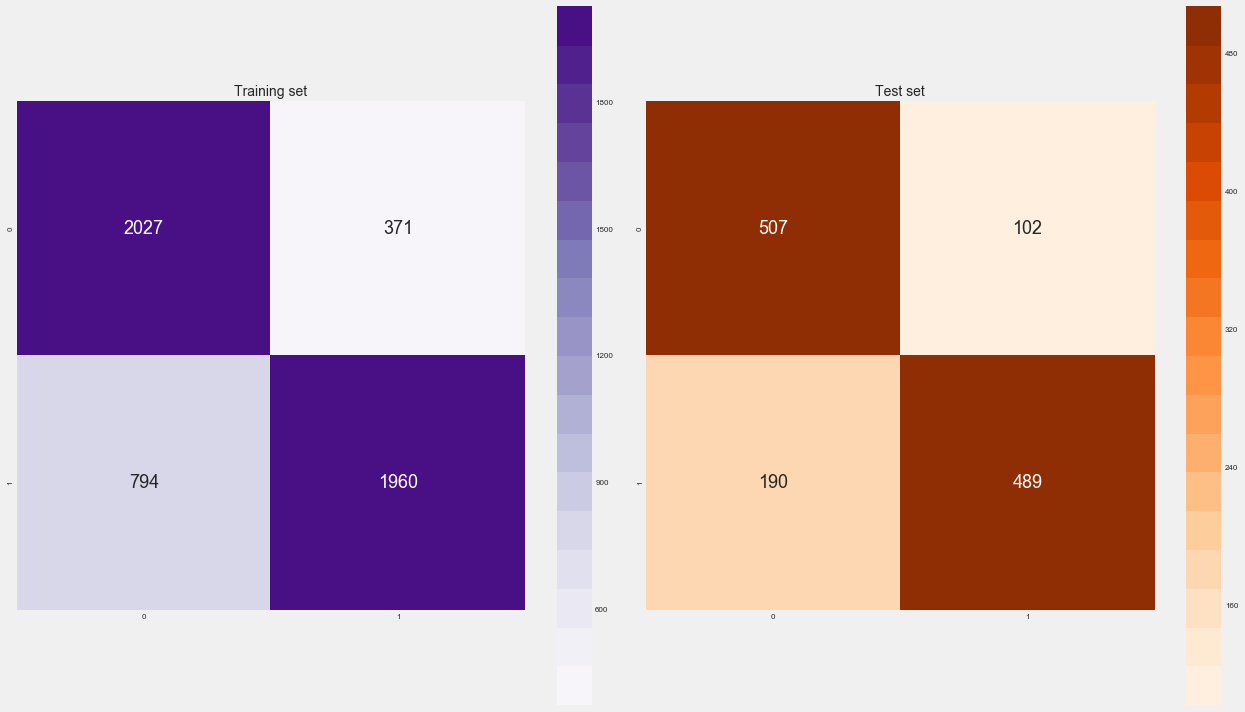

In [657]:
plt.figure(figsize=(18,10))
plt.subplot(1,2,1)
hm = sns.heatmap(cm_train,cbar=True,annot=True,square=True,fmt='d',annot_kws={'size': 18},cmap = sns.color_palette("Purples", 18))
plt.title('Training set', fontsize=14)
plt.subplot(1,2,2)
hm = sns.heatmap(cm_test,cbar=True,annot=True,square=True,fmt='d',annot_kws={'size': 18},cmap = sns.color_palette("Oranges", 18))
plt.title('Test set', fontsize=14)
plt.tight_layout()
plt.show()

In [658]:
print('TRAINING SET')
m = precision_recall_fscore_support(p_train,t_train)
print('Precision class 0 = {0:5.4f}'.format(m[0][0]))
print('Precision class 1 = {0:5.4f}'.format(m[0][1]))
print('Recall class 0 = {0:5.4f}'.format(m[1][0]))
print('Recall class 1 = {0:5.4f}'.format(m[1][1]))
print('F-score class 0 = {0:5.4f}'.format(m[2][0]))
print('F-score class 1 = {0:5.4f}'.format(m[2][1]))
print('Accuracy = {0:5.4f}'.format(accuracy_score(p_train,t_train)))

TRAINING SET
Precision class 0 = 0.8453
Precision class 1 = 0.7117
Recall class 0 = 0.7185
Recall class 1 = 0.8408
F-score class 0 = 0.7768
F-score class 1 = 0.7709
Accuracy = 0.7739


In [659]:
print('TEST SET')

m = precision_recall_fscore_support(p_test,t_test)
print('Precision class 0 = {0:5.4f}'.format(m[0][0]))
print('Precision class 1 = {0:5.4f}'.format(m[0][1]))
print('Recall class 0 = {0:5.4f}'.format(m[1][0]))
print('Recall class 1 = {0:5.4f}'.format(m[1][1]))
print('F-score class 0 = {0:5.4f}'.format(m[2][0]))
print('F-score class 1 = {0:5.4f}'.format(m[2][1]))
print('Accuracy = {0:5.4f}'.format(accuracy_score(p_test,t_test)))

TEST SET
Precision class 0 = 0.8325
Precision class 1 = 0.7202
Recall class 0 = 0.7274
Recall class 1 = 0.8274
F-score class 0 = 0.7764
F-score class 1 = 0.7701
Accuracy = 0.7733


In [660]:
pred_proba = pd.DataFrame(model.predict_proba(X_test)[:,1])
p = pred_proba.applymap(lambda x: 1 if x>optimal_threshold else 0)
cm = confusion_matrix(t_test,p)


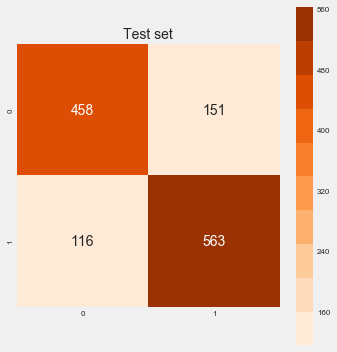

In [661]:
plt.figure(figsize=(5,5))
hm = sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='d',annot_kws={'size': 14},
                 cmap = sns.color_palette("Oranges", 10))
plt.title('Test set', fontsize=14)
plt.tight_layout()
plt.show()

In [662]:
m = precision_recall_fscore_support(p,t_test)
print('Precision class 0 = {0:5.4f}'.format(m[0][0]))
print('Precision class 1 = {0:5.4f}'.format(m[0][1]))
print('Recall class 0 = {0:5.4f}'.format(m[1][0]))
print('Recall class 1 = {0:5.4f}'.format(m[1][1]))
print('F-score class 0 = {0:5.4f}'.format(m[2][0]))
print('F-score class 1 = {0:5.4f}'.format(m[2][1]))
print('Accuracy = {0:5.4f}'.format(accuracy_score(p,t_test)))

Precision class 0 = 0.7521
Precision class 1 = 0.8292
Recall class 0 = 0.7979
Recall class 1 = 0.7885
F-score class 0 = 0.7743
F-score class 1 = 0.8083
Accuracy = 0.7927


####  2.4.1.3 Cross Validation

In [910]:
X_k_fold=dataset.drop(columns=['target'])
Y_k_fold=dataset['target']
X_k_fold,Y_k_fold=X_k_fold.values,Y_k_fold.values
kf= KFold(n_splits=5)
SCORES=[]
ACCURACY=[]
for train_index, test_index in kf.split(X_k_fold):
    X_k_train, X_k_test = X_k_fold[train_index], X_k_fold[test_index]
    t_k_train, t_k_test = Y_k_fold[train_index], Y_k_fold[test_index]
    scaler=PowerTransformer()
    #scaler=StandardScaler()
    #scaler=PolynomialFeatures()
    QDA = QuadraticDiscriminantAnalysis(store_covariance=True)

    model = Pipeline([('scale', scaler),('clf', QDA)])
    model = model.fit(X_k_train,t_k_train)
    m = precision_recall_fscore_support(model.predict(X_k_test),t_k_test)
    ACCURACY.append(accuracy_score(model.predict(X_k_test),t_k_test))
    SCORES.append(m)
P_0=[]
P_1=[]
F_S_0=[]
F_S_1=[]
R_0=[]
R_1=[]


for i in range(len(SCORES)):
    P_0.append(SCORES[i][0][0])
    P_1.append(SCORES[i][0][1])
    R_0.append(SCORES[i][1][0])
    R_1.append(SCORES[i][1][1])
    F_S_0.append(SCORES[i][2][0])
    F_S_1.append(SCORES[i][2][1])
p_0=np.array(P_0).mean()
p_1=np.array(P_1).mean()
f_s_0=np.array(F_S_0).mean()
f_s_1=np.array(F_S_1).mean()
r_0=np.array(R_0).mean()
r_1=np.array(R_1).mean()
accuracy=np.array(ACCURACY).mean()
PERFORMANCES=[p_0,p_1,f_s_0,f_s_1,r_0,r_1,accuracy]
perf_title=['precisione classe 0','precisione classe 1','f_measure classe 0',
           'f_measure classe 1','recall classe 0','recall classe 1','accuracy']
for i in range(len(PERFORMANCES)):
    print("La %s del modello %s è %f" %(perf_title[i],ALG[1],PERFORMANCES[i]))
TOT_PERFORMANCE.append(PERFORMANCES)

La precisione classe 0 del modello QDA è 0.841173
La precisione classe 1 del modello QDA è 0.699612
La f_measure classe 0 del modello QDA è 0.770240
La f_measure classe 1 del modello QDA è 0.760834
La recall classe 0 del modello QDA è 0.710467
La recall classe 1 del modello QDA è 0.833998
La accuracy del modello QDA è 0.765683


### 2.4.2.Linear Discriminant Analysis

#### 2.4.2.1 Due feature

In [843]:
scaler=StandardScaler()
LDA = LinearDiscriminantAnalysis()

model = Pipeline([('scale', scaler),('clf', LDA)])
model = model.fit(X_train_small,t_train_small)

In [844]:
delta1=max(X_small[:,0])-min(X_small[:,0])
delta2=max(X_small[:,1])-min(X_small[:,1])
min1=min(X_small[:,0])-delta1/10
max1=max(X_small[:,0])+delta1/10
min2=min(X_small[:,1])-delta2/10
max2=max(X_small[:,1])+delta2/10
u = np.linspace(min1, max1, 1000)
v = np.linspace(min2, max2, 1000)
u, v = np.meshgrid(u, v)
z = model.predict(np.c_[u.ravel(), v.ravel()])
p = model.predict_proba(np.c_[u.ravel(), v.ravel()])
z = z.reshape(u.shape)
p0 = p[:,0].reshape(u.shape)
p1 = p[:,1].reshape(u.shape)

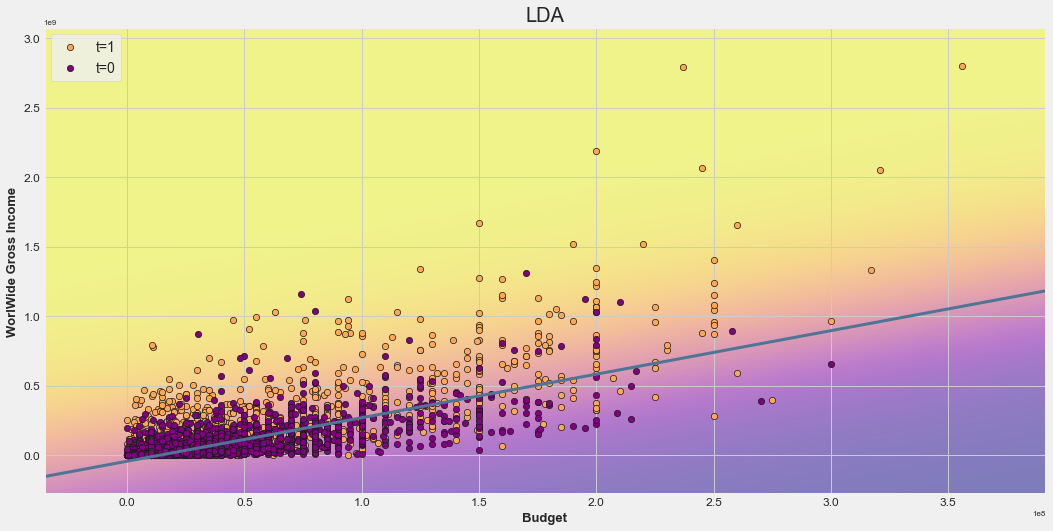

In [845]:
X_s, t_s=X_small, t_small
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
ax.imshow(p1, origin='lower', extent=(min1, max1, min2, max2),cmap=plt.get_cmap('plasma'), alpha=0.50, aspect='auto')
plt.contour(u, v, p1, [0.5], linewidths=3, colors=colors[8])
X0 = np.compress(t_s==0, X_s, axis=0)
X1 = np.compress(t_s==1, X_s, axis=0)
ax.scatter(X1[:, 0], X1[:, 1], s=40, c=colors[0], edgecolor='k', marker= 'o', lw=.7, cmap=plt.get_cmap('plasma'), label='t=1')

ax.scatter(X0[:, 0], X0[:, 1], s=40, c='purple', edgecolor='k', marker= 'o', lw=.7, cmap=plt.get_cmap('plasma'), label='t=0')
ax.legend(loc='upper left', fontsize=14)
plt.xlabel('Budget', fontsize=13)
plt.ylabel('WorlWide Gross Income', fontsize=13)
plt.xlim(min1, max1)
plt.ylim(min2, max2)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('LDA',fontsize=20)
plt.show()

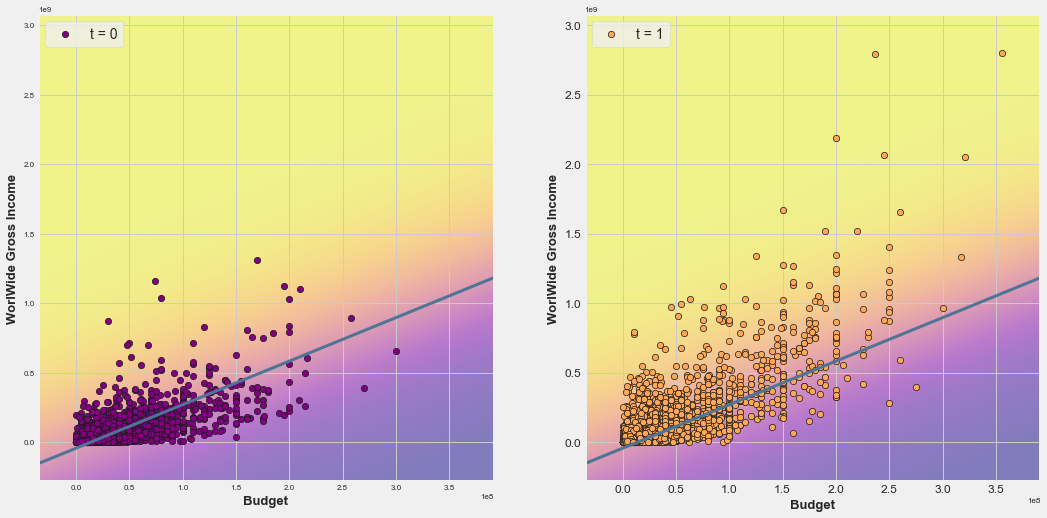

In [846]:
X_s, t_s=X_small, t_small
fig = plt.figure(figsize=(16,8))
fig.add_subplot(1,2,1)
ax1 = fig.gca()
ax1.imshow(p1, origin='lower', extent=(min1, max1, min2, max2),cmap=plt.get_cmap('plasma'), alpha=0.50, aspect='auto')
plt.contour(u, v, p1, [0.5], linewidths=3, colors=colors[8])
X0 = np.compress(t_s==0, X_s, axis=0)
X1 = np.compress(t_s==1, X_s, axis=0)
ax1.scatter(X0[:, 0], X0[:, 1], s=40, c='purple', edgecolor='k', marker= 'o', lw=.7, cmap=plt.get_cmap('plasma'), label='t = 0')
ax1.legend(loc='upper left', fontsize=14)
plt.xlabel('Budget', fontsize=13)
plt.ylabel('WorlWide Gross Income', fontsize=13)
fig.add_subplot(1,2,2)
ax2 = fig.gca()
ax2.imshow(p1, origin='lower', extent=(min1, max1, min2, max2),cmap=plt.get_cmap('plasma'), alpha=0.50, aspect='auto')
plt.contour(u, v, p1, [0.5], linewidths=3, colors=colors[8])
ax2.scatter(X1[:, 0], X1[:, 1], s=40, c=colors[0], edgecolor='k', marker= 'o', lw=.7, cmap=plt.get_cmap('plasma'), label='t = 1')
ax2.legend(loc='upper left', fontsize=14)
plt.xlabel('Budget', fontsize=13)
plt.ylabel('WorlWide Gross Income', fontsize=13)
plt.xlim(min1, max1)
plt.ylim(min2, max2)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.title('Classe 1')
plt.show()

#### 2.4.2.2 Tutte le feature

In [850]:
scaler=PowerTransformer()
#scaler=StandardScaler()
LDA = LinearDiscriminantAnalysis()

model = Pipeline([('scale', scaler),('clf', LDA)])
model = model.fit(X_train,t_train)

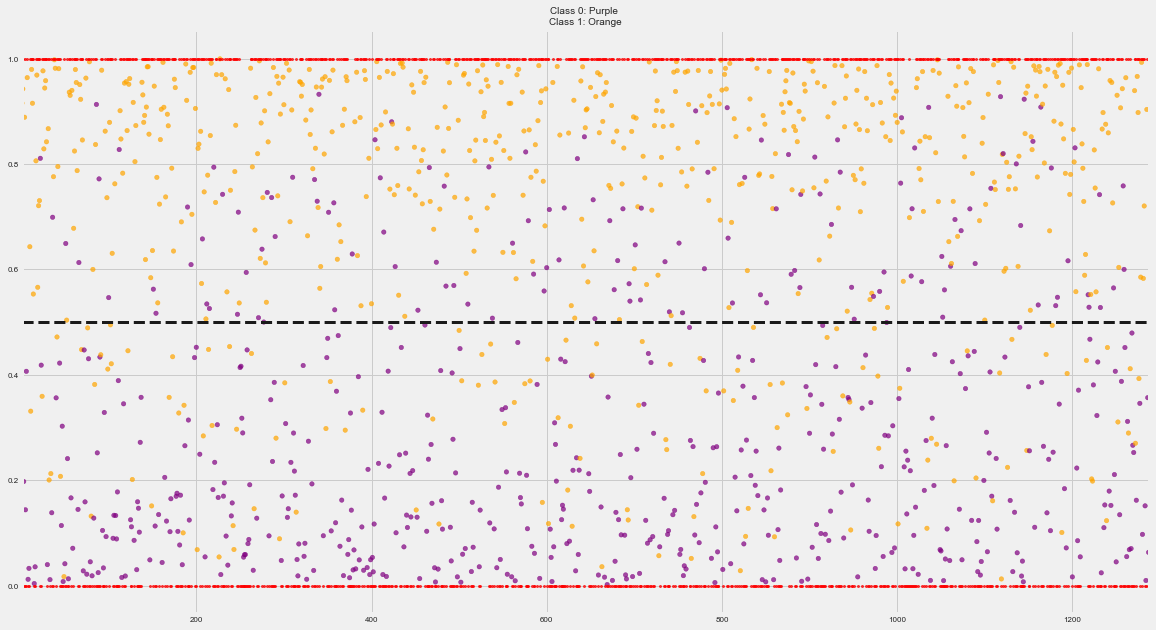

In [851]:
y_prob = model.predict_proba(X_test)
c = list(pd.DataFrame(t_test)[0].apply(lambda x: 'Orange' if x==1 else 'Purple'))
plt.figure(figsize=(18,10))
plt.plot(range(y_prob.shape[0]),pd.DataFrame(t_test), color='Red', ms = 4, marker='.', linestyle=' ', alpha=.7)

plt.scatter(range(y_prob.shape[0]), y_prob[:,1], color=c, s = 20, marker='o', alpha=.7)
plt.axhline(y=.5, xmin=0, xmax=1, linewidth=3, linestyle='dashed', color='k')
plt.xlim(1,y_prob.shape[0])
plt.title('Class 0: Purple \nClass 1: Orange');
plt.show()

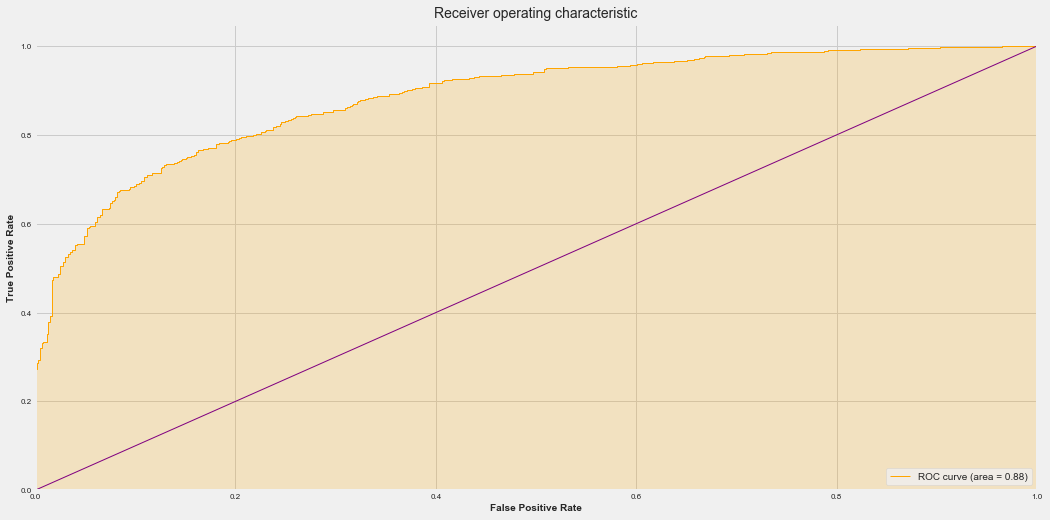

In [852]:
fpr, tpr, thresholds = roc_curve(pd.DataFrame(t_test)[0], model.predict_proba(X_test)[:,1], pos_label=1)

plt.figure(figsize=(16,8))
plt.plot(fpr, tpr, color='Orange', linewidth=1,label='ROC curve (area = %0.2f)' %  auc(fpr, tpr))
plt.fill_between(fpr, 0, tpr, alpha=0.2, color='Orange')
plt.plot([0, 1], [0, 1], color='Purple', linewidth=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel(r'True Positive Rate')
plt.xlabel(r'False Positive Rate')
plt.title('Receiver operating characteristic', fontsize=14)
plt.legend(loc="lower right")
plt.show()

In [853]:
print('AUC = {0:0.4f}'.format(auc(fpr, tpr)))


AUC = 0.8837


In [854]:
optimal_idx = np.argmax(tpr-fpr)
optimal_threshold = thresholds[optimal_idx]
print('Optimal threshold: {0:3.3f}'.format(optimal_threshold))


Optimal threshold: 0.619


In [855]:
p_train = model.predict(X_train)
p_test = model.predict(X_test)
cm_train = confusion_matrix(t_train,p_train)
cm_test = confusion_matrix(t_test,p_test)

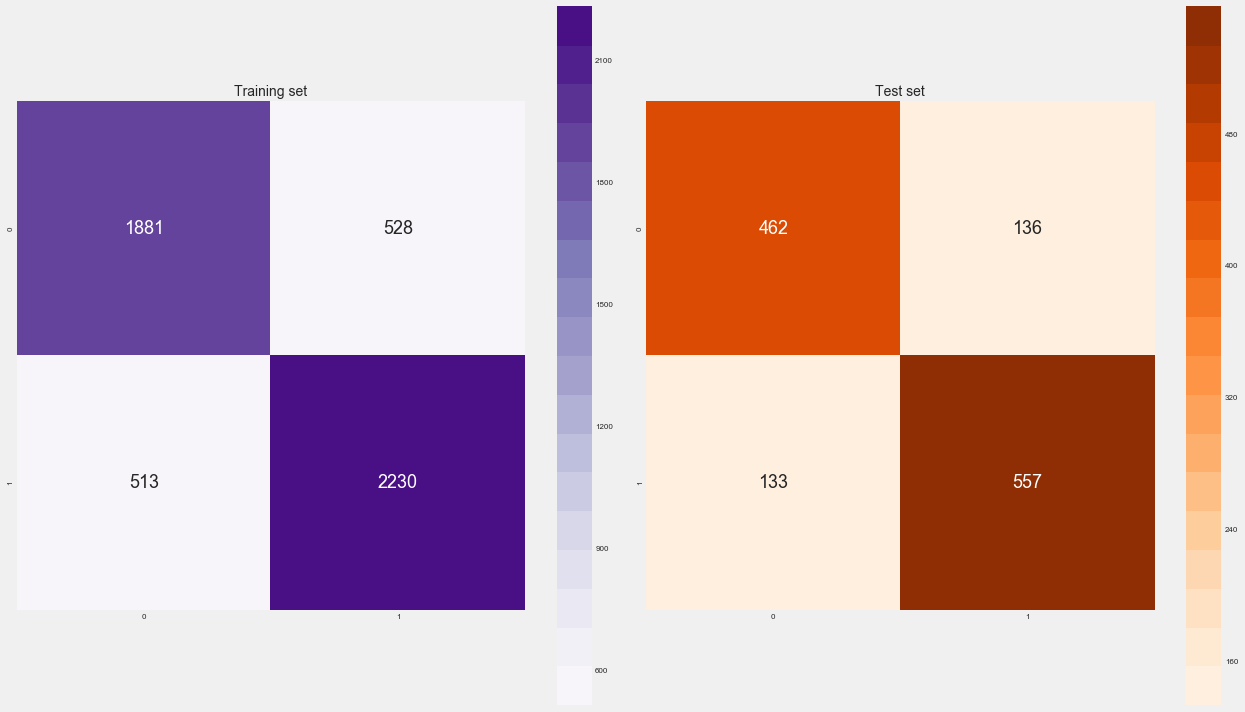

In [856]:
plt.figure(figsize=(18,10))
plt.subplot(1,2,1)
hm = sns.heatmap(cm_train,cbar=True,annot=True,square=True,fmt='d',annot_kws={'size': 18},cmap = sns.color_palette("Purples", 18))
plt.title('Training set', fontsize=14)
plt.subplot(1,2,2)
hm = sns.heatmap(cm_test,cbar=True,annot=True,square=True,fmt='d',annot_kws={'size': 18},cmap = sns.color_palette("Oranges", 18))
plt.title('Test set', fontsize=14)
plt.tight_layout()
plt.show()

In [857]:
print('TRAINING SET')
m = precision_recall_fscore_support(p_train,t_train)
print('Precision class 0 = {0:5.4f}'.format(m[0][0]))
print('Precision class 1 = {0:5.4f}'.format(m[0][1]))
print('Recall class 0 = {0:5.4f}'.format(m[1][0]))
print('Recall class 1 = {0:5.4f}'.format(m[1][1]))
print('F-score class 0 = {0:5.4f}'.format(m[2][0]))
print('F-score class 1 = {0:5.4f}'.format(m[2][1]))
print('Accuracy = {0:5.4f}'.format(accuracy_score(p_train,t_train)))

TRAINING SET
Precision class 0 = 0.7808
Precision class 1 = 0.8130
Recall class 0 = 0.7857
Recall class 1 = 0.8086
F-score class 0 = 0.7833
F-score class 1 = 0.8108
Accuracy = 0.7979


In [858]:
print('TEST SET')

m = precision_recall_fscore_support(p_test,t_test)
print('Precision class 0 = {0:5.4f}'.format(m[0][0]))
print('Precision class 1 = {0:5.4f}'.format(m[0][1]))
print('Recall class 0 = {0:5.4f}'.format(m[1][0]))
print('Recall class 1 = {0:5.4f}'.format(m[1][1]))
print('F-score class 0 = {0:5.4f}'.format(m[2][0]))
print('F-score class 1 = {0:5.4f}'.format(m[2][1]))
print('Accuracy = {0:5.4f}'.format(accuracy_score(p_test,t_test)))

TEST SET
Precision class 0 = 0.7726
Precision class 1 = 0.8072
Recall class 0 = 0.7765
Recall class 1 = 0.8038
F-score class 0 = 0.7745
F-score class 1 = 0.8055
Accuracy = 0.7911


In [859]:
pred_proba = pd.DataFrame(model.predict_proba(X_test)[:,1])
p = pred_proba.applymap(lambda x: 1 if x>optimal_threshold else 0)
cm = confusion_matrix(t_test,p)


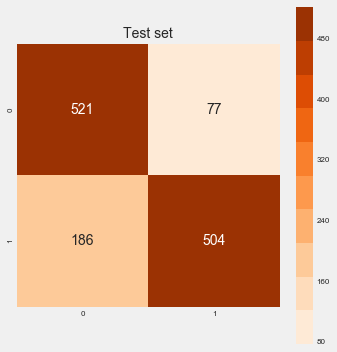

In [860]:
plt.figure(figsize=(5,5))
hm = sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='d',annot_kws={'size': 14},
                 cmap = sns.color_palette("Oranges", 10))
plt.title('Test set', fontsize=14)
plt.tight_layout()
plt.show()

In [861]:
m = precision_recall_fscore_support(p,t_test)
print('Precision class 0 = {0:5.4f}'.format(m[0][0]))
print('Precision class 1 = {0:5.4f}'.format(m[0][1]))
print('Recall class 0 = {0:5.4f}'.format(m[1][0]))
print('Recall class 1 = {0:5.4f}'.format(m[1][1]))
print('F-score class 0 = {0:5.4f}'.format(m[2][0]))
print('F-score class 1 = {0:5.4f}'.format(m[2][1]))
print('Accuracy = {0:5.4f}'.format(accuracy_score(p,t_test)))

Precision class 0 = 0.8712
Precision class 1 = 0.7304
Recall class 0 = 0.7369
Recall class 1 = 0.8675
F-score class 0 = 0.7985
F-score class 1 = 0.7931
Accuracy = 0.7958


#### 2.4.2.3 Cross Validation

In [911]:
X_k_fold=dataset.drop(columns=['target'])
Y_k_fold=dataset['target']
X_k_fold,Y_k_fold=X_k_fold.values,Y_k_fold.values
kf= KFold(n_splits=5)
SCORES=[]
ACCURACY=[]
for train_index, test_index in kf.split(X_k_fold):
    X_k_train, X_k_test = X_k_fold[train_index], X_k_fold[test_index]
    t_k_train, t_k_test = Y_k_fold[train_index], Y_k_fold[test_index]
    scaler=PowerTransformer()
    #scaler=StandardScaler()
    LDA = LinearDiscriminantAnalysis()

    model = Pipeline([('scale', scaler),('clf', LDA)])
    model = model.fit(X_k_train,t_k_train)
    m = precision_recall_fscore_support(model.predict(X_k_test),t_k_test)
    ACCURACY.append(accuracy_score(model.predict(X_k_test),t_k_test))
    SCORES.append(m)
P_0=[]
P_1=[]
F_S_0=[]
F_S_1=[]
R_0=[]
R_1=[]


for i in range(len(SCORES)):
    P_0.append(SCORES[i][0][0])
    P_1.append(SCORES[i][0][1])
    R_0.append(SCORES[i][1][0])
    R_1.append(SCORES[i][1][1])
    F_S_0.append(SCORES[i][2][0])
    F_S_1.append(SCORES[i][2][1])
p_0=np.array(P_0).mean()
p_1=np.array(P_1).mean()
f_s_0=np.array(F_S_0).mean()
f_s_1=np.array(F_S_1).mean()
r_0=np.array(R_0).mean()
r_1=np.array(R_1).mean()
accuracy=np.array(ACCURACY).mean()
PERFORMANCES=[p_0,p_1,f_s_0,f_s_1,r_0,r_1,accuracy]
perf_title=['precisione classe 0','precisione classe 1','f_measure classe 0',
           'f_measure classe 1','recall classe 0','recall classe 1','accuracy']
for i in range(len(PERFORMANCES)):
    print("La %s del modello %s è %f" %(perf_title[i],ALG[2],PERFORMANCES[i]))
TOT_PERFORMANCE.append(PERFORMANCES)

La precisione classe 0 del modello LDA è 0.778035
La precisione classe 1 del modello LDA è 0.813673
La f_measure classe 0 del modello LDA è 0.781532
La f_measure classe 1 del modello LDA è 0.810422
La recall classe 0 del modello LDA è 0.785141
La recall classe 1 del modello LDA è 0.807259
La accuracy del modello LDA è 0.797050


## 2.5 SVM

I Support Vector Machine (SVM) rappresentano un algoritmo di classificazione lineare (nello spazio delle feature) non probabilistico. 
L'idea di base di un SVM "hard margin" è che sia possibile effettuare una divisione dello spazio tramite una retta e che i punti siano ben classificati (la seguente disuguaglianza è verificata):
\begin{equation}
\gamma_i=t_i(w^{T}\phi(x_i)+w_0)>0
\end{equation}

Nel nostro caso $t_i\in\{0,1\}$ (classificazione binaria).
Il valore minimo di $\gamma_i$ ($\min\gamma_i=\gamma$) è noto come __margine funzionale__ e il punto $x_i$  (__support vector__) sarà il punto più vicino all'iperpiano di separazione. L'idea di base di un SVM è quella di massimizzare il margine funzionale per avere una maggior confidenza nella predizione. 
Tuttavia è possibile osservare che questo margine risulta dipendente da riscalamenti del modulo di $w$.
Pertanto la definizione di margine va opportunamente modificata tramite il __margine geometrico__:
\begin{equation}
\gamma_i=t_i\Big{(}\frac{w^{T}}{\lVert w \rVert}\phi(x_i)+\frac{w_0}{\lVert w \rVert}\Big{)}
\end{equation}

E' possibile interpretare il margine geometrico come metà dell'ampiezza della striscia più grande centrata nell'iperpiano di separazione. Questo vuol dire che esiste una striscia intorno all'iperpiano di separazione di ampiezza $2\min\gamma_i$ in cui non ci sono elementi del training set.
Al fine di determinare l'iperpiano che massimizza $\gamma_i$(margine ottimale) dobbiamo risolvere il seguente problema di ottimizzazione:
\begin{equation}
\max_{w,w_0}\gamma
\end{equation}

\begin{equation}
\gamma_i=\frac{t_i}{\lVert w \rVert}(w^{T}\phi{(x_i)}+w_0)\geq\gamma
\end{equation}

Senza perdita di generalità, è possibile assumere  $\lVert w \rVert=\frac{1}{\gamma}$ e dunque $\min\gamma_i=1$. 
Poichè è dunque necessario massimizzare $\lVert w \rVert^{-1}$, possiamo considerare il seguente problema di ottimizzazione:
\begin{equation}
\min_{w,w_0}\frac{1}{2}{\lVert w \rVert}^2
\end{equation}



\begin{equation}
t_i(w^{T}\phi(x_i)+w_0)\geq1
\end{equation}

Il problema di ottimizzazione può essere risolto utilizzando la formulazione duale e definendo la funzione Lagrangiana da minimizzare.

\begin{equation}
L(w,\lambda)=\frac{1}{2}{\lVert w \rVert}^2-\sum_{i=1}^{n}\lambda_i(t_i(w^{T}\phi(x_i)+w_0)-1)
\end{equation}

Una condizione necessaria e sufficiente per l'esistenza di questo ottimo è data dal __teorema di Karush-Kuhn-Tucker__ che assicura l'esistenza di un ottimo ($w^{*},\lambda^{*}$) quando sono verificate simultaneamente le seguenti condizioni:
\begin{equation}
\frac{\partial{L(w,\lambda)}}{\partial{w}}\Big{|}_{w^{*},\lambda^{*}}=w^*-\sum_{i=1}^{n}\lambda^{*}_i t_i\phi(x_i)=0
\end{equation}
\begin{equation}
\frac{\partial{L(w,\lambda)}}{\partial{w_0}}\Big{|}_{w^{*},\lambda^{*}}=\sum_{i=1}^{n}\lambda^{*}_i t_i=0
\end{equation}
\begin{equation}
\frac{\partial{L(w,\lambda)}}{\partial{\lambda_i}}\Big{|}_{w^{*},\lambda^{*}}=t_i(w^{*T}\phi(x_i)+w^{*}_0)-1\geq0
\end{equation}

\begin{equation}
\lambda_i^{*}\geq0
\end{equation}

\begin{equation}
\lambda_i^{*}(t_i(w^{*T}\phi(x_i)+w^{*}_0)-1)=0
\end{equation}

Dall'ultima uguaglianza si nota che gli unici punti in cui i relativi moltiplicatori di Lagrange $\lambda_i$ sono diversi da 0 sono i punti relativi ai support vector (i punti sulla frontiera). 
Verificate queste condizioni, i valori ottimi di $\lambda_i$ (e dunque quelli di $w$), si ottengono tramite la seguente espressione:
\begin{equation}
L(w,\lambda)=\max_{\lambda}\min_{w,w_0}\Big{(}\frac{1}{2}{\lVert w \rVert}^2-\sum_{i=1}^{n}\lambda_i(t_i(w^{T}\phi(x_i)+w_0)-1)\Big{)}=\max_{\lambda}\Big{(}\sum_{i=1}^{n}\lambda_i-\frac{1}{2}\sum_{j=1}^{n}\sum_{i=1}^{n} \lambda_i\lambda_jt_it_j\phi(x_i)\phi(x_j)\Big{)}
\end{equation}

Ottenuti i valori ottimali di $\lambda$, l'espressione per i coefficienti $w_i^*$ sarà:
\begin{equation}
w_i^{*}=\sum_{j=1}^{n}\lambda_j^{*}t_j\phi_i(x_j)
\end{equation}
Inserendo questi valori all'interno dell'espressione per un support vector $x_k$ si ottiene l'espressione per $w_0^*$:

\begin{equation}
1=t_k(\phi(x_k)^T w^{*}+ w_0^{*})
\end{equation}

\begin{equation}
w_0^*=t_k-\sum_{j\in S}\lambda_j^{*}t_jk(x_j,x_i)
\end{equation}
Dove con $S$ si intende l'insieme dei vettori $x$ che si trovano sulla frontiera, mentre:
\begin{equation}
k(x_j,x_i)=\phi(x_j)^T\phi(x_i)
\end{equation}

Un nuovo punto $x$ verrà classificato dunque in base al segno della seguente funzione di predizione:
\begin{equation}
y(x)=\sum_{i=1}^{m}w_i^{*}\phi_i(x)+w_0*= \sum_{j=1}^{n}\lambda_j^*t_jk(x_j,x)+w^{*}_0
\end{equation}

Questo tipo di classificazione è però efficace solo rispettando l'assunzione di base di separabilità lineare del dataset.

Anche quando la separabilità non è verificata, è comunque possibile applicare il procedimento sopra mostrato utilizzando due strategie:

* Rilassare l'ipotesi di "separabilità lineare" (__soft margin__), ammettendo dunque che alcuni punti siano posizionati all'interno della striscia di classificazione (o addirittura oltre, ma con segno opposto)
* Utilizzare il __kernel trick__ esplorando in modo esplicito nuovi spazi vettoriali tramite l'utilizzo di funzioni di base in cui sembra essere più adeguata l'ipotesi di separabilità lineare.

La procedura per l'utilizzo di un SVM di tipo soft è la medesima di quella di tipo hard ma presenta delle __variabili di slack__ $\xi_i$ che indicano quanto il vincolo imposto dal problema di ottimizzazione non è verificato:

\begin{equation}
t_i(w^T\phi(x_i)+w_0)\geq 1-\xi_i
\end{equation}

Il problema di ottimizzazione con vincoli da risolvere è pertanto il seguente:
\begin{equation}
\min_{w,w_0,\xi}\frac{1}{2}w^T w+C\sum_{i=1}^{n}\xi_i
\end{equation}

\begin{equation}
t_i(w^T\phi(x_i)+w_0)\geq 1-\xi_i
\end{equation}

\begin{equation}
\xi_i\geq 0
\end{equation}
Dove C rappresenta un valore fissato.
Utilizzando sempre le condizioni del teorema di Karush-Kunt-Tucker si ottiene la stessa espressione della lagrangiana espressa in precedenza. Questa volta, però, i valori di $\lambda$ risultano essere limitati superiormente:

\begin{equation}
0\leq\lambda_i \leq C
\end{equation}

In particolare è possibile dimostrare che $\lambda=C$ quando $\xi\neq0$.
Osservando la funzione da minimizzare, è possibile notare come $\frac{1}{C}$ rappresenti il grado di tollerabilità degli errori. Infatti, se $C\rightarrow\infty$, allora per ogni elemento $x_i$ in cui $\xi\neq0$, la funzione da minimizzare tende ad essere molto grande: la tollerabilità sull'errore risulta essere minima e ricadiamo nel caso __hard margin__. Al contrario, tanto più C tende a decrescere (tenendo a mente che $C>0$), la tollerabilità aumenta, e il classificatore SVM è propriamente di tipo __soft margin__.

Per il nostro task, le performance sono state valutate al variare di C, ottenendo valori più soddisfacenti per un algoritmo di tipo __soft margin__. 


Il secondo metodo per trattare la non lineare separabilità del dataset è fornito dal __kernel trick__. 
Nella formula per la predizione di un elemento $x$, compare il prodotto scalare tra quell'elemento e tutti gli altri nel training set. L'idea del kernel trick è quella di esplorare (implicitamente) per ogni elemento del training set un altro spazio vettoriale nel quale quegli elementi siano linearmente classificabili in maniera più efficace. In particolare alcune trasformazioni implicite risultano essere anche computazionalmente efficaci:
\begin{equation}
k(x_i,x_j)=(x_i^Tx_j)^2=\phi(x_i)^T\phi(x_j)
\end{equation}
Se $x_i \in R^2$ e $x_j \in R^2$ ,$\phi(x_i)=(x^2_{i_1},x^2_{i_2},x_{i_1}x_{i_2},x_{i_1}x_{i_2})$
Dunque $\phi(x) \in R^4$ ma il kernel calcola di fatto un prodotto scalare in $R^2$. 
Matematicamente una funzione risulta essere un kernel se esiste uno spazio di Hilbert in cui $k$ definisce un prodotto scalare.

Il kernel utilizzato per il nostro task è un kernel 'rbf':
$${\displaystyle K(\mathbf {x} ,\mathbf {x'} )=\exp \left(-{\frac {\|\mathbf {x} -\mathbf {x'} \|^{2}}{2\sigma ^{2}}}\right)}$$
### 2.5.1 Due feature

In [871]:
#scaler=StandardScaler()
scaler=PowerTransformer()
model = Pipeline([('scale', scaler),('clf', SVC(kernel='rbf',C=1,gamma=10**2))])
model = model.fit(X_train_small,t_train_small)

In [872]:
x_min=min(X_small[:,0])
x_max=max(X_small[:,0])
y_min=min(X_small[:,1])
y_max=max(X_small[:,1])

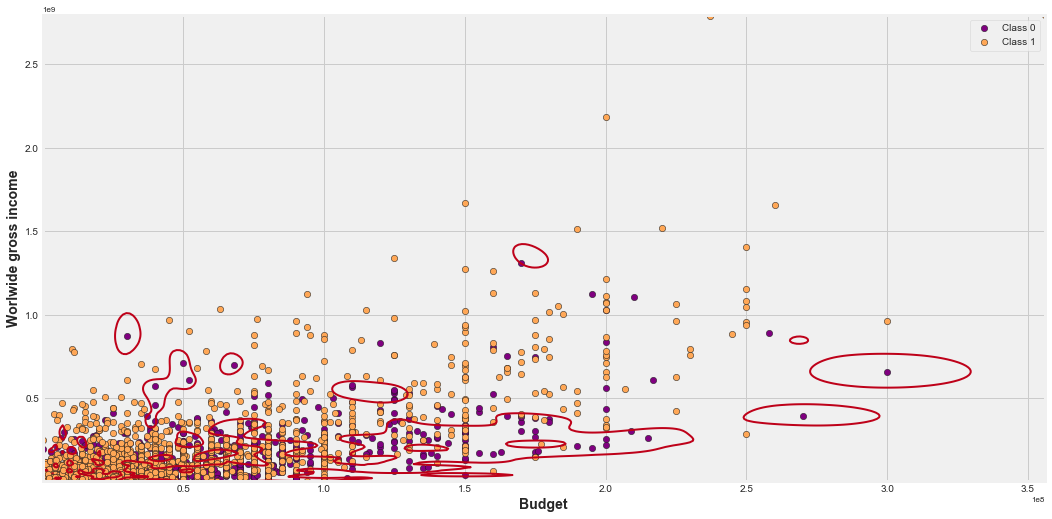

In [873]:
# plot the decision function for each datapoint on the grid
xx, yy = np.meshgrid(np.linspace(min(X_small[:,0]), max(X_small[:,0]),300),
                     np.linspace(min(X_small[:,1]), max(X_small[:,1]),300))
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
#X_smallX_small, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
fig = plt.figure(figsize=(16,8))
fig.patch.set_facecolor('white')
ax = fig.gca()
#imshow_handle = plt.imshow(Z, interpolation='nearest',
#           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
#           origin='lower',cmap='plasma', alpha=.5)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,
                   linestyles='-', colors=[colors[9]])

C=['purple',colors[0]]
for i in range(2):
    idx = np.where(t_train_small == i)
    plt.scatter(X_train_small[idx, 0], X_train_small[idx, 1], c=C[i], edgecolors='k', s=40, 
               label='Class {0:d}'.format(i),cmap='plasma')
plt.xlabel('Budget', fontsize=14)
plt.ylabel('Worlwide gross income', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(min(X_small[:,0]), max(X_small[:,0]))
plt.ylim(min(X_small[:,1]), max(X_small[:,1]))
plt.legend()
plt.show()

In [874]:
#scaler=StandardScaler()
scaler=PowerTransformer()
model = Pipeline([('scale', scaler),('clf', SVC(kernel='rbf',C=1,gamma=10**6))])
model = model.fit(X_train,t_train)
p_train = model.predict(X_train)
p_test = model.predict(X_test)
cm_train = confusion_matrix(t_train,p_train)
cm_test = confusion_matrix(t_test,p_test)

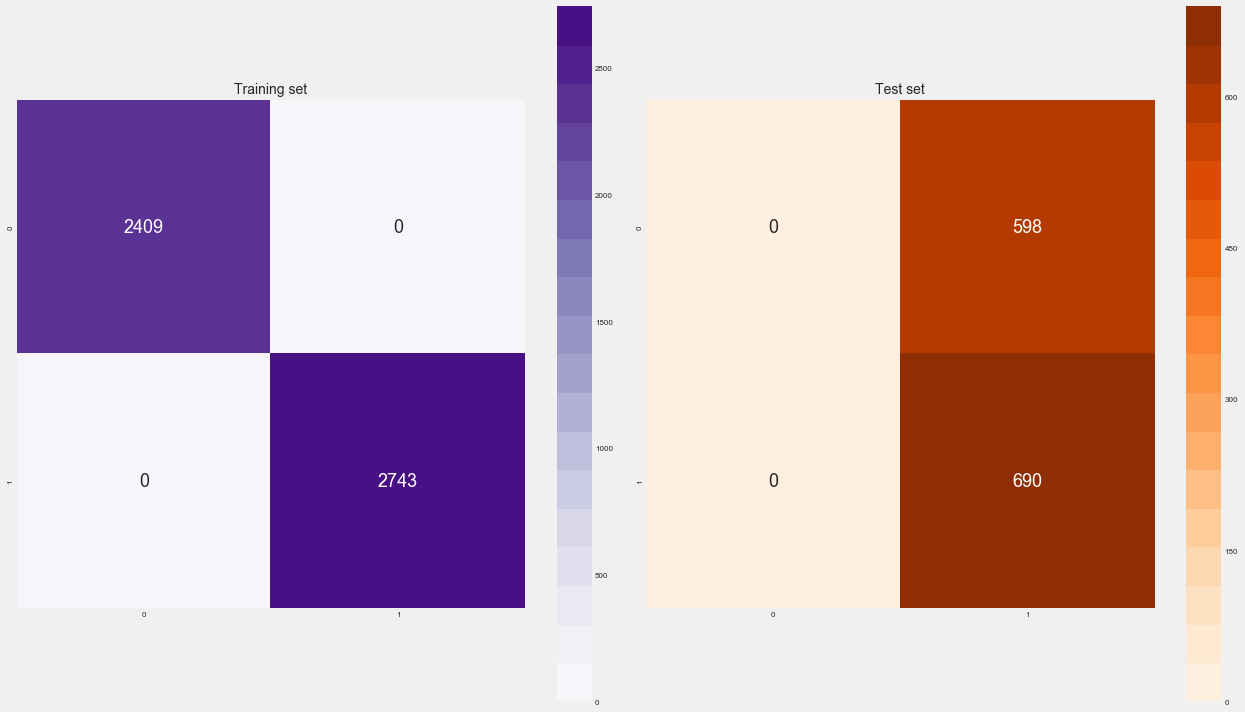

In [875]:
plt.figure(figsize=(18,10))
plt.subplot(1,2,1)
hm = sns.heatmap(cm_train,cbar=True,annot=True,square=True,fmt='d',annot_kws={'size': 18},cmap = sns.color_palette("Purples", 18))
plt.title('Training set', fontsize=14)
plt.subplot(1,2,2)
hm = sns.heatmap(cm_test,cbar=True,annot=True,square=True,fmt='d',annot_kws={'size': 18},cmap = sns.color_palette("Oranges", 18))
plt.title('Test set', fontsize=14)
plt.tight_layout()
plt.show()

In [876]:
print('TRAINING SET')
m = precision_recall_fscore_support(p_train,t_train)
print('Precision class 0 = {0:5.4f}'.format(m[0][0]))
print('Precision class 1 = {0:5.4f}'.format(m[0][1]))
print('Recall class 0 = {0:5.4f}'.format(m[1][0]))
print('Recall class 1 = {0:5.4f}'.format(m[1][1]))
print('F-score class 0 = {0:5.4f}'.format(m[2][0]))
print('F-score class 1 = {0:5.4f}'.format(m[2][1]))
print('Accuracy = {0:5.4f}'.format(accuracy_score(p_train,t_train)))

TRAINING SET
Precision class 0 = 1.0000
Precision class 1 = 1.0000
Recall class 0 = 1.0000
Recall class 1 = 1.0000
F-score class 0 = 1.0000
F-score class 1 = 1.0000
Accuracy = 1.0000


In [877]:
print('TEST SET')

m = precision_recall_fscore_support(p_test,t_test)
print('Precision class 0 = {0:5.4f}'.format(m[0][0]))
print('Precision class 1 = {0:5.4f}'.format(m[0][1]))
print('Recall class 0 = {0:5.4f}'.format(m[1][0]))
print('Recall class 1 = {0:5.4f}'.format(m[1][1]))
print('F-score class 0 = {0:5.4f}'.format(m[2][0]))
print('F-score class 1 = {0:5.4f}'.format(m[2][1]))
print('Accuracy = {0:5.4f}'.format(accuracy_score(p_test,t_test)))

TEST SET
Precision class 0 = 0.0000
Precision class 1 = 1.0000
Recall class 0 = 0.0000
Recall class 1 = 0.5357
F-score class 0 = 0.0000
F-score class 1 = 0.6977
Accuracy = 0.5357


### 2.5.2 Tutte le feature

In [702]:
#scaler=StandardScaler()
scaler=PowerTransformer()
C_=[10**-2,10**-1,1,10,100,1000]
P_TEST=[]
#k=0
for c in C_:
    model = Pipeline([('scale', scaler),('clf', SVC(kernel='rbf',C=c,gamma='scale'))])
    model = model.fit(X_train,t_train)
    p_test = model.score(X_test,t_test)
    P_TEST.append(p_test)
    #k=k+1
    #print(k,len(C_))

In [703]:
print('Il miglior valore di C risulta essere %.f, mentre il peggiore %.f'%(C_[P_TEST.index(max(P_TEST))],C_[P_TEST.index(min(P_TEST))]))

Il miglior valore di C risulta essere 1, mentre il peggiore 1000


In [ ]:
C_=np.arange(5*10**-1,5,0.1)
NEW_P_TEST=[]
k=0
for c in C_:
    model = Pipeline([('scale', scaler),('clf', SVC(kernel='rbf',C=c,gamma='scale'))])
    model = model.fit(X_train,t_train)
    p_test = model.score(X_test,t_test)
    NEW_P_TEST.append(p_test)
    k=k+1
    print(k,len(C_))

In [ ]:
C_=np.arange(5*10**-1,1.1,0.01)
FIN_P_TEST=[]
k=0
for c in C_:
    model = Pipeline([('scale', scaler),('clf', SVC(kernel='rbf',C=c,gamma='scale'))])
    model = model.fit(X_train,t_train)
    p_test = model.score(X_test,t_test)
    FIN_P_TEST.append(p_test)
    k=k+1
    print(k,len(C_))

In [707]:
print('Il miglior valore di C risulta essere %.2f, mentre il peggiore %.2f'%(C_[FIN_P_TEST.index(max(FIN_P_TEST))],C_[FIN_P_TEST.index(min(FIN_P_TEST))]))

Il miglior valore di C risulta essere 0.90, mentre il peggiore 1.00


In [878]:
model = Pipeline([('scale', scaler),('clf', SVC(kernel='rbf',C=C_[FIN_P_TEST.index(max(FIN_P_TEST))],gamma='scale'))])
model = model.fit(X_train,t_train)


In [879]:
p_train = model.predict(X_train)
p_test = model.predict(X_test)
cm_train = confusion_matrix(t_train,p_train)
cm_test = confusion_matrix(t_test,p_test)

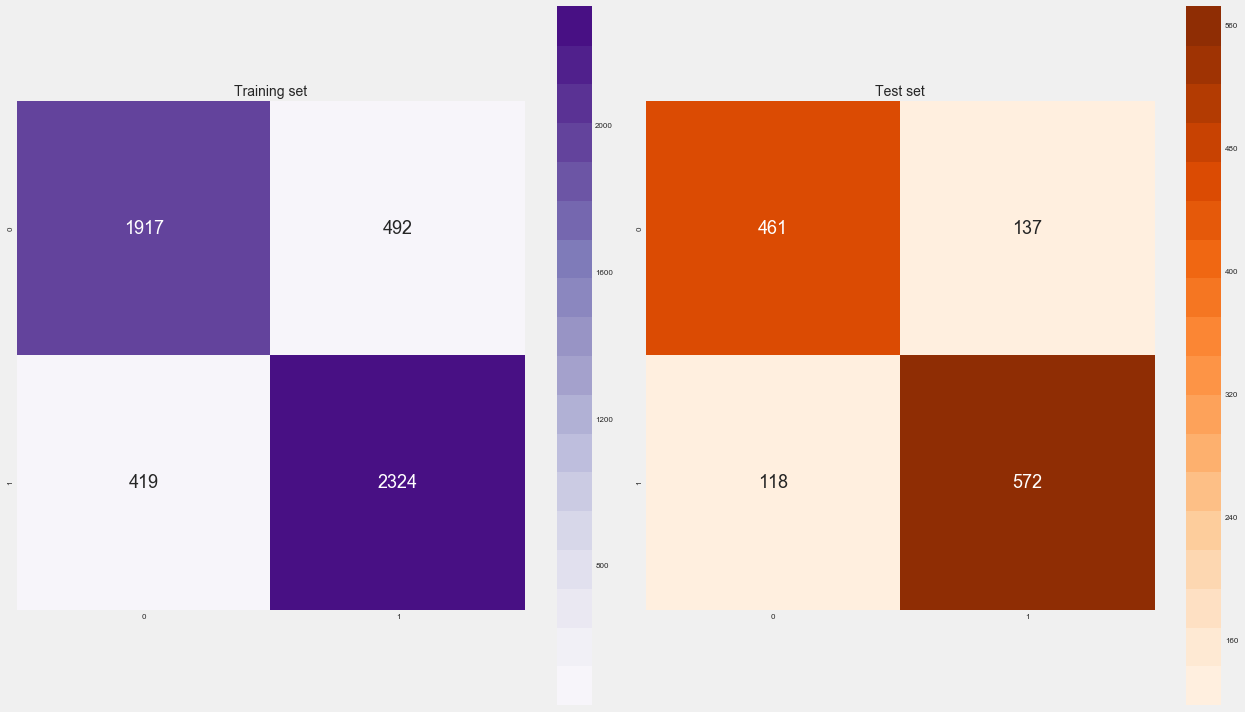

In [880]:
plt.figure(figsize=(18,10))
plt.subplot(1,2,1)
hm = sns.heatmap(cm_train,cbar=True,annot=True,square=True,fmt='d',annot_kws={'size': 18},cmap = sns.color_palette("Purples", 18))
plt.title('Training set', fontsize=14)
plt.subplot(1,2,2)
hm = sns.heatmap(cm_test,cbar=True,annot=True,square=True,fmt='d',annot_kws={'size': 18},cmap = sns.color_palette("Oranges", 18))
plt.title('Test set', fontsize=14)
plt.tight_layout()
plt.show()

In [881]:
print('TRAINING SET')
m = precision_recall_fscore_support(p_train,t_train)
print('Precision class 0 = {0:5.4f}'.format(m[0][0]))
print('Precision class 1 = {0:5.4f}'.format(m[0][1]))
print('Recall class 0 = {0:5.4f}'.format(m[1][0]))
print('Recall class 1 = {0:5.4f}'.format(m[1][1]))
print('F-score class 0 = {0:5.4f}'.format(m[2][0]))
print('F-score class 1 = {0:5.4f}'.format(m[2][1]))
print('Accuracy = {0:5.4f}'.format(accuracy_score(p_train,t_train)))

TRAINING SET
Precision class 0 = 0.7958
Precision class 1 = 0.8472
Recall class 0 = 0.8206
Recall class 1 = 0.8253
F-score class 0 = 0.8080
F-score class 1 = 0.8361
Accuracy = 0.8232


In [882]:
print('TEST SET')

m = precision_recall_fscore_support(p_test,t_test)
print('Precision class 0 = {0:5.4f}'.format(m[0][0]))
print('Precision class 1 = {0:5.4f}'.format(m[0][1]))
print('Recall class 0 = {0:5.4f}'.format(m[1][0]))
print('Recall class 1 = {0:5.4f}'.format(m[1][1]))
print('F-score class 0 = {0:5.4f}'.format(m[2][0]))
print('F-score class 1 = {0:5.4f}'.format(m[2][1]))
print('Accuracy = {0:5.4f}'.format(accuracy_score(p_test,t_test)))

TEST SET
Precision class 0 = 0.7709
Precision class 1 = 0.8290
Recall class 0 = 0.7962
Recall class 1 = 0.8068
F-score class 0 = 0.7833
F-score class 1 = 0.8177
Accuracy = 0.8020


### 2.5.3 Cross Validation

In [913]:
X_k_fold=dataset.drop(columns=['target'])
Y_k_fold=dataset['target']
X_k_fold,Y_k_fold=X_k_fold.values,Y_k_fold.values
kf= KFold(n_splits=5)
SCORES=[]
ACCURACY=[]
for train_index, test_index in kf.split(X_k_fold):
    X_k_train, X_k_test = X_k_fold[train_index], X_k_fold[test_index]
    t_k_train, t_k_test = Y_k_fold[train_index], Y_k_fold[test_index]

    scaler=PowerTransformer()
    model = Pipeline([('scale', scaler),('clf', SVC(kernel='rbf',C=C_[FIN_P_TEST.index(max(FIN_P_TEST))],gamma='scale'))])
    model = model.fit(X_k_train,t_k_train)
    m = precision_recall_fscore_support(model.predict(X_k_test),t_k_test)
    ACCURACY.append(accuracy_score(model.predict(X_k_test),t_k_test))
    SCORES.append(m)
P_0=[]
P_1=[]
F_S_0=[]
F_S_1=[]
R_0=[]
R_1=[]


for i in range(len(SCORES)):
    P_0.append(SCORES[i][0][0])
    P_1.append(SCORES[i][0][1])
    R_0.append(SCORES[i][1][0])
    R_1.append(SCORES[i][1][1])
    F_S_0.append(SCORES[i][2][0])
    F_S_1.append(SCORES[i][2][1])
p_0=np.array(P_0).mean()
p_1=np.array(P_1).mean()
f_s_0=np.array(F_S_0).mean()
f_s_1=np.array(F_S_1).mean()
r_0=np.array(R_0).mean()
r_1=np.array(R_1).mean()
accuracy=np.array(ACCURACY).mean()
PERFORMANCES=[p_0,p_1,f_s_0,f_s_1,r_0,r_1,accuracy]
perf_title=['precisione classe 0','precisione classe 1','f_measure classe 0',
           'f_measure classe 1','recall classe 0','recall classe 1','accuracy']
for i in range(len(PERFORMANCES)):
    print("La %s del modello %s è %f" %(perf_title[i],ALG[4],PERFORMANCES[i]))
TOT_PERFORMANCE.append(PERFORMANCES)

La precisione classe 0 del modello SVM è 0.777047
La precisione classe 1 del modello SVM è 0.816253
La f_measure classe 0 del modello SVM è 0.782071
La f_measure classe 1 del modello SVM è 0.811609
La recall classe 0 del modello SVM è 0.787345
La recall classe 1 del modello SVM è 0.807155
La accuracy del modello SVM è 0.797981


## 2.6 Decision Trees 

Il metodo dei decision tree è un classificatore basato sulla partizione dello spazio in modo ricorsivo.

Il cosidetto "albero decisionale" è costituito da __una radice__,__dei nodi__, e __delle foglie__.

La radice rappresenta l'intero training set. A partire da questa, avverrà in modo ricorsivo uno split in due o più sottospazi, rappresentati dai nodi, in accordo al valore assunto dalla feature selezionata in base ad un certo valore di soglia o alle classi di appartenenza nel caso di feature categoriche. Gli ultimi nodi, cioè quelli non divisi in nodi figli, sono denominati foglie. Ogni elemento presente nel sottospazio identificato dalla foglia verrà associato alla classe con maggior numero di elementi nella foglia stessa.

A questo punto si identificano 3 quesiti:

* Come realizzare uno split efficace per ogni nodo?
* Quando interrompere la divisione in nodi successivi? 

Per definire uno split efficace si utilizza il concetto di __impurità di un nodo__, che vorremo minimizzare. Infatti, fissato un valore di soglia per la feature e eseguito lo split, ogni nodo presenterà una certa divisione dei suoi elementi nelle varie classi. In particolare, dato una porzione di spazio $S$ identificata da un nodo, si avranno dunque, nel nostro caso (classificazione binaria) $p_S=(\frac{|S_0|}{|S|},\frac{|S_1|}{|S|})$, indicando con $|S_k|$ il numero di elementi appartenenti allo spazio $S$ classificati $k$.

Idealmente vorremmo ottenere, nei limiti imposti dall'overfitting, per il nodo $S$, una distribuzione di probabilità simile a $p_S=(1,0)$ o $p_S=(0,1)$. In questo senso, possiamo dire che un nodo è tanto più impuro quanto più la probabilità $p_S$ sia uniforme. Allo stesso modo, possiamo dire che un nodo è puro quando un solo elemento di $p_S$ è significativamente diverso da 0. Inoltre si richiedono per l'impurità ($\phi(p_S))$ alcune proprietà:
* $\phi(p_S)\geq0$
* invarianza sotto permutazione 
* differenziabilità

Si può dimostrare che una misura che soddisfa le proprietà sopra elencate per l'impurità è __l'indice di Gini__:

\begin{equation}
G_S=1-\sum_{k=0}^{K} \Big{(}\frac{|S_k|}{|S|}\Big{)}^2
\end{equation}

Con $K=$ numero delle classi, nel nostro caso $K=1$. 
Una quantità importante da valutare è la __bontà di uno split__. 
In generale, data una misura di impurità, questa quantità è uguale alla differenza tra l'impurità del nodo genitore e la somma delle impurità degli ($r$) nodi figli pesata con le rispettive probabilità:

\begin{equation}
\Delta_{\phi}(S)= \phi(p_S)-\sum_{i=0}^{r}p_r\phi(p_{s_r})
\end{equation}

Con $\phi(p_{s_r})$ che rappresenta l'impurità del nodo relativo alla  regione $s_r$.
Per quanto riguarda il Gini index si ottiene la seguente bontà di uno split:

__Gini Gain__


$$GG_S= G_S - \sum_{j=0}^{r} \frac{|s_j|}{|S|}G_{s_j}$$


L'algoritmo procede nel massimizzare il __Gini Gain__ per ogni split. 

L'interruzione della divisione in split successivi è fissata tramite un valore prestabilito che indica la profondità massima dell'albero. 
Nel nostro codice, più alberi sono stati provati, ed è stato selezionato l'albero a profondità ottimale, e cioè con migliori performance di accuracy. 


In [713]:
#NUMERI=[1,50,100,10**6]
train_error=[]
test_error=[]
for i in range(1,101):
    DTree = DecisionTreeClassifier(criterion = 'gini', max_depth =i)
    model=DTree.fit(X_train, t_train)
    test_error.append(log_loss(model.predict(X_test),t_test))
    train_error.append(log_loss(model.predict(X_train),t_train))

In [714]:
performance=pd.DataFrame()
performance['Log_loss_train']=train_error
performance['Log_loss_test']=test_error
performance['Tree Depth']=range(1,101)
performance.tail(6)

Log_loss_train  Log_loss_test  Tree Depth
94    9.992007e-16       9.573352          95
95    9.992007e-16       9.546533          96
96    9.992007e-16       9.546534          97
97    9.992007e-16       9.814696          98
98    9.992007e-16       9.653798          99
99    9.992007e-16       9.546534         100

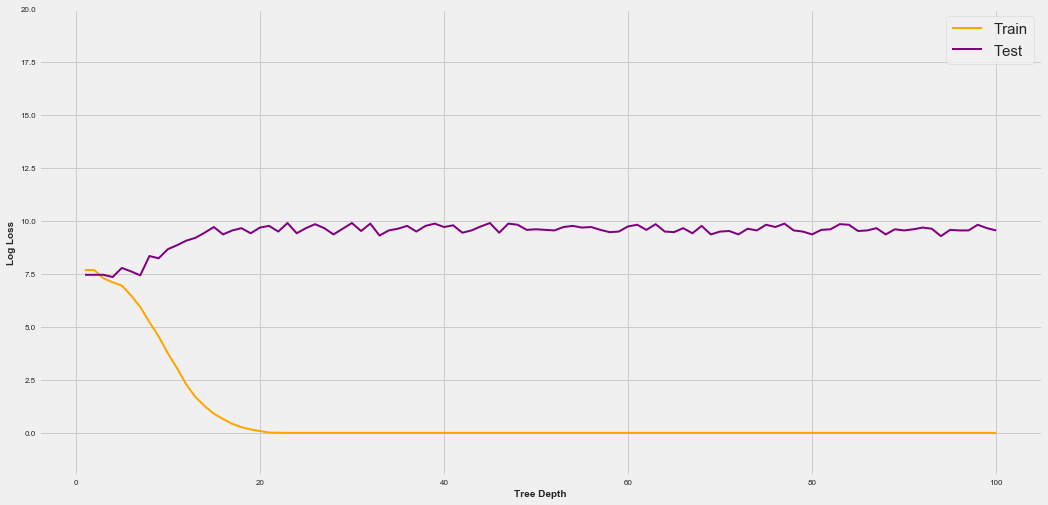

In [715]:
import seaborn as sns
import matplotlib.pyplot as plt

#fmri = sns.load_dataset("fmri")
ax = sns.lineplot(y="Log_loss_train", x="Tree Depth", data=performance,label='Train',color='orange')
ax= sns.lineplot(y='Log_loss_test', x='Tree Depth',data=performance,label='Test',color='purple')
ax.set_ylabel('Log Loss')
plt.ylim(-2.0,20)
ax.legend(fontsize=15)

In [716]:
opt_depth=performance[performance['Log_loss_test']==min(performance['Log_loss_test'])]['Tree Depth'].tolist()[0]

In [717]:
print("La profondità ottima dell'albero decisionale è: %.i"%(opt_depth))

La profondità ottima dell'albero decisionale è: 4


In [718]:
DTree = DecisionTreeClassifier(criterion = 'entropy', max_depth =3)


In [719]:
DTree=DTree.fit(X_train,t_train)

In [720]:
df=dataset.copy()
df=df.drop(columns=['target'])

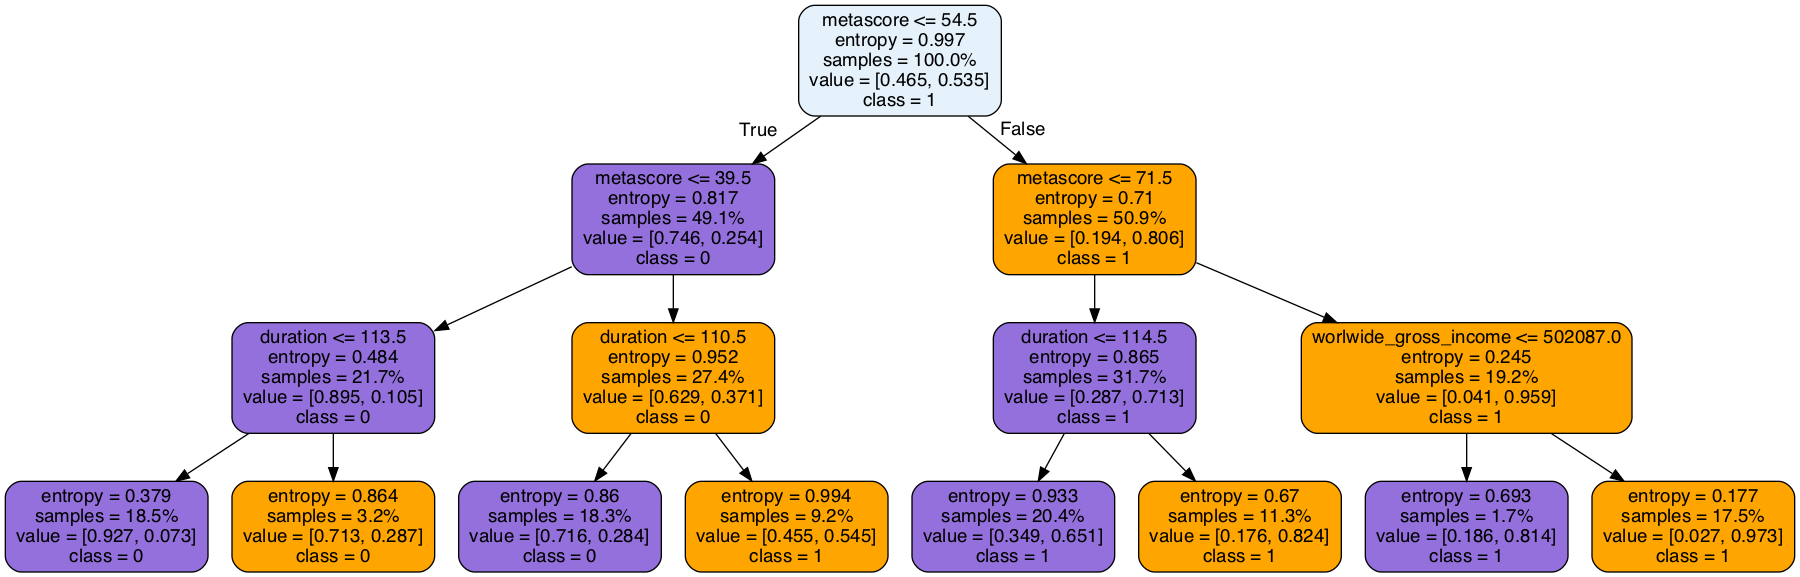

In [721]:
dot_data = StringIO()
export_graphviz(DTree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=False,feature_names = df.columns ,class_names=['0','1'],proportion=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 


colors = ('mediumpurple', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

Image(graph.create_png())

In [722]:
model=DecisionTreeClassifier(criterion='gini',max_depth=opt_depth)

In [723]:
model=model.fit(X_train,t_train)

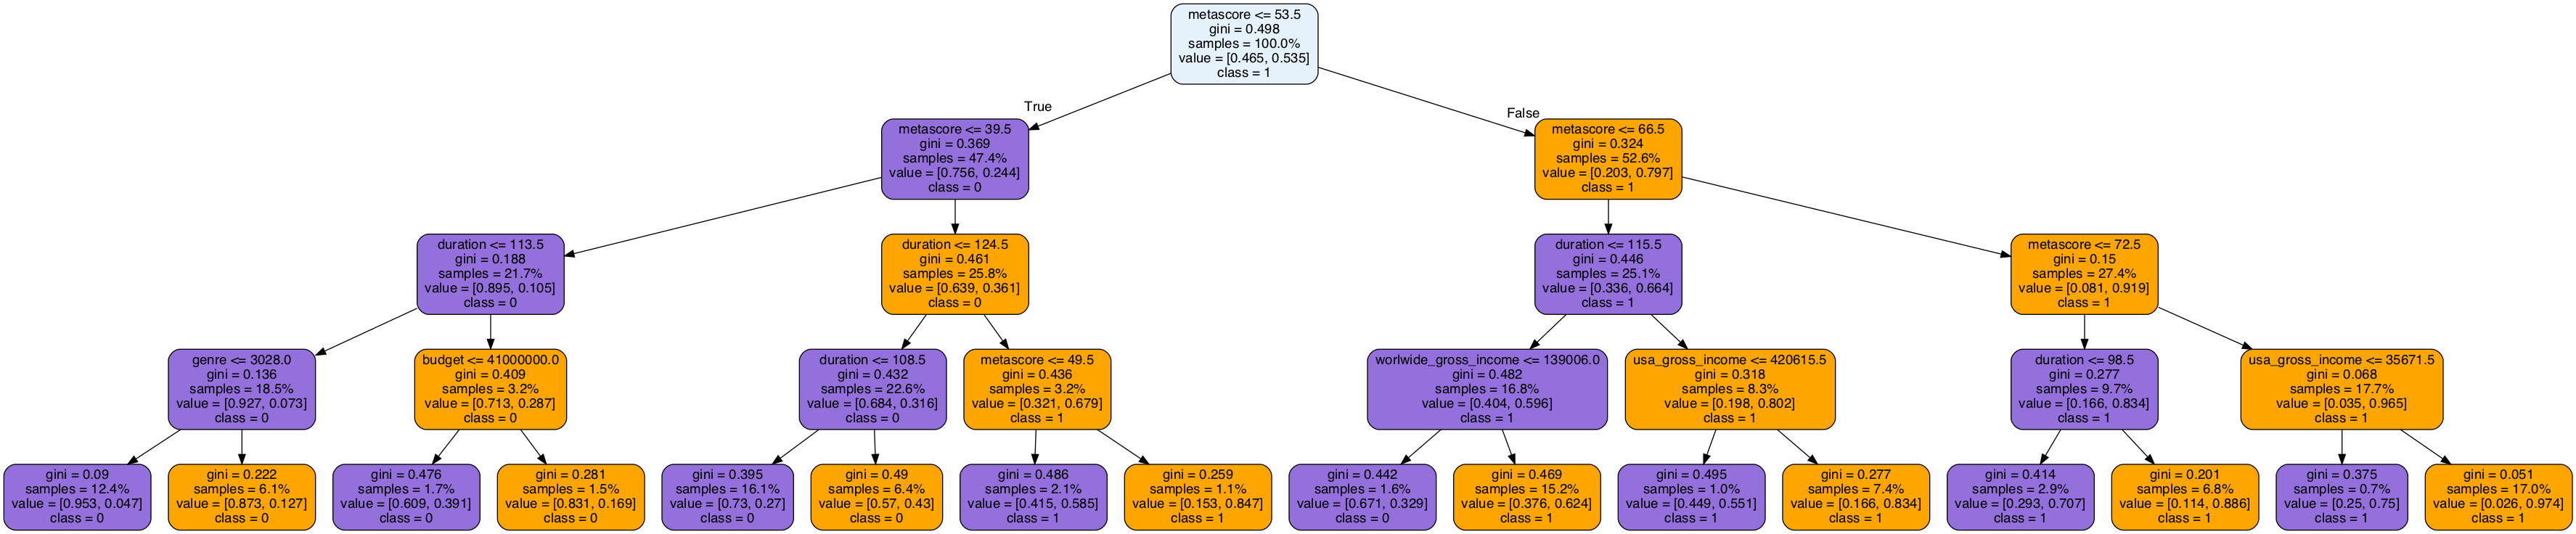

In [724]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=False,feature_names = df.columns ,class_names=['0','1'],proportion=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 


colors = ('mediumpurple', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])
graph.write_png('DecisionTree.png')

Image(graph.create_png())

In [725]:
p_train = model.predict(X_train)
p_test = model.predict(X_test)
cm_train = confusion_matrix(t_train,p_train)
cm_test = confusion_matrix(t_test,p_test)

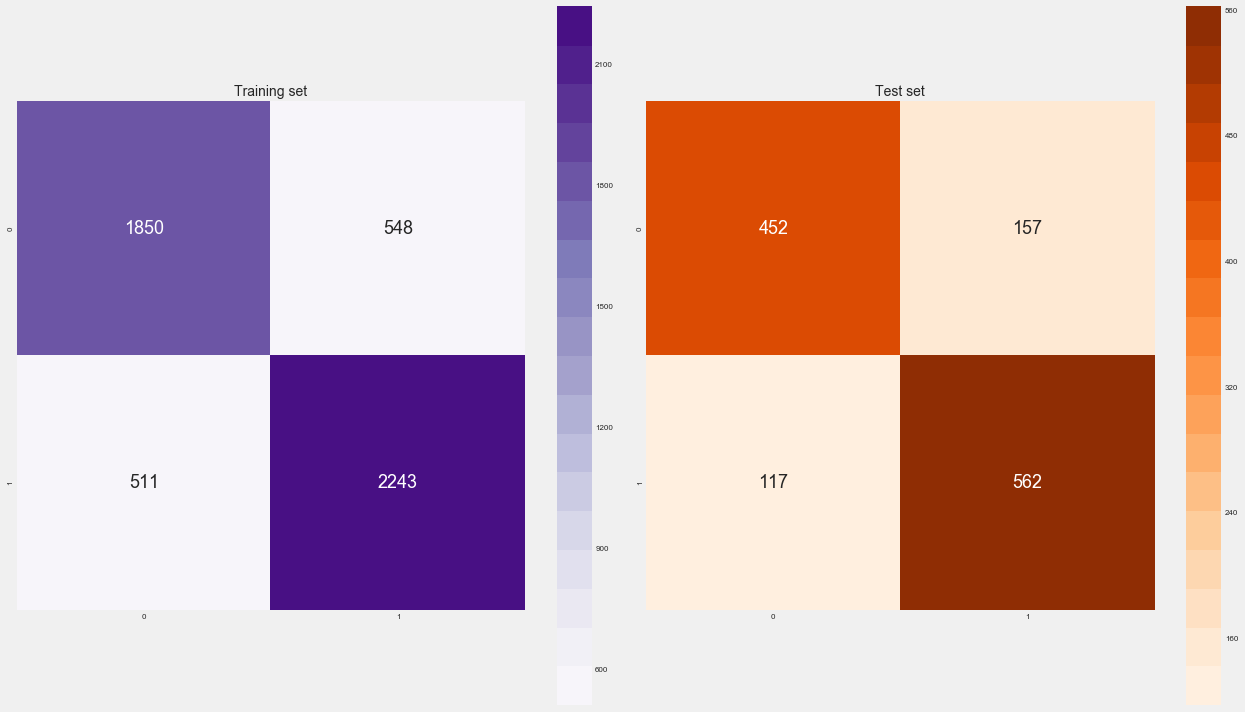

In [726]:
plt.figure(figsize=(18,10))
plt.subplot(1,2,1)
hm = sns.heatmap(cm_train,cbar=True,annot=True,square=True,fmt='d',annot_kws={'size': 18},cmap = sns.color_palette("Purples", 18))
plt.title('Training set', fontsize=14)
plt.subplot(1,2,2)
hm = sns.heatmap(cm_test,cbar=True,annot=True,square=True,fmt='d',annot_kws={'size': 18},cmap = sns.color_palette("Oranges", 18))
plt.title('Test set', fontsize=14)
plt.tight_layout()
plt.show()

In [727]:
print('TRAINING SET')
m = precision_recall_fscore_support(p_train,t_train)
print('Precision class 0 = {0:5.4f}'.format(m[0][0]))
print('Precision class 1 = {0:5.4f}'.format(m[0][1]))
print('Recall class 0 = {0:5.4f}'.format(m[1][0]))
print('Recall class 1 = {0:5.4f}'.format(m[1][1]))
print('F-score class 0 = {0:5.4f}'.format(m[2][0]))
print('F-score class 1 = {0:5.4f}'.format(m[2][1]))
print('Accuracy = {0:5.4f}'.format(accuracy_score(p_train,t_train)))

TRAINING SET
Precision class 0 = 0.7715
Precision class 1 = 0.8145
Recall class 0 = 0.7836
Recall class 1 = 0.8037
F-score class 0 = 0.7775
F-score class 1 = 0.8090
Accuracy = 0.7944


In [728]:
print('TEST SET')

m = precision_recall_fscore_support(p_test,t_test)
print('Precision class 0 = {0:5.4f}'.format(m[0][0]))
print('Precision class 1 = {0:5.4f}'.format(m[0][1]))
print('Recall class 0 = {0:5.4f}'.format(m[1][0]))
print('Recall class 1 = {0:5.4f}'.format(m[1][1]))
print('F-score class 0 = {0:5.4f}'.format(m[2][0]))
print('F-score class 1 = {0:5.4f}'.format(m[2][1]))
print('Accuracy = {0:5.4f}'.format(accuracy_score(p_test,t_test)))

TEST SET
Precision class 0 = 0.7422
Precision class 1 = 0.8277
Recall class 0 = 0.7944
Recall class 1 = 0.7816
F-score class 0 = 0.7674
F-score class 1 = 0.8040
Accuracy = 0.7873


In [729]:
model=DecisionTreeClassifier(criterion='gini',max_depth=opt_depth).fit(X_train,t_train)
F_imp =model.feature_importances_


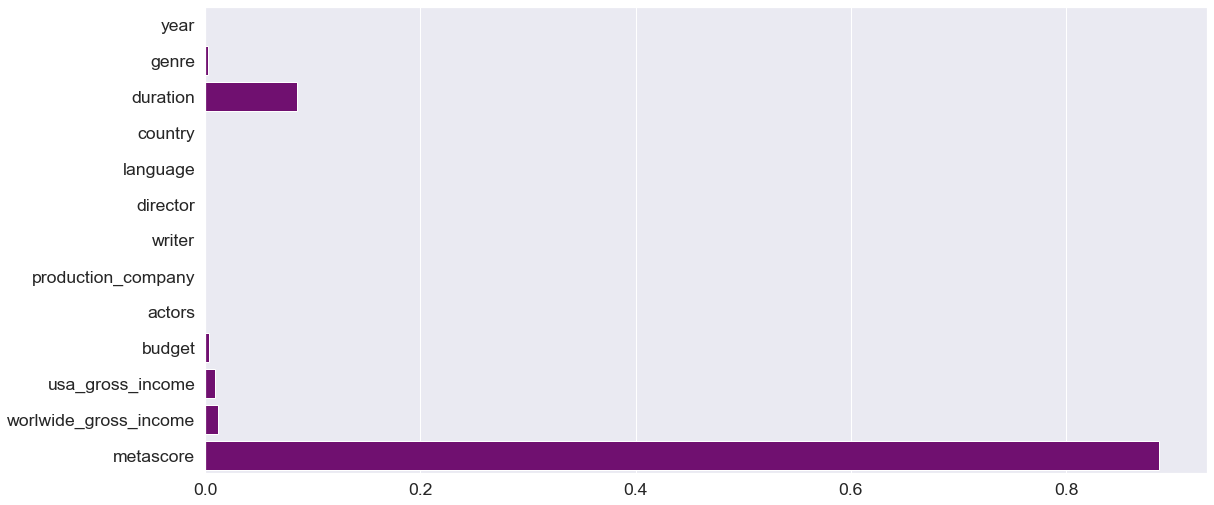

In [730]:
sns.set(font_scale=1.6)

ax=sns.barplot(y = df.columns, x = F_imp, color="purple")


In [731]:
df=df.drop(columns=['metascore'])

In [732]:
new_X_train=[]
for i in range(len(X_train)):
    new_X_train.append(X_train[i][:-1].tolist())

In [733]:
model=DecisionTreeClassifier(criterion='gini',max_depth=opt_depth).fit(new_X_train,t_train)
F_imp_small =model.feature_importances_


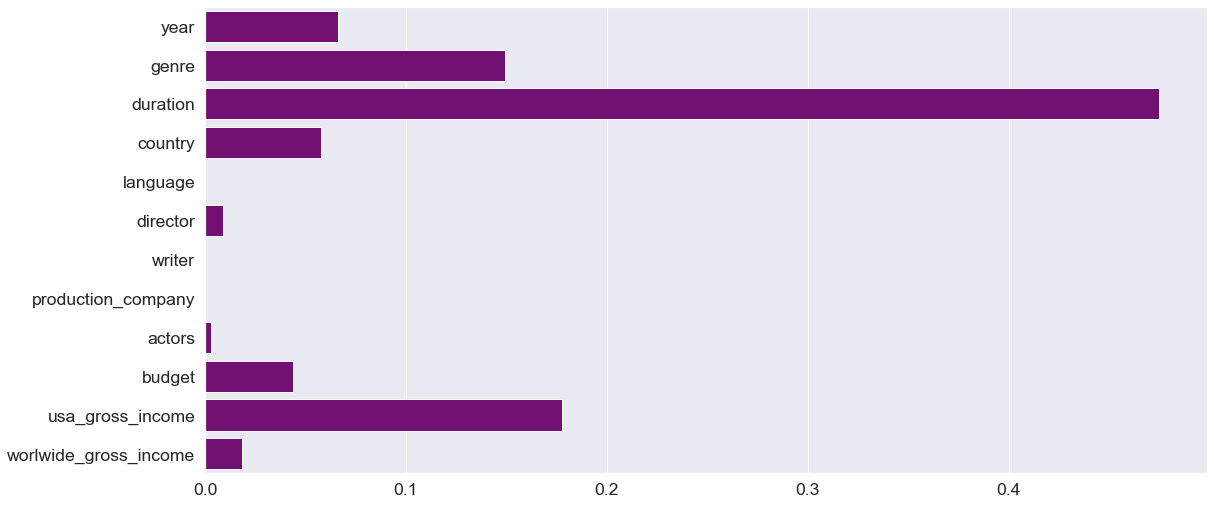

In [734]:
sns.set(font_scale=1.6)

ax=sns.barplot(y = df.columns, x = F_imp_small, color="purple")

In [914]:
X_k_fold=dataset.drop(columns=['target'])
Y_k_fold=dataset['target']
X_k_fold,Y_k_fold=X_k_fold.values,Y_k_fold.values
kf= KFold(n_splits=5)
SCORES=[]
ACCURACY=[]
for train_index, test_index in kf.split(X_k_fold):
    X_k_train, X_k_test = X_k_fold[train_index], X_k_fold[test_index]
    t_k_train, t_k_test = Y_k_fold[train_index], Y_k_fold[test_index]
    model=DecisionTreeClassifier(criterion='gini',max_depth=opt_depth).fit(X_train,t_train)
    model = model.fit(X_k_train,t_k_train)
    m = precision_recall_fscore_support(model.predict(X_k_test),t_k_test)
    ACCURACY.append(accuracy_score(model.predict(X_k_test),t_k_test))
    SCORES.append(m)
P_0=[]
P_1=[]
F_S_0=[]
F_S_1=[]
R_0=[]
R_1=[]


for i in range(len(SCORES)):
    P_0.append(SCORES[i][0][0])
    P_1.append(SCORES[i][0][1])
    R_0.append(SCORES[i][1][0])
    R_1.append(SCORES[i][1][1])
    F_S_0.append(SCORES[i][2][0])
    F_S_1.append(SCORES[i][2][1])
p_0=np.array(P_0).mean()
p_1=np.array(P_1).mean()
f_s_0=np.array(F_S_0).mean()
f_s_1=np.array(F_S_1).mean()
r_0=np.array(R_0).mean()
r_1=np.array(R_1).mean()
accuracy=np.array(ACCURACY).mean()
PERFORMANCES=[p_0,p_1,f_s_0,f_s_1,r_0,r_1,accuracy]
perf_title=['precisione classe 0','precisione classe 1','f_measure classe 0',
           'f_measure classe 1','recall classe 0','recall classe 1','accuracy']
for i in range(len(PERFORMANCES)):
    print("La %s del modello %s è %f" %(perf_title[i],ALG[5],PERFORMANCES[i]))
TOT_PERFORMANCE.append(PERFORMANCES)

La precisione classe 0 del modello DecisionTree è 0.758544
La precisione classe 1 del modello DecisionTree è 0.795193
La f_measure classe 0 del modello DecisionTree è 0.761488
La f_measure classe 1 del modello DecisionTree è 0.792363
La recall classe 0 del modello DecisionTree è 0.764959
La recall classe 1 del modello DecisionTree è 0.789943
La accuracy del modello DecisionTree è 0.778106


## 2.7 Random Forest 

Il metodo dei Random Forest è un particolare __metodo di ensemble di tipo bagging__. 

I metodi di ensemple consistono nell'utilizzo di più modelli di classificazione o predizione, invece di un modello singolo. 

In particolare la tipologia bagging prevede l'implementazione di più modelli in parallelo e la classificazione (o la predizione di un valore) finale tramite la classe più "scelta" dai singoli modelli (o dalla media delle predizioni singole). In questa tipologia di ensemble, i classificatori appartengono tutti allo stesso modello (nel nostro caso __decision tree__) ma sono istanziati tramite diversi valori estratti dallo stesso dataset.

Il metodo di ensemble risulta particolarmente efficace quando, come nel caso dei decision tree, i modelli singoli dipendono in modo sensibile dal training set.
Infatti negli alberi decisionali piccole variazioni dei dati di training comportano grandi variazioni nell'albero finale: i modelli presentano un'alta varianza nella classificazione. Inoltre è possibile dimostrare che l'errore di un esemble di tipo bagging tende a 0 quando il numero di modelli tende a infinito. 
***

Si consideri a tale scopo un insieme $B$ di classificatori "deboli" e cioè con un accuracy del 60%. Dunque dato ad esempio un task di classificatore binaria ciascun modello classificherà con il 40% di probabilità ($\epsilon=0.4$) un elemento appartenente alla classe 1 come un elemento appartenente alla classe 0.Sia $B_0$ il numero di classificatori che classificano "male" un certo elemento $x$. La probabilità di pescare tra i vari classificatore uno dei $B_0$ classificatori risulta essere:
\begin{equation}
B_0\sim \text{Binomial}(B,\epsilon)
\end{equation}

Poichè un elemento è classificato per maggioranza, la probabilità di predire la classe sbagliata è:
\begin{equation}
p\Big{(}B_0>\frac{B}{2}\Big{)}=\sum_{k=\frac{B}{2}+1}^{B} \binom{B}{k}\epsilon^{k}(1-\epsilon)^{B-k}
\end{equation}
E dunque $p\Big{(}B_0>\frac{B}{2}\Big{)}\rightarrow 0$ con $B\rightarrow\infty$
***
Per costruire diversi training set si utilizza la tecnica del __bootstrap sampling__.
Il Bootstrap è un metodo statistico di resampling (sampling dallo stesso dataset). A partire dunque da un dataset a disposizione si costruiscono $K$ insiemi ognuno rappresentativo dell'insieme iniziale. Per effettuare questo sampling si ipotizza  una distribuzione di probabilità uniforme essere rappresentativa della distribuzione reale dei punti nel dataset: 
\begin{equation}
p(x,t)=\frac{1}{n}  \text{        if        } \exists i: (x,t)=(x_i,t_i)  
\end{equation}

Utilizzando questa distribuzione di probabilità (con possibilità di ripescaggio e quindi forzando l'ipotesi di indipendenza tra gli elementi) si campionano $n$ valori per ogni bootstrap.

Naturalmente i $K$ training set sono diversi tra di loro, e dunque risulteranno diversi i corrispondenti test set. Pertanto per effettuare una predizione su un punto verranno considerati solo gli alberi che presentano quel punto nel test set (per $n\rightarrow \infty$, circa il 37% degli alberi). 

Il metodo di Random Forest è una particolare tecnica di bagging che utilizza $B$ alberi di decisione in parallelo. 
Ogni albero di decisione avrà però a disposizione solo $m$ variabili scelte in modo randomico su cui poter effettuare gli split e dividere il dataset. Questa scelta è dovuta all'idea di aggiungere randomicità ulteriore ai vari modelli individuando strutture diverse per ogni bootstrap.

Come spiegato in precedenza, l'assegnazione della classe per ogni elemento $x$ del test set è effettuata a maggioranza.

(0.6, 0.8)

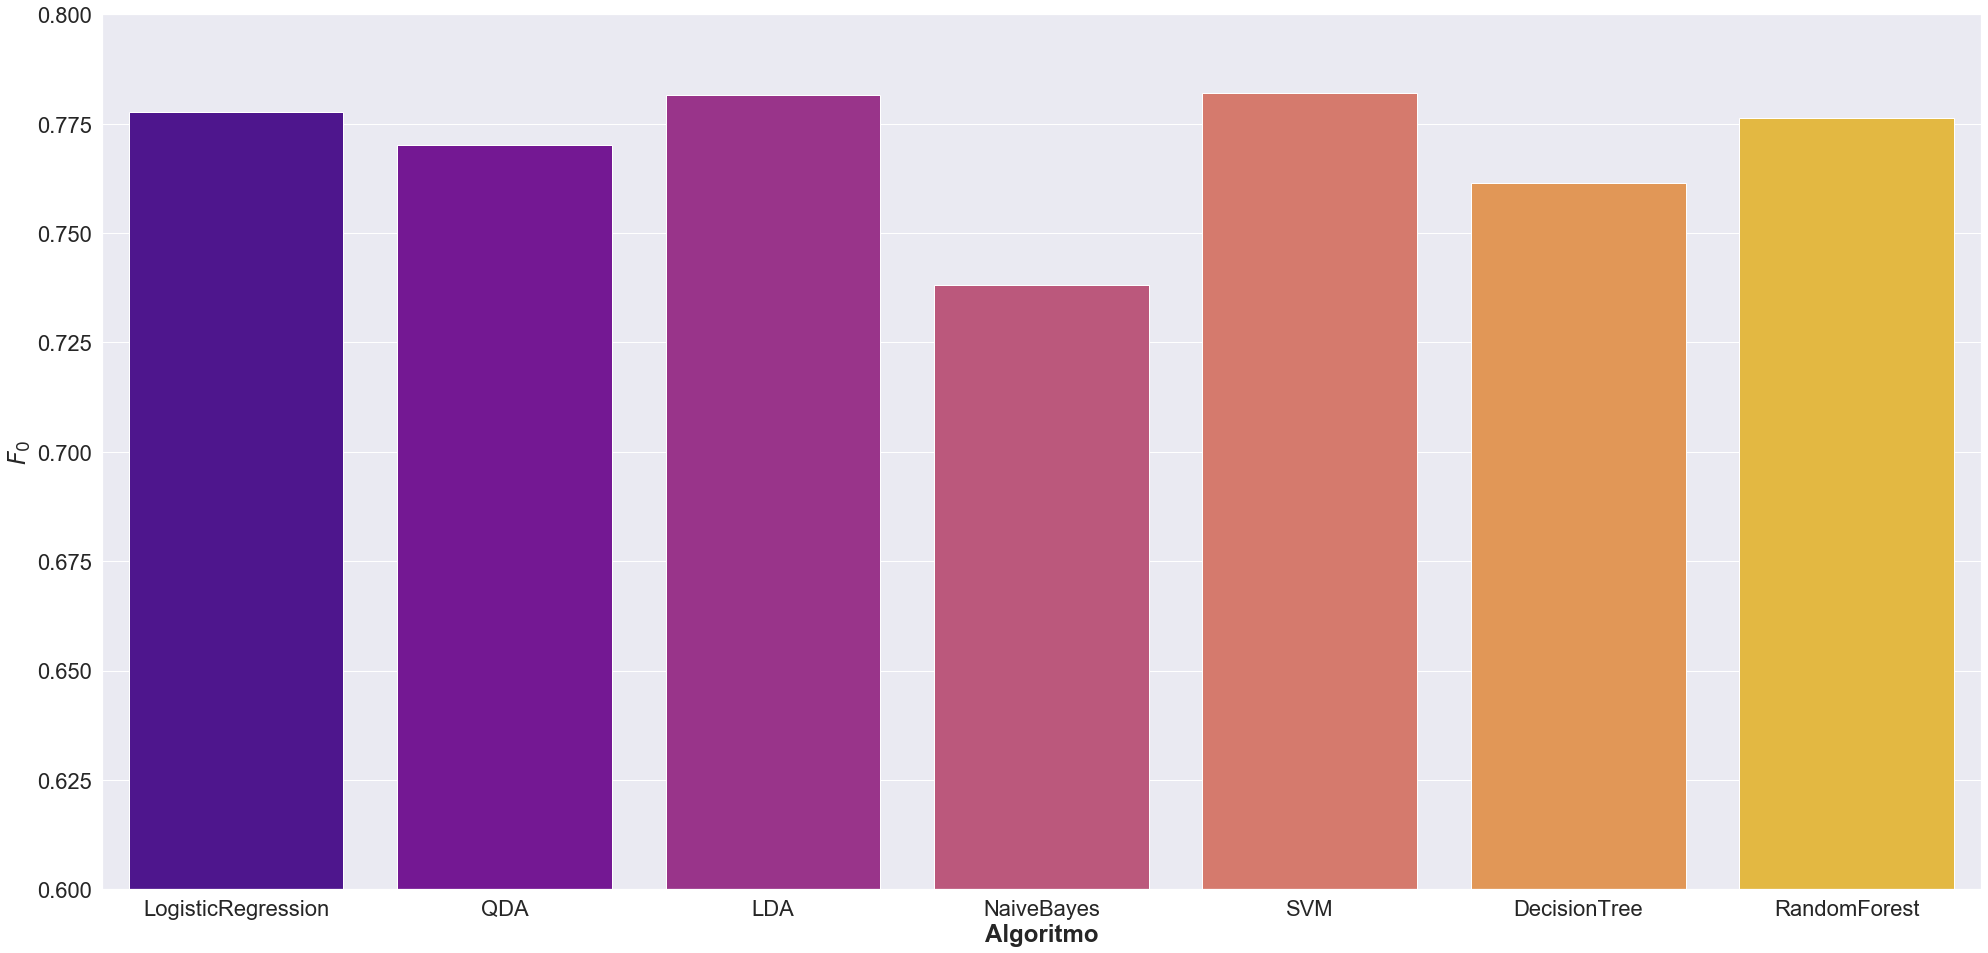

In [957]:
F=pd.DataFrame()
F['$F_0$']=TOT_F_M_0
F['Algoritmo']=ALG
a4_dims = (30, 15)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set(font_scale=2.0)  # crazy big

ax = sns.barplot(x="Algoritmo", y="$F_0$",palette='plasma',data=F)
plt.ylim(0.60,0.80)

In [891]:
model=RandomForestClassifier(n_estimators=200,criterion='gini',max_depth=opt_depth)

In [892]:
model=model.fit(X_train,t_train)

In [893]:
p_train = model.predict(X_train)
p_test = model.predict(X_test)
cm_train = confusion_matrix(t_train,p_train)
cm_test = confusion_matrix(t_test,p_test)

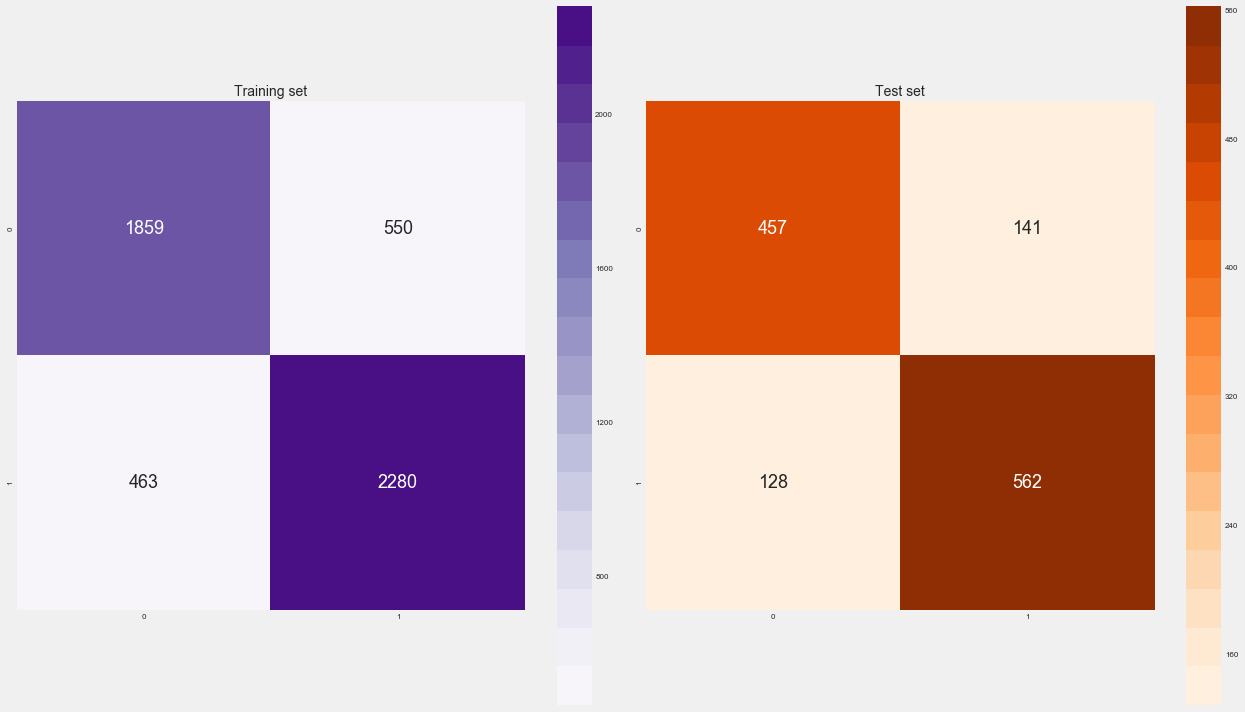

In [894]:
plt.figure(figsize=(18,10))
plt.subplot(1,2,1)
hm = sns.heatmap(cm_train,cbar=True,annot=True,square=True,fmt='d',annot_kws={'size': 18},cmap = sns.color_palette("Purples", 18))
plt.title('Training set', fontsize=14)
plt.subplot(1,2,2)
hm = sns.heatmap(cm_test,cbar=True,annot=True,square=True,fmt='d',annot_kws={'size': 18},cmap = sns.color_palette("Oranges", 18))
plt.title('Test set', fontsize=14)
plt.tight_layout()
plt.show()

In [895]:
print('TRAINING SET')
m = precision_recall_fscore_support(p_train,t_train)
print('Precision class 0 = {0:5.4f}'.format(m[0][0]))
print('Precision class 1 = {0:5.4f}'.format(m[0][1]))
print('Recall class 0 = {0:5.4f}'.format(m[1][0]))
print('Recall class 1 = {0:5.4f}'.format(m[1][1]))
print('F-score class 0 = {0:5.4f}'.format(m[2][0]))
print('F-score class 1 = {0:5.4f}'.format(m[2][1]))
print('Accuracy = {0:5.4f}'.format(accuracy_score(p_train,t_train)))

TRAINING SET
Precision class 0 = 0.7717
Precision class 1 = 0.8312
Recall class 0 = 0.8006
Recall class 1 = 0.8057
F-score class 0 = 0.7859
F-score class 1 = 0.8182
Accuracy = 0.8034


In [896]:
print('TEST SET')

m = precision_recall_fscore_support(p_test,t_test)
print('Precision class 0 = {0:5.4f}'.format(m[0][0]))
print('Precision class 1 = {0:5.4f}'.format(m[0][1]))
print('Recall class 0 = {0:5.4f}'.format(m[1][0]))
print('Recall class 1 = {0:5.4f}'.format(m[1][1]))
print('F-score class 0 = {0:5.4f}'.format(m[2][0]))
print('F-score class 1 = {0:5.4f}'.format(m[2][1]))
print('Accuracy = {0:5.4f}'.format(accuracy_score(p_test,t_test)))

TEST SET
Precision class 0 = 0.7642
Precision class 1 = 0.8145
Recall class 0 = 0.7812
Recall class 1 = 0.7994
F-score class 0 = 0.7726
F-score class 1 = 0.8069
Accuracy = 0.7911


In [915]:
X_k_fold=dataset.drop(columns=['target'])
Y_k_fold=dataset['target']
X_k_fold,Y_k_fold=X_k_fold.values,Y_k_fold.values
kf= KFold(n_splits=5)
SCORES=[]
ACCURACY=[]
for train_index, test_index in kf.split(X_k_fold):
    X_k_train, X_k_test = X_k_fold[train_index], X_k_fold[test_index]
    t_k_train, t_k_test = Y_k_fold[train_index], Y_k_fold[test_index]
    model=RandomForestClassifier(n_estimators=200,criterion='gini',max_depth=opt_depth)
    model = model.fit(X_k_train,t_k_train)
    m = precision_recall_fscore_support(model.predict(X_k_test),t_k_test)
    ACCURACY.append(accuracy_score(model.predict(X_k_test),t_k_test))
    SCORES.append(m)
P_0=[]
P_1=[]
F_S_0=[]
F_S_1=[]
R_0=[]
R_1=[]


for i in range(len(SCORES)):
    P_0.append(SCORES[i][0][0])
    P_1.append(SCORES[i][0][1])
    R_0.append(SCORES[i][1][0])
    R_1.append(SCORES[i][1][1])
    F_S_0.append(SCORES[i][2][0])
    F_S_1.append(SCORES[i][2][1])
p_0=np.array(P_0).mean()
p_1=np.array(P_1).mean()
f_s_0=np.array(F_S_0).mean()
f_s_1=np.array(F_S_1).mean()
r_0=np.array(R_0).mean()
r_1=np.array(R_1).mean()
accuracy=np.array(ACCURACY).mean()
PERFORMANCES=[p_0,p_1,f_s_0,f_s_1,r_0,r_1,accuracy]
perf_title=['precisione classe 0','precisione classe 1','f_measure classe 0',
           'f_measure classe 1','recall classe 0','recall classe 1','accuracy']
for i in range(len(PERFORMANCES)):
    print("La %s del modello %s è %f" %(perf_title[i],ALG[6],PERFORMANCES[i]))
TOT_PERFORMANCE.append(PERFORMANCES)

La precisione classe 0 del modello RandomForest è 0.766996
La precisione classe 1 del modello RandomForest è 0.817523
La f_measure classe 0 del modello RandomForest è 0.776341
La f_measure classe 1 del modello RandomForest è 0.808667
La recall classe 0 del modello RandomForest è 0.786375
La recall classe 1 del modello RandomForest è 0.800327
La accuracy del modello RandomForest è 0.793789


# 3. Model Selection 

Dopo aver utilizzato i metodi di Machine Learning sopra spiegati, le performance che sono state raccolte con l'utilizzo di __K-fold cross validation__ con K=5 sono state analizzate per cercare, secondo le varie metriche di performance di un algoritmo, l'algoritmo migliore.
Ogni algoritmo avrà infatti prodotto le sue previsioni che sono state raccolte nella __matrice di confusione__. Questa matrice sarà riempita nel seguente modo:
* Riga 1, Colonna 1: Il numero di elementi del dataset di classe 0 correttamente classificati dall'algoritmo (Veri negativi o TN)
* Riga 1, Colonna 2: Il numero di elementi del dataset di classe 0 malclassificati dall'algoritmo (Falsi positivi o FP) 
* Riga 2, Colonna 1: Il numero di elementi del dataset di classe 1 malclassificati dall'algoritmo (Falsi negativi o FN)

* Riga 2, Colonna 2: Il numero di elementi del dataset di classe 1 correttamente classificati dall'algoritmo (Veri positivi o TP)

<img src="confmatrix.jpeg" style="height:230px">
Un perfetto algoritmo di classificazione presenta dunque una matrice diagonale in quanto non ha falsi positivi nè falsi negativi.

Le metriche utilizzate sono le seguenti:
* Accuracy = $\frac{(TP+TN)}{(TP+TN+FP+FN)}$ cioè il numero di veri positivi e di veri negativi diviso per il numero totale di positivi e negativi
* Recall = $\frac{TP}{TP+FN}$ e cioè il numero di positivi individuati dall'algoritmo diviso il numero totale di positivi
* Precision = $\frac{TP}{TP+FP}$ e cioè il numero di positivi individuati dall'algoritmo diviso il numero totale di positivi secondo l'algoritmo
* $F$ measure , ${\displaystyle F=2\cdot {\frac {\mathrm {precision} \cdot \mathrm {recall} }{\mathrm {precision} +\mathrm {recall} }}}$ e cioè la media armonica tra precision e recall

Si noti come la definizione di "positivo" e "negativo" possa essere invertita, ottenendo nuovi valori di precision e recall, relativi all'altra classe. 
In base a queste metriche, è possibile selezionare, per ciascuna di esse, l'algoritmo migliore.

In [967]:
TOT_PRECISION_0=[]
TOT_PRECISION_1=[]
TOT_F_M_0=[]
TOT_F_M_1=[]
TOT_R_0=[]
TOT_R_1=[]
TOT_ACC=[]
for i in range(len(TOT_PERFORMANCE)):
    TOT_PRECISION_0.append(TOT_PERFORMANCE[i][0])
    TOT_PRECISION_1.append(TOT_PERFORMANCE[i][1])
    TOT_F_M_0.append(TOT_PERFORMANCE[i][2])
    TOT_F_M_1.append(TOT_PERFORMANCE[i][3])
    TOT_R_0.append(TOT_PERFORMANCE[i][4])
    TOT_R_1.append(TOT_PERFORMANCE[i][5])
    TOT_ACC.append(TOT_PERFORMANCE[i][6])


In [968]:
T=[TOT_PRECISION_0,TOT_PRECISION_1,TOT_F_M_0,TOT_F_M_1,TOT_R_0,TOT_R_1,TOT_ACC]

(0.65, 0.85)

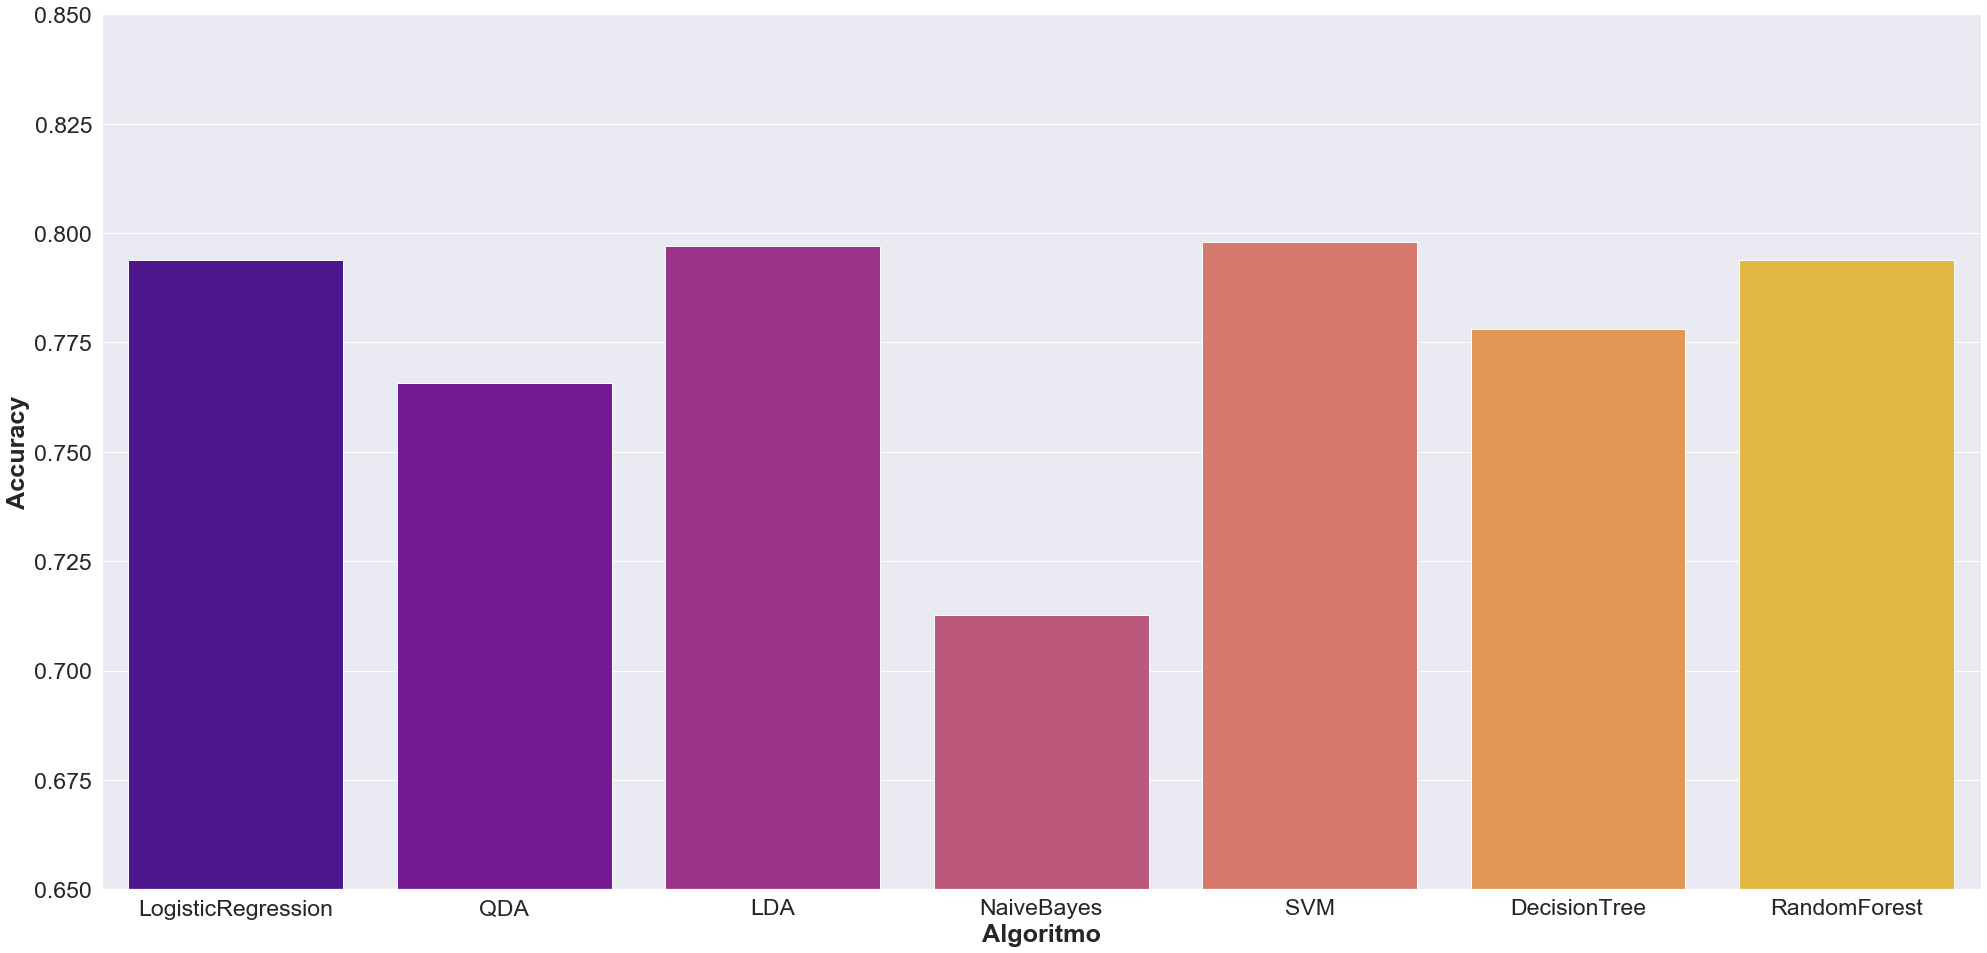

In [978]:
acc=pd.DataFrame()
acc['Accuracy']=TOT_ACC
acc['Algoritmo']=ALG
a4_dims = (30, 15)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set(font_scale=2.0)  # crazy big

ax = sns.barplot(x="Algoritmo", y="Accuracy",palette='plasma',data=acc)
plt.ylim(0.65,0.85)

(0.6, 0.83)

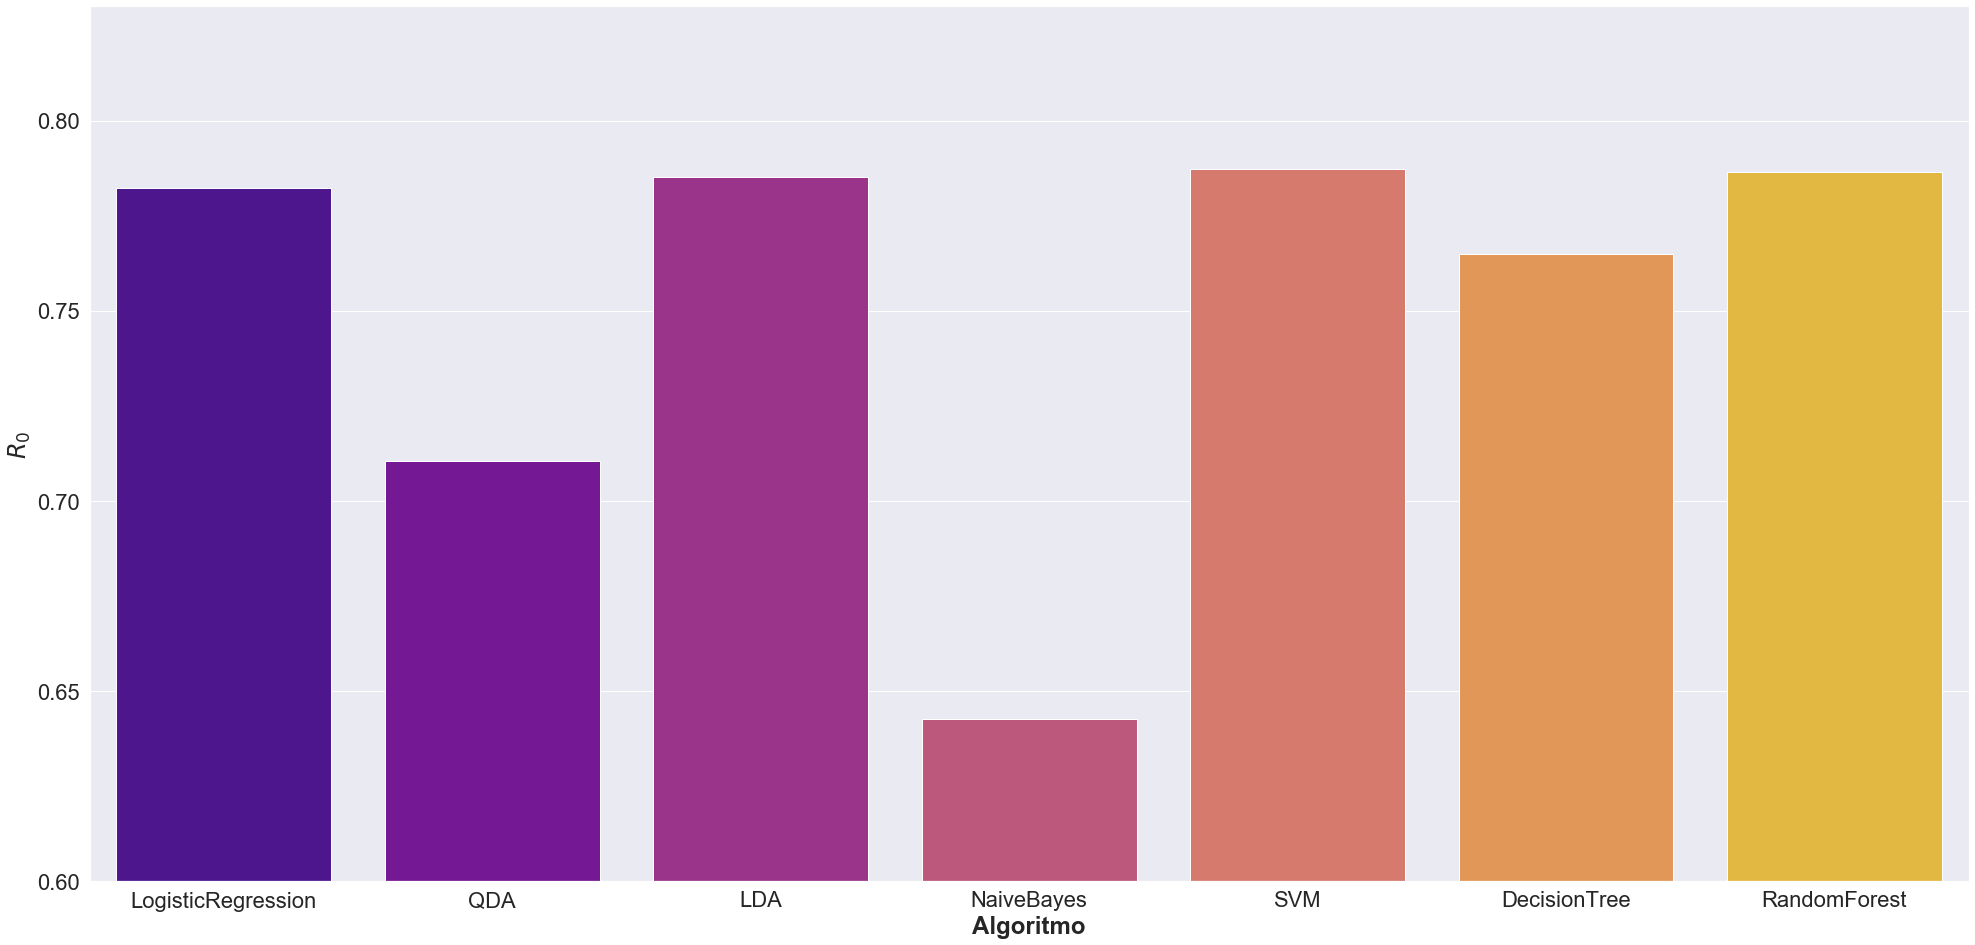

In [979]:
r0=pd.DataFrame()
r0['$R_0$']=TOT_R_0
r0['Algoritmo']=ALG
a4_dims = (30, 15)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set(font_scale=2.0)  # crazy big

ax = sns.barplot(x="Algoritmo", y="$R_0$",palette='plasma',data=r0)
plt.ylim(0.60,0.83)

(0.7, 0.85)

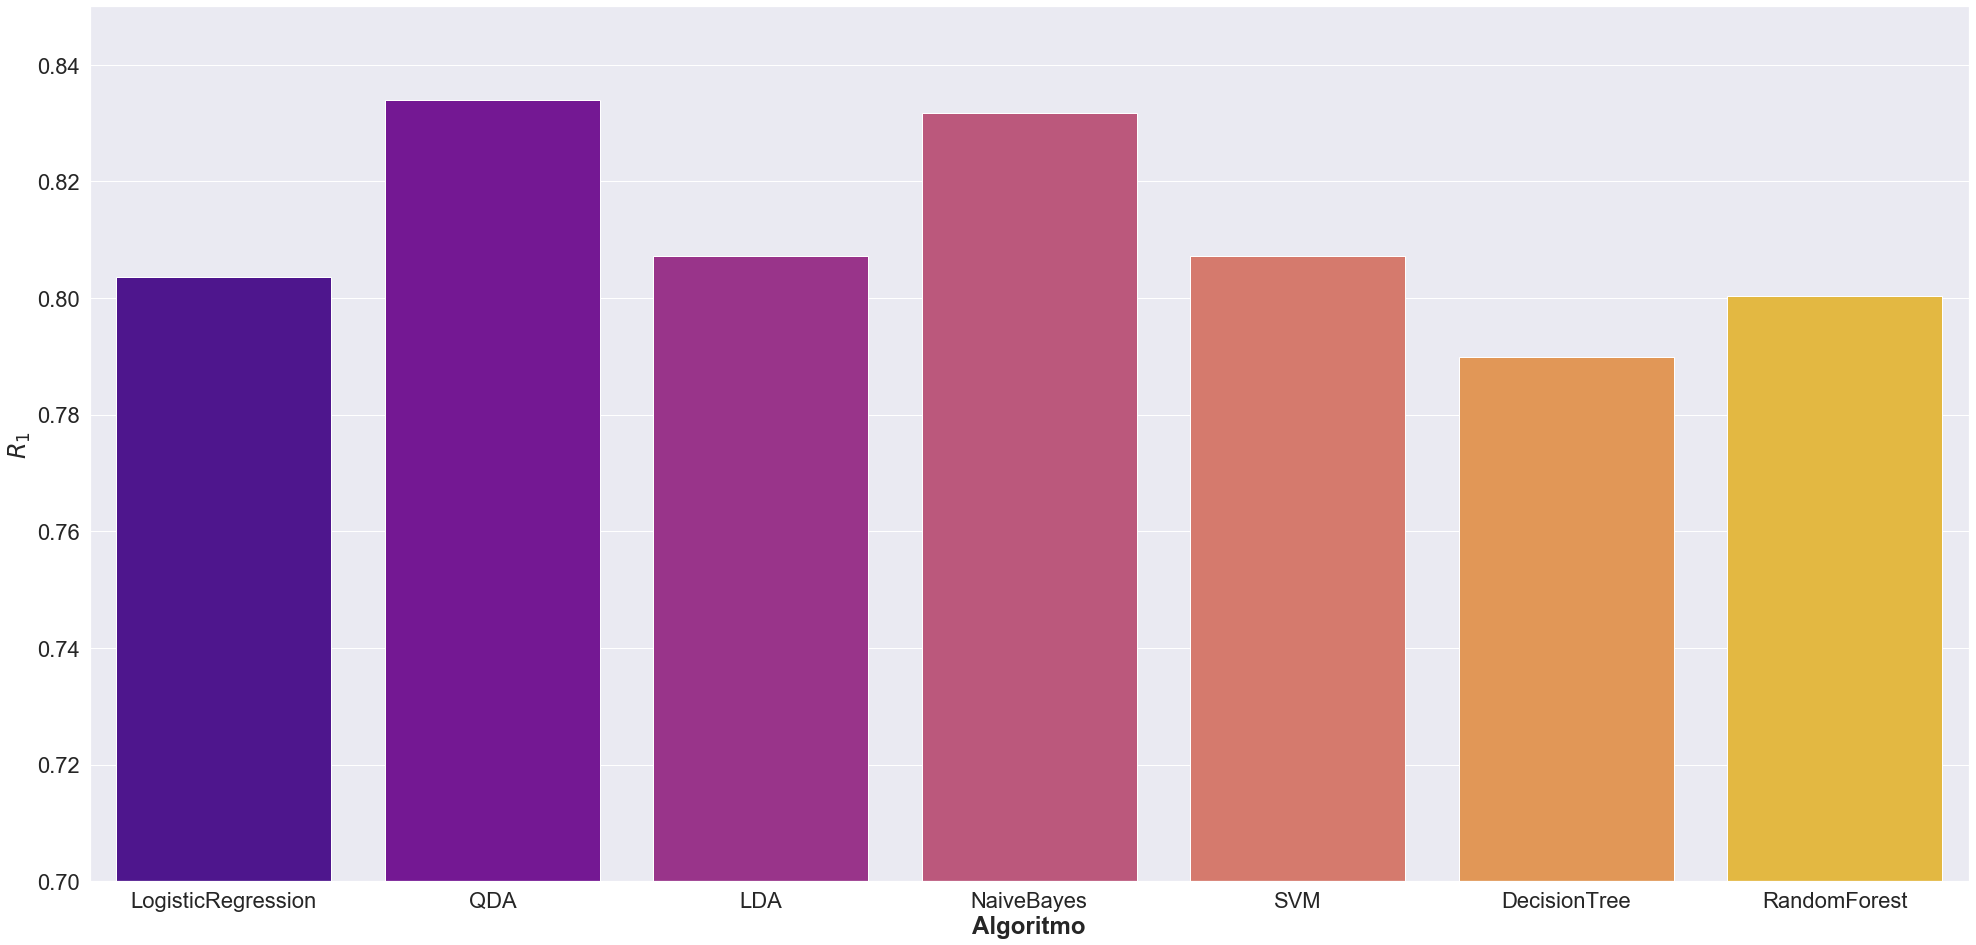

In [980]:
r1=pd.DataFrame()
r1['$R_1$']=TOT_R_1
r1['Algoritmo']=ALG
a4_dims = (30, 15)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set(font_scale=2.0)  # crazy big

ax = sns.barplot(x="Algoritmo", y="$R_1$",palette='plasma',data=r1)
plt.ylim(0.70,0.85)

(0.7, 0.89)

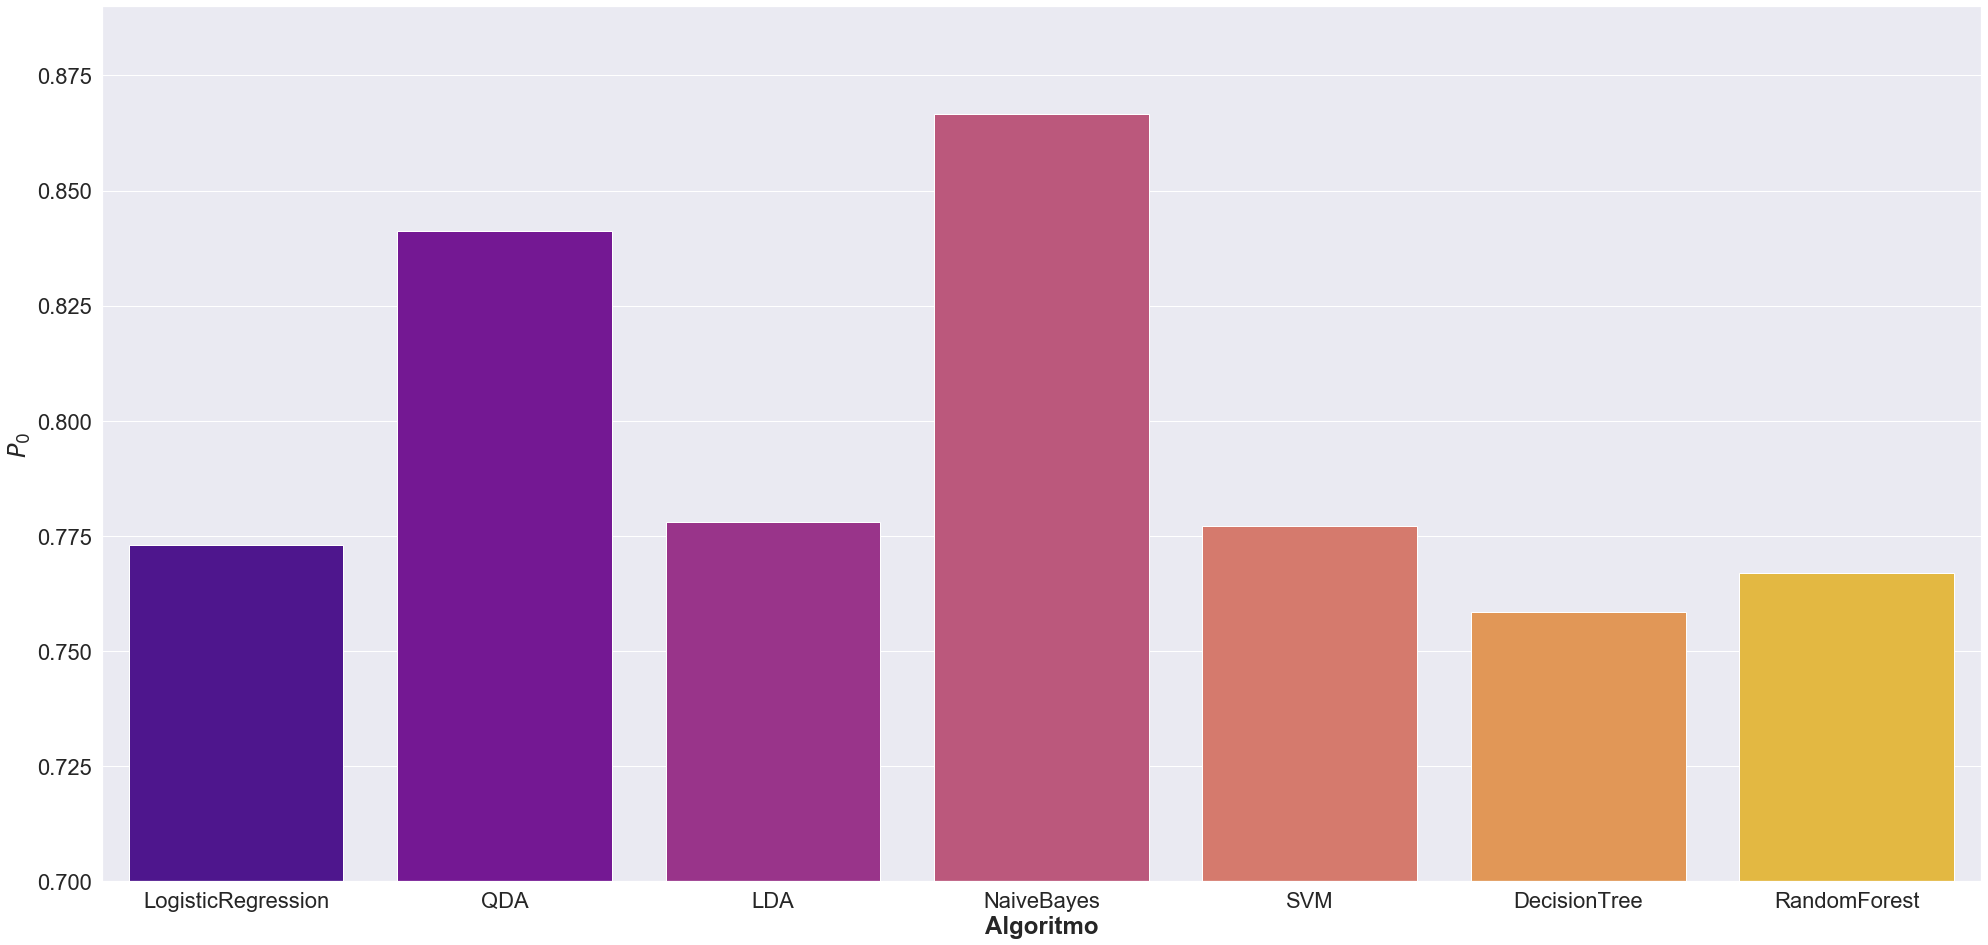

In [981]:
p0=pd.DataFrame()
p0['$P_0$']=TOT_PRECISION_0
p0['Algoritmo']=ALG
a4_dims = (30, 15)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set(font_scale=2.0)  # crazy big

ax = sns.barplot(x="Algoritmo", y="$P_0$",palette='plasma',data=p0)
plt.ylim(0.70,0.89)

(0.5, 0.85)

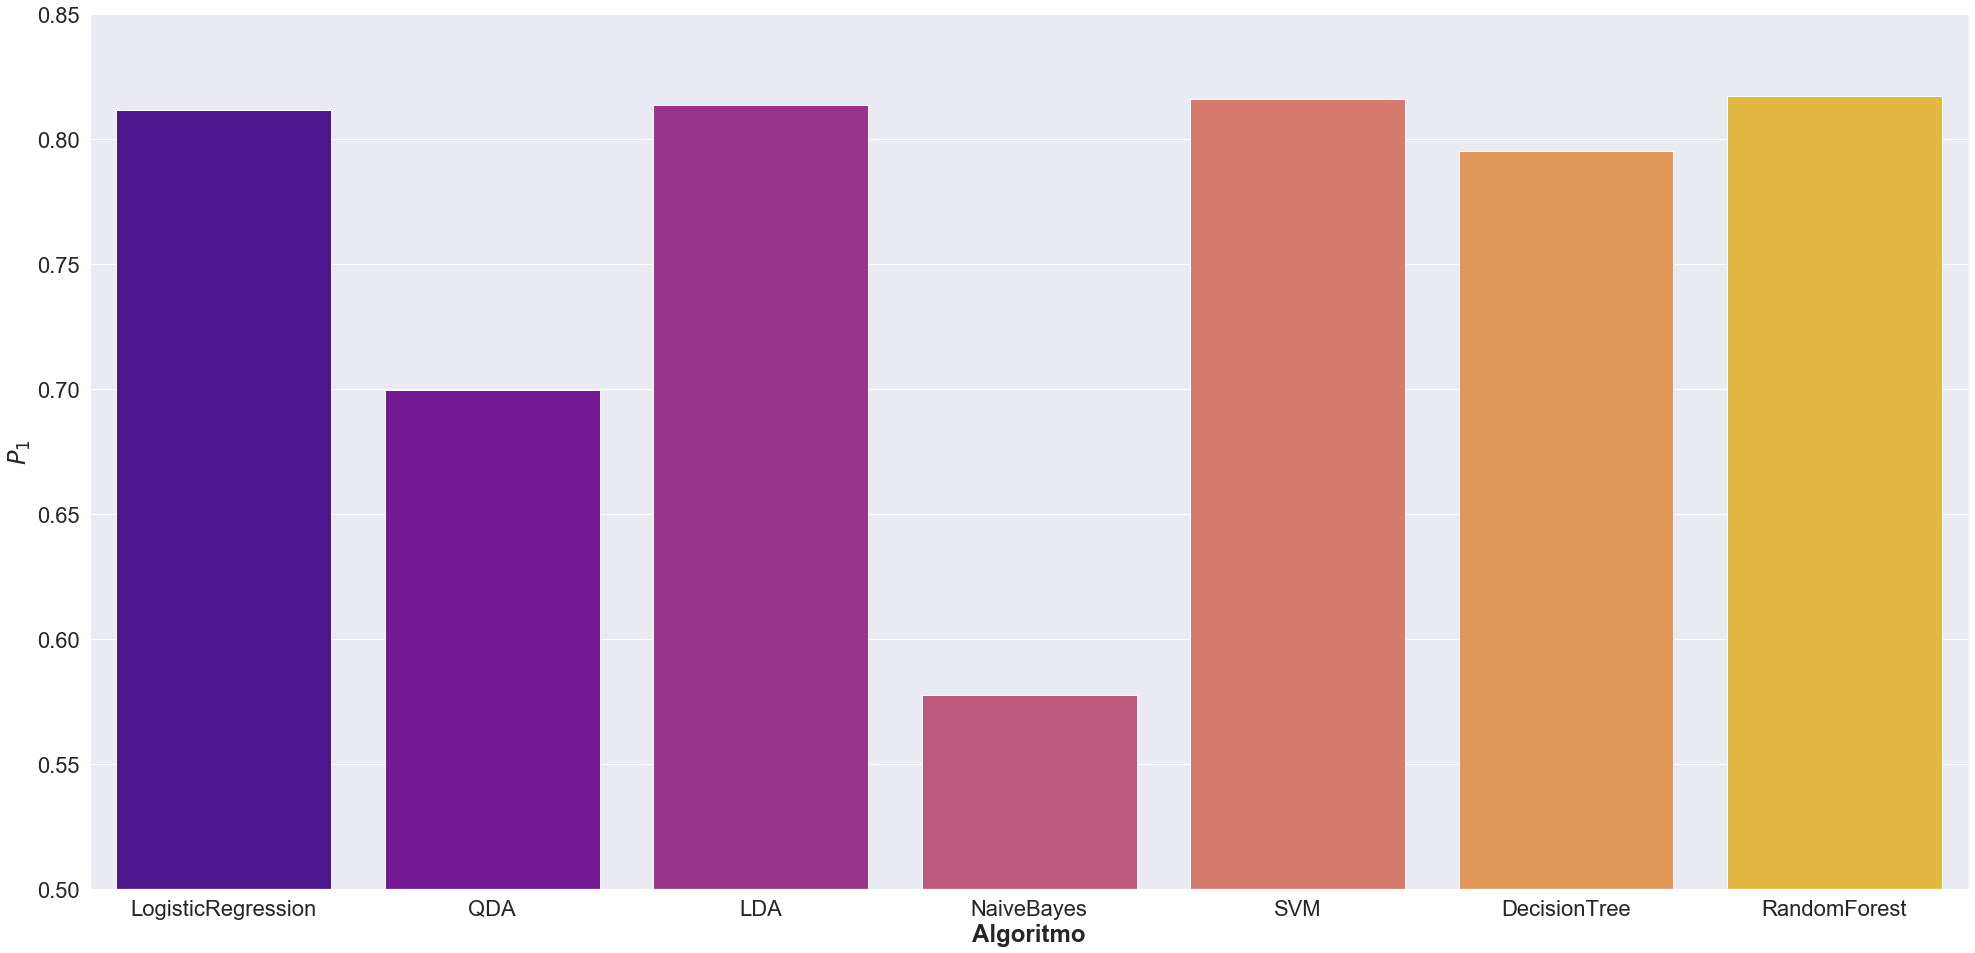

In [982]:
p1=pd.DataFrame()
p1['$P_1$']=TOT_PRECISION_1
p1['Algoritmo']=ALG
a4_dims = (30, 15)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set(font_scale=2.0)  # crazy big

ax = sns.barplot(x="Algoritmo", y="$P_1$",palette='plasma',data=p1)
plt.ylim(0.50,0.85)

(0.6, 0.8)

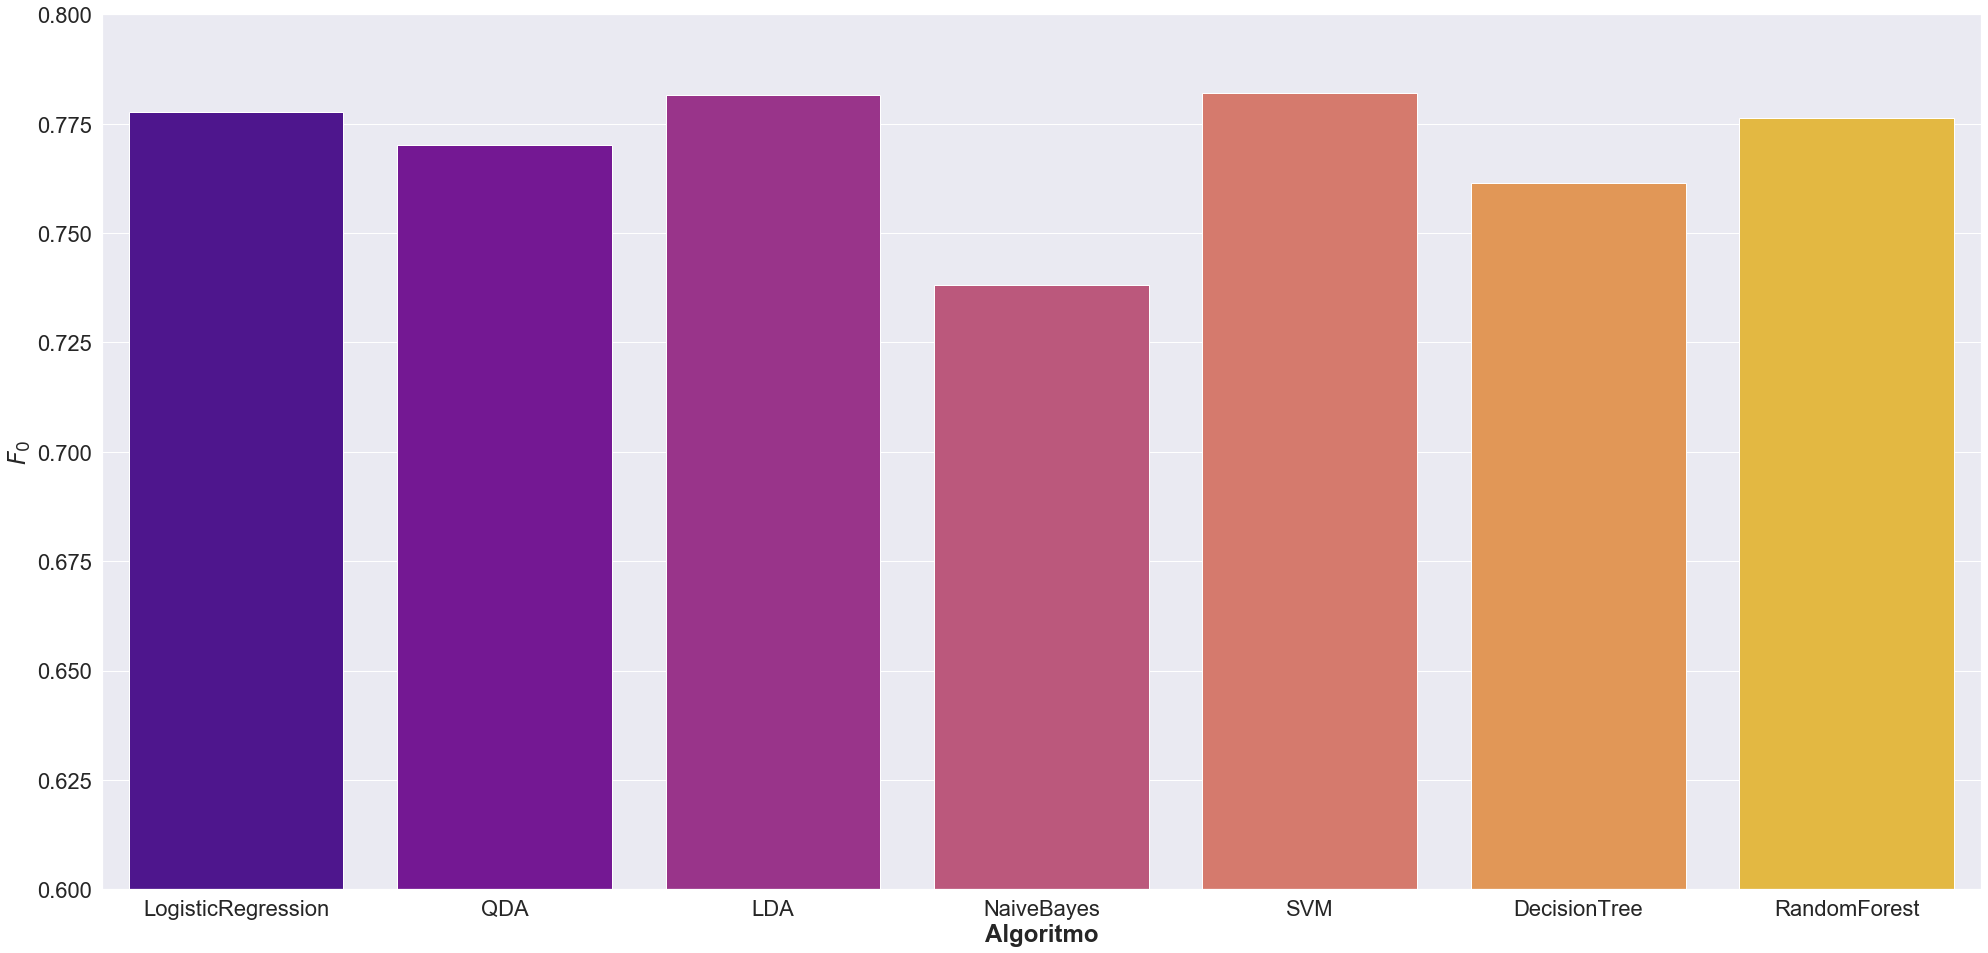

In [983]:
F=pd.DataFrame()
F['$F_0$']=TOT_F_M_0
F['Algoritmo']=ALG
a4_dims = (30, 15)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set(font_scale=2.0)  # crazy big

ax = sns.barplot(x="Algoritmo", y="$F_0$",palette='plasma',data=F)
plt.ylim(0.60,0.80)

(0.61, 0.85)

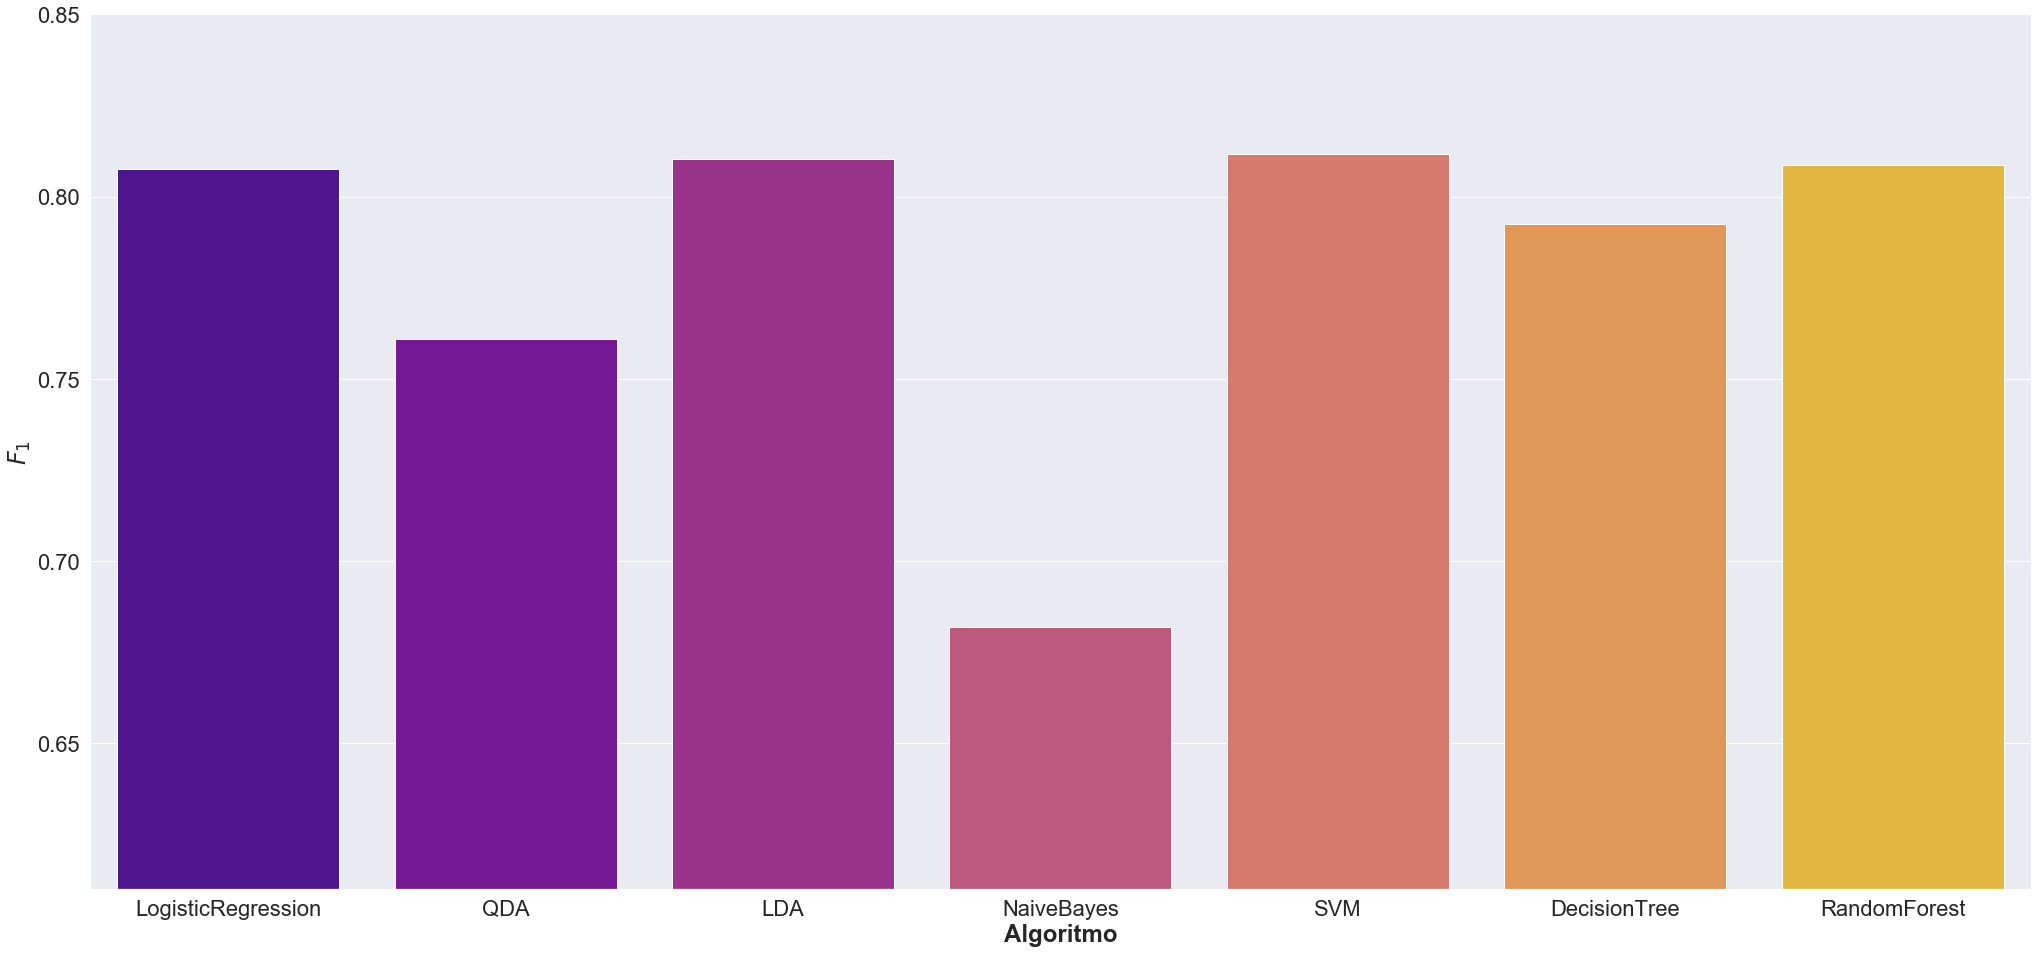

In [984]:
F=pd.DataFrame()
F['$F_1$']=TOT_F_M_1
F['Algoritmo']=ALG
a4_dims = (31, 15)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set(font_scale=2.1)  # crazy big

ax = sns.barplot(x="Algoritmo", y="$F_1$",palette='plasma',data=F)
plt.ylim(0.61,0.85)

In [977]:
for i in range(len(perf_title)):
    print('Il miglior algoritmo in termini di %s è %s con valore %.2f' %(perf_title[i],ALG[T[i].index(max(T[i]))],max(T[i])))

Il miglior algoritmo in termini di precisione classe 0 è NaiveBayes con valore 0.87
Il miglior algoritmo in termini di precisione classe 1 è RandomForest con valore 0.82
Il miglior algoritmo in termini di f_measure classe 0 è SVM con valore 0.78
Il miglior algoritmo in termini di f_measure classe 1 è SVM con valore 0.81
Il miglior algoritmo in termini di recall classe 0 è SVM con valore 0.79
Il miglior algoritmo in termini di recall classe 1 è QDA con valore 0.83
Il miglior algoritmo in termini di accuracy è SVM con valore 0.80
